In [4]:
import pandas as pd
import numpy as np

import sys
import re
import os
project_path = os.getcwd()

# 建模

## 读入数据

In [5]:
df_model =pd.read_excel(project_path +'/data/2_auc_df_model_data_forward.xlsx')
if 'Unnamed: 0' in df_model.columns:
    df_model = df_model.drop(['Unnamed: 0'], axis=1)

In [6]:
df_model.shape

(164, 8)

In [7]:
df_model.columns

Index(['日剂量', 'test_result', '大型血小板比值', '血小板分布宽度', '血红蛋白测定', '抗精神病药',
       '红细胞比积测定', '间接胆红素'],
      dtype='object')

In [8]:
# 查看共线性
df_model.corr()

,日剂量,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
日剂量,1.000000,-0.462038,0.198163,0.281110,-0.075433,-0.165737,-0.056175,-0.126263
test_result,-0.462038,1.000000,-0.113223,-0.185932,-0.178374,0.099215,-0.193047,-0.048108
大型血小板比值,0.198163,-0.113223,1.000000,0.242416,0.135869,-0.072207,0.144618,0.111321
血小板分布宽度,0.281110,-0.185932,0.242416,1.000000,0.209518,-0.222885,0.275838,0.012506
血红蛋白测定,-0.075433,-0.178374,0.135869,0.209518,1.000000,0.159145,0.973677,0.319872
抗精神病药,-0.165737,0.099215,-0.072207,-0.222885,0.159145,1.000000,0.116246,0.034080
红细胞比积测定,-0.056175,-0.193047,0.144618,0.275838,0.973677,0.116246,1.000000,0.286833
间接胆红素,-0.126263,-0.048108,0.111321,0.012506,0.319872,0.034080,0.286833,1.000000


In [9]:
df_model.corr()[df_model.corr()>0.5]

,日剂量,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
日剂量,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_result,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
大型血小板比值,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
血小板分布宽度,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
血红蛋白测定,NaN,NaN,NaN,NaN,1.000000,NaN,0.973677,NaN
抗精神病药,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
红细胞比积测定,NaN,NaN,NaN,NaN,0.973677,NaN,1.000000,NaN
间接胆红素,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [12]:
df_model.head()

,日剂量,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
0,1,97.3,NaN,NaN,NaN,1,NaN,NaN
1,1,78.2,26.1,15.7,132.0,0,0.404,7.8
2,1,37.4,23.9,15.8,138.0,0,0.420,7.5
3,0,69.2,15.0,15.5,121.0,0,0.370,3.5
4,1,85.1,44.8,17.8,156.0,0,0.490,3.5


In [13]:
df_model['日剂量'].value_counts()

1    135
0     29
Name: 日剂量, dtype: int64

In [14]:
# 提取分类数据
df_model['日剂量']=df_model['日剂量'].astype('str')
df_model=df_model[df_model['日剂量'].str.contains('0|1')]
df_model['日剂量']=df_model['日剂量'].astype('float')

In [15]:
df_model.shape

(164, 8)

In [16]:
df_model.head()

,日剂量,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
0,1.0,97.3,NaN,NaN,NaN,1,NaN,NaN
1,1.0,78.2,26.1,15.7,132.0,0,0.404,7.8
2,1.0,37.4,23.9,15.8,138.0,0,0.420,7.5
3,0.0,69.2,15.0,15.5,121.0,0,0.370,3.5
4,1.0,85.1,44.8,17.8,156.0,0,0.490,3.5


In [17]:
discrete_col=['行为干预治疗','抗精神病药','抗焦虑药','gender']
continuous_col=[x for x in df_model.columns if x not in discrete_col]
continuous_col.remove('日剂量')

## 数据归一化

In [18]:
continuous_col

['test_result', '大型血小板比值', '血小板分布宽度', '血红蛋白测定', '红细胞比积测定', '间接胆红素']

In [19]:
# 防止不同维特征数据差距过大，影响建模效果

for i in continuous_col:
    max_value = df_model[i].max()
    df_model[i]=df_model[i].apply(lambda x: round(x/max_value,3))

In [20]:
df_model.columns

Index(['日剂量', 'test_result', '大型血小板比值', '血小板分布宽度', '血红蛋白测定', '抗精神病药',
       '红细胞比积测定', '间接胆红素'],
      dtype='object')

## 插补数据

In [21]:
# 使用随机森林对缺失值进行插补
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def missing_value_interpolation(df):
    df = df.reset_index(drop=True)
    # 提取存在缺失值的列名
    missing_list = []
    for i in df.columns:
        if df[i].isnull().sum() > 0:
            missing_list.append(i)
    missing_list_copy = missing_list.copy()
    # 用该列未缺失的值训练随机森林，然后用训练好的rf预测缺失值
    for i in range(len(missing_list)):
        name=missing_list[0]
        df_missing = df[missing_list_copy]
        # 将其他列的缺失值用0表示。
        missing_list.remove(name)
        for j in missing_list:
            df_missing[j]=df_missing[j].astype('str').apply(lambda x: 0 if x=='nan' else x)
        df_missing_is = df_missing[df_missing[name].isnull()]
        df_missing_not = df_missing[df_missing[name].notnull()]
        y = df_missing_not[name]
        x = df_missing_not.drop([name],axis=1)

        rfr = RandomForestRegressor(n_estimators=300,
                                    random_state=3)
        rfr.fit(x, y)
        #预测缺失值
        predict = rfr.predict(df_missing_is.drop([name],axis=1))
        #填补缺失值
        df.loc[df[name].isnull(),name] = predict
    return df

In [22]:
# 插补建模数据
df_model_cb=missing_value_interpolation(df_model)
# df_model_cb=df_model

In [23]:
df_model_cb.shape

(164, 8)

In [27]:
df_model_cb.head()

,日剂量,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
0,1.0,0.645,0.462953,0.788983,0.58661,1,0.643543,0.237603
1,1.0,0.519,0.489000,0.882000,0.78600,0,0.816000,0.510000
2,1.0,0.248,0.448000,0.888000,0.82100,0,0.848000,0.490000
3,0.0,0.459,0.281000,0.871000,0.72000,0,0.747000,0.229000
4,1.0,0.564,0.839000,1.000000,0.92900,0,0.990000,0.229000


In [24]:
# 保存插补数据
writer = pd.ExcelWriter(project_path + '/data/df_model_data_插补.xlsx')
df_model_cb.to_excel(writer)
writer.save()

## 划分数据集

### 计算随机数种子

In [739]:
test_y.value_counts()

1.0    27
0.0     6
Name: 日剂量, dtype: int64

In [740]:
from auto_ml.utils_models import load_ml_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

# 划分训练集和测试集，比例为8:2
x = df_model_cb.drop(['日剂量'],axis=1)
y = df_model_cb['日剂量']

seeds_list=[]
cat_f1_list=[]
for i in range(101):
    
    tran_x, test_x, tran_y, test_y = train_test_split(x, y, test_size=0.2, random_state=i)
    
    # 分类数据过采样
    from imblearn.over_sampling import SMOTE,ADASYN 
    sm = SMOTE(random_state=0)
    tran_x_sm,tran_y_sm = sm.fit_resample(tran_x,tran_y)
#     tran_x_sm,tran_y_sm = tran_x,tran_y
    
    import catboost,xgboost
    # CatBoost模型
    cat_model=catboost.CatBoostClassifier(iterations=300, 
                                          learning_rate=0.2, 
                                          depth=6,
                                          l2_leaf_reg=2,
                                          subsample=1,
                                          loss_function='CrossEntropy', # 'RMSE',  #
                                          random_state=3)
    # 分类模型
    cat_model.fit(tran_x_sm,tran_y_sm)
    cat_predictions=cat_model.predict(test_x)
    cat_f1=f1_score(test_y,cat_predictions)
    # 防止分类数据的测试集划分不平衡
    if not (6 >=(test_y.value_counts().values[-2])/(test_y.value_counts().values[-1]) >=4):
        continue
#     # 回归模型
#     cat_model.fit(tran_x,tran_y)
#     cat_predictions=cat_model.predict(test_x)
#     cat_f1=r2_score(test_y,cat_predictions)
    
    seeds_list.append(i)
    cat_f1_list.append(cat_f1)

0:	learn: 0.4679225	total: 1.85ms	remaining: 554ms
1:	learn: 0.3317148	total: 3.09ms	remaining: 461ms
2:	learn: 0.2485905	total: 4.11ms	remaining: 407ms
3:	learn: 0.2072991	total: 5.2ms	remaining: 385ms
4:	learn: 0.1775573	total: 6.36ms	remaining: 375ms
5:	learn: 0.1521397	total: 7.51ms	remaining: 368ms
6:	learn: 0.1321830	total: 8.65ms	remaining: 362ms
7:	learn: 0.1220910	total: 9.82ms	remaining: 358ms
8:	learn: 0.1133203	total: 10.9ms	remaining: 351ms
9:	learn: 0.0971037	total: 11.8ms	remaining: 343ms
10:	learn: 0.0893514	total: 12.9ms	remaining: 340ms
11:	learn: 0.0720597	total: 14.4ms	remaining: 345ms
12:	learn: 0.0672793	total: 15.7ms	remaining: 347ms
13:	learn: 0.0608183	total: 17ms	remaining: 347ms
14:	learn: 0.0567927	total: 18.2ms	remaining: 345ms
15:	learn: 0.0499973	total: 19.3ms	remaining: 343ms
16:	learn: 0.0454584	total: 20.4ms	remaining: 339ms
17:	learn: 0.0444403	total: 21.3ms	remaining: 333ms
18:	learn: 0.0409955	total: 22.3ms	remaining: 331ms
19:	learn: 0.0387069	tota

164:	learn: 0.0029382	total: 156ms	remaining: 128ms
165:	learn: 0.0029382	total: 157ms	remaining: 127ms
166:	learn: 0.0029382	total: 158ms	remaining: 126ms
167:	learn: 0.0029382	total: 158ms	remaining: 125ms
168:	learn: 0.0029382	total: 159ms	remaining: 123ms
169:	learn: 0.0029382	total: 160ms	remaining: 122ms
170:	learn: 0.0029382	total: 161ms	remaining: 121ms
171:	learn: 0.0029382	total: 162ms	remaining: 120ms
172:	learn: 0.0029382	total: 163ms	remaining: 119ms
173:	learn: 0.0029382	total: 163ms	remaining: 118ms
174:	learn: 0.0029382	total: 164ms	remaining: 117ms
175:	learn: 0.0029382	total: 165ms	remaining: 116ms
176:	learn: 0.0029382	total: 166ms	remaining: 115ms
177:	learn: 0.0029382	total: 166ms	remaining: 114ms
178:	learn: 0.0029382	total: 167ms	remaining: 113ms
179:	learn: 0.0029382	total: 169ms	remaining: 112ms
180:	learn: 0.0029382	total: 169ms	remaining: 111ms
181:	learn: 0.0029382	total: 170ms	remaining: 110ms
182:	learn: 0.0029382	total: 171ms	remaining: 109ms
183:	learn: 

175:	learn: 0.0062752	total: 160ms	remaining: 113ms
176:	learn: 0.0062425	total: 161ms	remaining: 112ms
177:	learn: 0.0061317	total: 162ms	remaining: 111ms
178:	learn: 0.0060998	total: 163ms	remaining: 110ms
179:	learn: 0.0060541	total: 164ms	remaining: 109ms
180:	learn: 0.0059925	total: 165ms	remaining: 108ms
181:	learn: 0.0059657	total: 166ms	remaining: 107ms
182:	learn: 0.0058907	total: 166ms	remaining: 106ms
183:	learn: 0.0058662	total: 167ms	remaining: 106ms
184:	learn: 0.0058432	total: 168ms	remaining: 105ms
185:	learn: 0.0057366	total: 169ms	remaining: 104ms
186:	learn: 0.0056666	total: 170ms	remaining: 103ms
187:	learn: 0.0056079	total: 171ms	remaining: 102ms
188:	learn: 0.0055672	total: 172ms	remaining: 101ms
189:	learn: 0.0055474	total: 173ms	remaining: 100ms
190:	learn: 0.0054183	total: 174ms	remaining: 99.1ms
191:	learn: 0.0053607	total: 175ms	remaining: 98.2ms
192:	learn: 0.0053216	total: 176ms	remaining: 97.3ms
193:	learn: 0.0052700	total: 176ms	remaining: 96.4ms
194:	lea

192:	learn: 0.0070247	total: 172ms	remaining: 95.5ms
193:	learn: 0.0070247	total: 173ms	remaining: 94.5ms
194:	learn: 0.0070247	total: 174ms	remaining: 93.6ms
195:	learn: 0.0070247	total: 175ms	remaining: 92.6ms
196:	learn: 0.0070247	total: 175ms	remaining: 91.7ms
197:	learn: 0.0070247	total: 176ms	remaining: 90.7ms
198:	learn: 0.0070247	total: 177ms	remaining: 89.8ms
199:	learn: 0.0070247	total: 178ms	remaining: 88.8ms
200:	learn: 0.0070247	total: 179ms	remaining: 87.9ms
201:	learn: 0.0070247	total: 179ms	remaining: 87ms
202:	learn: 0.0070247	total: 180ms	remaining: 86ms
203:	learn: 0.0070247	total: 181ms	remaining: 85.1ms
204:	learn: 0.0070247	total: 182ms	remaining: 84.2ms
205:	learn: 0.0070247	total: 182ms	remaining: 83.2ms
206:	learn: 0.0070247	total: 183ms	remaining: 82.3ms
207:	learn: 0.0070247	total: 184ms	remaining: 81.5ms
208:	learn: 0.0070247	total: 185ms	remaining: 80.5ms
209:	learn: 0.0070247	total: 186ms	remaining: 79.6ms
210:	learn: 0.0070247	total: 186ms	remaining: 78.6

199:	learn: 0.0054900	total: 188ms	remaining: 93.9ms
200:	learn: 0.0054900	total: 189ms	remaining: 92.9ms
201:	learn: 0.0054900	total: 189ms	remaining: 91.9ms
202:	learn: 0.0054900	total: 190ms	remaining: 90.9ms
203:	learn: 0.0054900	total: 191ms	remaining: 89.8ms
204:	learn: 0.0054900	total: 192ms	remaining: 88.9ms
205:	learn: 0.0054900	total: 193ms	remaining: 87.9ms
206:	learn: 0.0054900	total: 193ms	remaining: 86.9ms
207:	learn: 0.0054900	total: 194ms	remaining: 85.9ms
208:	learn: 0.0054900	total: 195ms	remaining: 84.9ms
209:	learn: 0.0054900	total: 196ms	remaining: 83.9ms
210:	learn: 0.0054900	total: 197ms	remaining: 82.9ms
211:	learn: 0.0054900	total: 197ms	remaining: 81.9ms
212:	learn: 0.0054900	total: 198ms	remaining: 81ms
213:	learn: 0.0054900	total: 199ms	remaining: 80.1ms
214:	learn: 0.0054900	total: 200ms	remaining: 79.1ms
215:	learn: 0.0054900	total: 201ms	remaining: 78.1ms
216:	learn: 0.0054900	total: 202ms	remaining: 77.1ms
217:	learn: 0.0054900	total: 202ms	remaining: 76

191:	learn: 0.0064341	total: 189ms	remaining: 106ms
192:	learn: 0.0064341	total: 190ms	remaining: 105ms
193:	learn: 0.0064341	total: 191ms	remaining: 104ms
194:	learn: 0.0064341	total: 191ms	remaining: 103ms
195:	learn: 0.0064341	total: 192ms	remaining: 102ms
196:	learn: 0.0064341	total: 193ms	remaining: 101ms
197:	learn: 0.0064341	total: 194ms	remaining: 99.8ms
198:	learn: 0.0064341	total: 194ms	remaining: 98.7ms
199:	learn: 0.0064341	total: 195ms	remaining: 97.6ms
200:	learn: 0.0064341	total: 196ms	remaining: 96.5ms
201:	learn: 0.0064341	total: 197ms	remaining: 95.4ms
202:	learn: 0.0064341	total: 197ms	remaining: 94.4ms
203:	learn: 0.0064341	total: 198ms	remaining: 93.3ms
204:	learn: 0.0064341	total: 199ms	remaining: 92.2ms
205:	learn: 0.0064341	total: 200ms	remaining: 91.1ms
206:	learn: 0.0064341	total: 201ms	remaining: 90.2ms
207:	learn: 0.0064341	total: 202ms	remaining: 89.1ms
208:	learn: 0.0064341	total: 202ms	remaining: 88.1ms
209:	learn: 0.0064341	total: 203ms	remaining: 87ms
2

198:	learn: 0.0067553	total: 191ms	remaining: 97.2ms
199:	learn: 0.0067553	total: 192ms	remaining: 96.1ms
200:	learn: 0.0067553	total: 193ms	remaining: 95ms
201:	learn: 0.0067553	total: 194ms	remaining: 94ms
202:	learn: 0.0067553	total: 195ms	remaining: 93ms
203:	learn: 0.0067553	total: 195ms	remaining: 91.9ms
204:	learn: 0.0067553	total: 197ms	remaining: 91.1ms
205:	learn: 0.0067553	total: 197ms	remaining: 90.1ms
206:	learn: 0.0067553	total: 198ms	remaining: 89ms
207:	learn: 0.0067553	total: 199ms	remaining: 88ms
208:	learn: 0.0067553	total: 200ms	remaining: 87ms
209:	learn: 0.0067553	total: 200ms	remaining: 85.9ms
210:	learn: 0.0067553	total: 201ms	remaining: 84.9ms
211:	learn: 0.0067553	total: 202ms	remaining: 83.9ms
212:	learn: 0.0067553	total: 203ms	remaining: 82.8ms
213:	learn: 0.0067553	total: 204ms	remaining: 81.8ms
214:	learn: 0.0067553	total: 204ms	remaining: 80.8ms
215:	learn: 0.0067553	total: 205ms	remaining: 79.8ms
216:	learn: 0.0067553	total: 206ms	remaining: 78.8ms
217:	

213:	learn: 0.0060217	total: 193ms	remaining: 77.6ms
214:	learn: 0.0060217	total: 194ms	remaining: 76.7ms
215:	learn: 0.0060217	total: 195ms	remaining: 75.7ms
216:	learn: 0.0060217	total: 196ms	remaining: 74.8ms
217:	learn: 0.0060217	total: 196ms	remaining: 73.8ms
218:	learn: 0.0060217	total: 197ms	remaining: 72.9ms
219:	learn: 0.0060217	total: 198ms	remaining: 72ms
220:	learn: 0.0060217	total: 199ms	remaining: 71ms
221:	learn: 0.0060217	total: 199ms	remaining: 70.1ms
222:	learn: 0.0060217	total: 200ms	remaining: 69.1ms
223:	learn: 0.0060217	total: 201ms	remaining: 68.2ms
224:	learn: 0.0060217	total: 202ms	remaining: 67.3ms
225:	learn: 0.0060217	total: 203ms	remaining: 66.4ms
226:	learn: 0.0060217	total: 203ms	remaining: 65.4ms
227:	learn: 0.0060217	total: 205ms	remaining: 64.6ms
228:	learn: 0.0060217	total: 206ms	remaining: 63.7ms
229:	learn: 0.0060217	total: 206ms	remaining: 62.8ms
230:	learn: 0.0060217	total: 207ms	remaining: 61.9ms
231:	learn: 0.0060217	total: 208ms	remaining: 60.9

216:	learn: 0.0059453	total: 198ms	remaining: 75.9ms
217:	learn: 0.0058633	total: 199ms	remaining: 75ms
218:	learn: 0.0058631	total: 200ms	remaining: 74ms
219:	learn: 0.0058630	total: 201ms	remaining: 73ms
220:	learn: 0.0058629	total: 202ms	remaining: 72.1ms
221:	learn: 0.0058630	total: 202ms	remaining: 71.1ms
222:	learn: 0.0058628	total: 204ms	remaining: 70.3ms
223:	learn: 0.0058628	total: 204ms	remaining: 69.3ms
224:	learn: 0.0058629	total: 205ms	remaining: 68.4ms
225:	learn: 0.0058627	total: 206ms	remaining: 67.4ms
226:	learn: 0.0058627	total: 207ms	remaining: 66.5ms
227:	learn: 0.0058626	total: 207ms	remaining: 65.5ms
228:	learn: 0.0058624	total: 208ms	remaining: 64.5ms
229:	learn: 0.0058626	total: 209ms	remaining: 63.6ms
230:	learn: 0.0058626	total: 210ms	remaining: 62.7ms
231:	learn: 0.0058624	total: 211ms	remaining: 61.8ms
232:	learn: 0.0058623	total: 212ms	remaining: 60.8ms
233:	learn: 0.0058623	total: 212ms	remaining: 59.9ms
234:	learn: 0.0058621	total: 213ms	remaining: 58.9ms

226:	learn: 0.0038682	total: 211ms	remaining: 67.7ms
227:	learn: 0.0038678	total: 211ms	remaining: 66.8ms
228:	learn: 0.0038678	total: 212ms	remaining: 65.8ms
229:	learn: 0.0038679	total: 213ms	remaining: 64.9ms
230:	learn: 0.0038679	total: 214ms	remaining: 63.9ms
231:	learn: 0.0038677	total: 215ms	remaining: 63ms
232:	learn: 0.0038674	total: 216ms	remaining: 62ms
233:	learn: 0.0038672	total: 216ms	remaining: 61ms
234:	learn: 0.0038673	total: 217ms	remaining: 60.1ms
235:	learn: 0.0038672	total: 218ms	remaining: 59.1ms
236:	learn: 0.0038671	total: 219ms	remaining: 58.2ms
237:	learn: 0.0038671	total: 220ms	remaining: 57.2ms
238:	learn: 0.0038671	total: 220ms	remaining: 56.3ms
239:	learn: 0.0038671	total: 222ms	remaining: 55.4ms
240:	learn: 0.0038671	total: 222ms	remaining: 54.4ms
241:	learn: 0.0038671	total: 223ms	remaining: 53.5ms
242:	learn: 0.0038671	total: 224ms	remaining: 52.5ms
243:	learn: 0.0038671	total: 225ms	remaining: 51.5ms
244:	learn: 0.0038671	total: 225ms	remaining: 50.6ms

243:	learn: 0.0050489	total: 213ms	remaining: 48.8ms
244:	learn: 0.0050489	total: 214ms	remaining: 47.9ms
245:	learn: 0.0050489	total: 214ms	remaining: 47ms
246:	learn: 0.0050489	total: 215ms	remaining: 46.2ms
247:	learn: 0.0050489	total: 216ms	remaining: 45.3ms
248:	learn: 0.0050489	total: 217ms	remaining: 44.4ms
249:	learn: 0.0050489	total: 218ms	remaining: 43.6ms
250:	learn: 0.0050489	total: 219ms	remaining: 42.7ms
251:	learn: 0.0050489	total: 219ms	remaining: 41.8ms
252:	learn: 0.0050489	total: 220ms	remaining: 40.9ms
253:	learn: 0.0050489	total: 221ms	remaining: 40ms
254:	learn: 0.0050489	total: 222ms	remaining: 39.1ms
255:	learn: 0.0050489	total: 223ms	remaining: 38.3ms
256:	learn: 0.0050489	total: 223ms	remaining: 37.4ms
257:	learn: 0.0050489	total: 224ms	remaining: 36.5ms
258:	learn: 0.0050489	total: 225ms	remaining: 35.6ms
259:	learn: 0.0050489	total: 226ms	remaining: 34.7ms
260:	learn: 0.0050489	total: 227ms	remaining: 33.9ms
261:	learn: 0.0050489	total: 227ms	remaining: 33ms

299:	learn: 0.0089587	total: 207ms	remaining: 0us
0:	learn: 0.4868832	total: 1.03ms	remaining: 310ms
1:	learn: 0.3696709	total: 1.91ms	remaining: 285ms
2:	learn: 0.2872465	total: 2.77ms	remaining: 274ms
3:	learn: 0.2507284	total: 3.65ms	remaining: 270ms
4:	learn: 0.2211647	total: 4.51ms	remaining: 266ms
5:	learn: 0.1971371	total: 5.55ms	remaining: 272ms
6:	learn: 0.1798258	total: 6.44ms	remaining: 270ms
7:	learn: 0.1618096	total: 7.36ms	remaining: 269ms
8:	learn: 0.1371430	total: 8.36ms	remaining: 270ms
9:	learn: 0.1332343	total: 9.23ms	remaining: 268ms
10:	learn: 0.1099547	total: 10.2ms	remaining: 267ms
11:	learn: 0.1074509	total: 11.1ms	remaining: 266ms
12:	learn: 0.1028725	total: 11.9ms	remaining: 263ms
13:	learn: 0.0953418	total: 12.8ms	remaining: 262ms
14:	learn: 0.0927288	total: 13.3ms	remaining: 254ms
15:	learn: 0.0892884	total: 14.2ms	remaining: 253ms
16:	learn: 0.0805381	total: 15.1ms	remaining: 251ms
17:	learn: 0.0737329	total: 16ms	remaining: 250ms
18:	learn: 0.0705085	total

1:	learn: 0.4183165	total: 2.14ms	remaining: 319ms
2:	learn: 0.3411910	total: 3.43ms	remaining: 339ms
3:	learn: 0.3026179	total: 4.35ms	remaining: 322ms
4:	learn: 0.2807163	total: 5.23ms	remaining: 308ms
5:	learn: 0.2455906	total: 6.09ms	remaining: 298ms
6:	learn: 0.2249445	total: 6.95ms	remaining: 291ms
7:	learn: 0.2013921	total: 7.82ms	remaining: 285ms
8:	learn: 0.1879226	total: 8.82ms	remaining: 285ms
9:	learn: 0.1806622	total: 9.7ms	remaining: 281ms
10:	learn: 0.1727847	total: 10.6ms	remaining: 278ms
11:	learn: 0.1624199	total: 11.5ms	remaining: 276ms
12:	learn: 0.1544365	total: 12.4ms	remaining: 273ms
13:	learn: 0.1457182	total: 13.3ms	remaining: 271ms
14:	learn: 0.1373664	total: 14.2ms	remaining: 270ms
15:	learn: 0.1294230	total: 15.2ms	remaining: 270ms
16:	learn: 0.1260257	total: 16.1ms	remaining: 269ms
17:	learn: 0.1244451	total: 16.6ms	remaining: 260ms
18:	learn: 0.1185833	total: 17.5ms	remaining: 258ms
19:	learn: 0.1151159	total: 18.4ms	remaining: 257ms
20:	learn: 0.1117223	t

178:	learn: 0.0092493	total: 158ms	remaining: 107ms
179:	learn: 0.0091778	total: 159ms	remaining: 106ms
180:	learn: 0.0091060	total: 160ms	remaining: 105ms
181:	learn: 0.0090410	total: 161ms	remaining: 104ms
182:	learn: 0.0090409	total: 162ms	remaining: 104ms
183:	learn: 0.0090373	total: 163ms	remaining: 103ms
184:	learn: 0.0089948	total: 164ms	remaining: 102ms
185:	learn: 0.0089943	total: 165ms	remaining: 101ms
186:	learn: 0.0089943	total: 165ms	remaining: 99.9ms
187:	learn: 0.0089943	total: 166ms	remaining: 99ms
188:	learn: 0.0089943	total: 167ms	remaining: 98ms
189:	learn: 0.0089943	total: 168ms	remaining: 97.1ms
190:	learn: 0.0089943	total: 169ms	remaining: 96.2ms
191:	learn: 0.0089943	total: 169ms	remaining: 95.2ms
192:	learn: 0.0089943	total: 170ms	remaining: 94.2ms
193:	learn: 0.0089943	total: 171ms	remaining: 93.3ms
194:	learn: 0.0089943	total: 172ms	remaining: 92.5ms
195:	learn: 0.0089943	total: 173ms	remaining: 91.6ms
196:	learn: 0.0089943	total: 174ms	remaining: 90.7ms
197:	

190:	learn: 0.0034494	total: 167ms	remaining: 95.2ms
191:	learn: 0.0034494	total: 167ms	remaining: 94.2ms
192:	learn: 0.0034494	total: 168ms	remaining: 93.2ms
193:	learn: 0.0034494	total: 168ms	remaining: 92.1ms
194:	learn: 0.0034494	total: 169ms	remaining: 91ms
195:	learn: 0.0034494	total: 169ms	remaining: 89.9ms
196:	learn: 0.0034494	total: 170ms	remaining: 88.8ms
197:	learn: 0.0034494	total: 171ms	remaining: 88.2ms
198:	learn: 0.0034494	total: 172ms	remaining: 87.2ms
199:	learn: 0.0034494	total: 172ms	remaining: 86.1ms
200:	learn: 0.0034494	total: 173ms	remaining: 85ms
201:	learn: 0.0034494	total: 173ms	remaining: 84ms
202:	learn: 0.0034494	total: 174ms	remaining: 82.9ms
203:	learn: 0.0034494	total: 174ms	remaining: 81.9ms
204:	learn: 0.0034494	total: 174ms	remaining: 80.8ms
205:	learn: 0.0034494	total: 175ms	remaining: 79.8ms
206:	learn: 0.0034494	total: 176ms	remaining: 78.9ms
207:	learn: 0.0034494	total: 176ms	remaining: 77.9ms
208:	learn: 0.0034494	total: 177ms	remaining: 77ms
2

65:	learn: 0.0270212	total: 58.3ms	remaining: 207ms
66:	learn: 0.0259882	total: 59.2ms	remaining: 206ms
67:	learn: 0.0253324	total: 60ms	remaining: 205ms
68:	learn: 0.0247634	total: 60.9ms	remaining: 204ms
69:	learn: 0.0242596	total: 61.8ms	remaining: 203ms
70:	learn: 0.0240989	total: 62.3ms	remaining: 201ms
71:	learn: 0.0237954	total: 63.3ms	remaining: 200ms
72:	learn: 0.0235841	total: 64.8ms	remaining: 201ms
73:	learn: 0.0230601	total: 65.7ms	remaining: 201ms
74:	learn: 0.0223820	total: 66.6ms	remaining: 200ms
75:	learn: 0.0222335	total: 67ms	remaining: 198ms
76:	learn: 0.0209844	total: 67.9ms	remaining: 197ms
77:	learn: 0.0197136	total: 68.8ms	remaining: 196ms
78:	learn: 0.0194250	total: 69.8ms	remaining: 195ms
79:	learn: 0.0193908	total: 70.6ms	remaining: 194ms
80:	learn: 0.0193577	total: 71.5ms	remaining: 193ms
81:	learn: 0.0189598	total: 72.4ms	remaining: 192ms
82:	learn: 0.0183396	total: 73.3ms	remaining: 192ms
83:	learn: 0.0172501	total: 74.2ms	remaining: 191ms
84:	learn: 0.017

235:	learn: 0.0035945	total: 211ms	remaining: 57.3ms
236:	learn: 0.0035808	total: 212ms	remaining: 56.4ms
237:	learn: 0.0035701	total: 213ms	remaining: 55.5ms
238:	learn: 0.0035565	total: 214ms	remaining: 54.7ms
239:	learn: 0.0035436	total: 215ms	remaining: 53.8ms
240:	learn: 0.0034907	total: 216ms	remaining: 52.9ms
241:	learn: 0.0034525	total: 217ms	remaining: 52.1ms
242:	learn: 0.0034382	total: 218ms	remaining: 51.2ms
243:	learn: 0.0034250	total: 219ms	remaining: 50.3ms
244:	learn: 0.0034249	total: 220ms	remaining: 49.4ms
245:	learn: 0.0034196	total: 221ms	remaining: 48.5ms
246:	learn: 0.0033793	total: 222ms	remaining: 47.6ms
247:	learn: 0.0033639	total: 223ms	remaining: 46.7ms
248:	learn: 0.0033560	total: 224ms	remaining: 45.8ms
249:	learn: 0.0033420	total: 224ms	remaining: 44.9ms
250:	learn: 0.0033350	total: 225ms	remaining: 44ms
251:	learn: 0.0033185	total: 226ms	remaining: 43.1ms
252:	learn: 0.0032982	total: 227ms	remaining: 42.2ms
253:	learn: 0.0032878	total: 228ms	remaining: 41

230:	learn: 0.0096424	total: 217ms	remaining: 64.7ms
231:	learn: 0.0096424	total: 217ms	remaining: 63.7ms
232:	learn: 0.0096424	total: 218ms	remaining: 62.7ms
233:	learn: 0.0096424	total: 219ms	remaining: 61.7ms
234:	learn: 0.0096424	total: 220ms	remaining: 60.7ms
235:	learn: 0.0096424	total: 220ms	remaining: 59.7ms
236:	learn: 0.0096424	total: 221ms	remaining: 58.8ms
237:	learn: 0.0096424	total: 222ms	remaining: 57.8ms
238:	learn: 0.0096424	total: 223ms	remaining: 56.8ms
239:	learn: 0.0096424	total: 223ms	remaining: 55.8ms
240:	learn: 0.0096424	total: 224ms	remaining: 54.9ms
241:	learn: 0.0096424	total: 225ms	remaining: 53.9ms
242:	learn: 0.0096424	total: 226ms	remaining: 53ms
243:	learn: 0.0096424	total: 227ms	remaining: 52.1ms
244:	learn: 0.0096424	total: 228ms	remaining: 51.2ms
245:	learn: 0.0096424	total: 229ms	remaining: 50.2ms
246:	learn: 0.0096424	total: 230ms	remaining: 49.3ms
247:	learn: 0.0096424	total: 230ms	remaining: 48.3ms
248:	learn: 0.0096424	total: 231ms	remaining: 47

187:	learn: 0.0020794	total: 193ms	remaining: 115ms
188:	learn: 0.0020580	total: 195ms	remaining: 114ms
189:	learn: 0.0020396	total: 196ms	remaining: 113ms
190:	learn: 0.0020194	total: 197ms	remaining: 112ms
191:	learn: 0.0020018	total: 198ms	remaining: 111ms
192:	learn: 0.0019850	total: 198ms	remaining: 110ms
193:	learn: 0.0019666	total: 199ms	remaining: 109ms
194:	learn: 0.0019505	total: 200ms	remaining: 108ms
195:	learn: 0.0019352	total: 201ms	remaining: 107ms
196:	learn: 0.0019095	total: 202ms	remaining: 106ms
197:	learn: 0.0018946	total: 203ms	remaining: 105ms
198:	learn: 0.0018806	total: 204ms	remaining: 104ms
199:	learn: 0.0018675	total: 205ms	remaining: 103ms
200:	learn: 0.0018492	total: 206ms	remaining: 101ms
201:	learn: 0.0018404	total: 207ms	remaining: 100ms
202:	learn: 0.0018180	total: 208ms	remaining: 99.4ms
203:	learn: 0.0018110	total: 209ms	remaining: 98.4ms
204:	learn: 0.0018008	total: 210ms	remaining: 97.4ms
205:	learn: 0.0017891	total: 211ms	remaining: 96.4ms
206:	lea

204:	learn: 0.0053649	total: 187ms	remaining: 86.4ms
205:	learn: 0.0053358	total: 187ms	remaining: 85.5ms
206:	learn: 0.0053017	total: 188ms	remaining: 84.6ms
207:	learn: 0.0052807	total: 189ms	remaining: 83.7ms
208:	learn: 0.0052610	total: 190ms	remaining: 82.9ms
209:	learn: 0.0052339	total: 191ms	remaining: 82ms
210:	learn: 0.0052118	total: 192ms	remaining: 81ms
211:	learn: 0.0051846	total: 193ms	remaining: 80.1ms
212:	learn: 0.0051384	total: 194ms	remaining: 79.2ms
213:	learn: 0.0051178	total: 195ms	remaining: 78.3ms
214:	learn: 0.0051018	total: 196ms	remaining: 77.4ms
215:	learn: 0.0050506	total: 197ms	remaining: 76.5ms
216:	learn: 0.0050312	total: 198ms	remaining: 75.6ms
217:	learn: 0.0050098	total: 198ms	remaining: 74.6ms
218:	learn: 0.0049734	total: 199ms	remaining: 73.7ms
219:	learn: 0.0049391	total: 200ms	remaining: 72.8ms
220:	learn: 0.0049217	total: 201ms	remaining: 71.9ms
221:	learn: 0.0049051	total: 202ms	remaining: 71ms
222:	learn: 0.0048517	total: 203ms	remaining: 70ms
2

219:	learn: 0.0030629	total: 193ms	remaining: 70.3ms
220:	learn: 0.0030629	total: 194ms	remaining: 69.4ms
221:	learn: 0.0030629	total: 195ms	remaining: 68.4ms
222:	learn: 0.0030629	total: 196ms	remaining: 67.6ms
223:	learn: 0.0030629	total: 197ms	remaining: 66.7ms
224:	learn: 0.0030629	total: 197ms	remaining: 65.8ms
225:	learn: 0.0030629	total: 198ms	remaining: 64.8ms
226:	learn: 0.0030629	total: 199ms	remaining: 63.9ms
227:	learn: 0.0030629	total: 199ms	remaining: 63ms
228:	learn: 0.0030629	total: 201ms	remaining: 62.2ms
229:	learn: 0.0030629	total: 201ms	remaining: 61.3ms
230:	learn: 0.0030629	total: 202ms	remaining: 60.4ms
231:	learn: 0.0030629	total: 203ms	remaining: 59.5ms
232:	learn: 0.0030629	total: 204ms	remaining: 58.6ms
233:	learn: 0.0030629	total: 204ms	remaining: 57.7ms
234:	learn: 0.0030629	total: 205ms	remaining: 56.8ms
235:	learn: 0.0030629	total: 206ms	remaining: 55.9ms
236:	learn: 0.0030629	total: 207ms	remaining: 54.9ms
237:	learn: 0.0030629	total: 207ms	remaining: 54

216:	learn: 0.0062872	total: 205ms	remaining: 78.3ms
217:	learn: 0.0062872	total: 206ms	remaining: 77.4ms
218:	learn: 0.0062872	total: 207ms	remaining: 76.5ms
219:	learn: 0.0062872	total: 208ms	remaining: 75.6ms
220:	learn: 0.0062872	total: 209ms	remaining: 74.7ms
221:	learn: 0.0062872	total: 210ms	remaining: 73.8ms
222:	learn: 0.0062872	total: 211ms	remaining: 72.8ms
223:	learn: 0.0062872	total: 212ms	remaining: 71.8ms
224:	learn: 0.0062872	total: 213ms	remaining: 71.1ms
225:	learn: 0.0062872	total: 214ms	remaining: 70.1ms
226:	learn: 0.0062872	total: 215ms	remaining: 69.3ms
227:	learn: 0.0062872	total: 217ms	remaining: 68.4ms
228:	learn: 0.0062872	total: 218ms	remaining: 67.5ms
229:	learn: 0.0062872	total: 219ms	remaining: 66.6ms
230:	learn: 0.0062872	total: 220ms	remaining: 65.6ms
231:	learn: 0.0062872	total: 221ms	remaining: 64.7ms
232:	learn: 0.0062872	total: 222ms	remaining: 63.7ms
233:	learn: 0.0062872	total: 222ms	remaining: 62.8ms
234:	learn: 0.0062872	total: 223ms	remaining: 

226:	learn: 0.0057355	total: 199ms	remaining: 64ms
227:	learn: 0.0057355	total: 200ms	remaining: 63.1ms
228:	learn: 0.0057355	total: 201ms	remaining: 62.2ms
229:	learn: 0.0057355	total: 201ms	remaining: 61.3ms
230:	learn: 0.0057355	total: 203ms	remaining: 60.5ms
231:	learn: 0.0057355	total: 203ms	remaining: 59.6ms
232:	learn: 0.0057355	total: 204ms	remaining: 58.7ms
233:	learn: 0.0057355	total: 205ms	remaining: 57.8ms
234:	learn: 0.0057355	total: 206ms	remaining: 56.9ms
235:	learn: 0.0057355	total: 206ms	remaining: 55.9ms
236:	learn: 0.0057355	total: 207ms	remaining: 55ms
237:	learn: 0.0057355	total: 208ms	remaining: 54.1ms
238:	learn: 0.0057355	total: 208ms	remaining: 53.2ms
239:	learn: 0.0057355	total: 209ms	remaining: 52.3ms
240:	learn: 0.0057355	total: 210ms	remaining: 51.4ms
241:	learn: 0.0057355	total: 211ms	remaining: 50.5ms
242:	learn: 0.0057355	total: 211ms	remaining: 49.6ms
243:	learn: 0.0057355	total: 212ms	remaining: 48.7ms
244:	learn: 0.0057355	total: 213ms	remaining: 47.8

242:	learn: 0.0047428	total: 214ms	remaining: 50.1ms
243:	learn: 0.0047428	total: 215ms	remaining: 49.3ms
244:	learn: 0.0047428	total: 215ms	remaining: 48.4ms
245:	learn: 0.0047428	total: 216ms	remaining: 47.5ms
246:	learn: 0.0047428	total: 217ms	remaining: 46.6ms
247:	learn: 0.0047428	total: 218ms	remaining: 45.7ms
248:	learn: 0.0047428	total: 219ms	remaining: 44.8ms
249:	learn: 0.0047428	total: 219ms	remaining: 43.9ms
250:	learn: 0.0047428	total: 220ms	remaining: 43ms
251:	learn: 0.0047428	total: 221ms	remaining: 42.1ms
252:	learn: 0.0047428	total: 222ms	remaining: 41.2ms
253:	learn: 0.0047428	total: 223ms	remaining: 40.3ms
254:	learn: 0.0047428	total: 224ms	remaining: 39.5ms
255:	learn: 0.0047428	total: 224ms	remaining: 38.6ms
256:	learn: 0.0047428	total: 225ms	remaining: 37.7ms
257:	learn: 0.0047428	total: 226ms	remaining: 36.8ms
258:	learn: 0.0047428	total: 227ms	remaining: 35.9ms
259:	learn: 0.0047428	total: 227ms	remaining: 35ms
260:	learn: 0.0047428	total: 228ms	remaining: 34.1

263:	learn: 0.0041457	total: 230ms	remaining: 31.4ms
264:	learn: 0.0041457	total: 231ms	remaining: 30.5ms
265:	learn: 0.0041457	total: 232ms	remaining: 29.6ms
266:	learn: 0.0041457	total: 233ms	remaining: 28.8ms
267:	learn: 0.0041457	total: 234ms	remaining: 27.9ms
268:	learn: 0.0041457	total: 235ms	remaining: 27.1ms
269:	learn: 0.0041457	total: 236ms	remaining: 26.2ms
270:	learn: 0.0041457	total: 236ms	remaining: 25.3ms
271:	learn: 0.0041457	total: 237ms	remaining: 24.4ms
272:	learn: 0.0041457	total: 238ms	remaining: 23.5ms
273:	learn: 0.0041457	total: 239ms	remaining: 22.7ms
274:	learn: 0.0041457	total: 240ms	remaining: 21.8ms
275:	learn: 0.0041457	total: 241ms	remaining: 20.9ms
276:	learn: 0.0041457	total: 242ms	remaining: 20.1ms
277:	learn: 0.0041457	total: 242ms	remaining: 19.2ms
278:	learn: 0.0041457	total: 243ms	remaining: 18.3ms
279:	learn: 0.0041457	total: 244ms	remaining: 17.4ms
280:	learn: 0.0041457	total: 245ms	remaining: 16.6ms
281:	learn: 0.0041457	total: 246ms	remaining: 

272:	learn: 0.0059659	total: 242ms	remaining: 23.9ms
273:	learn: 0.0059657	total: 243ms	remaining: 23ms
274:	learn: 0.0059656	total: 244ms	remaining: 22.1ms
275:	learn: 0.0059655	total: 244ms	remaining: 21.3ms
276:	learn: 0.0059655	total: 245ms	remaining: 20.4ms
277:	learn: 0.0059656	total: 246ms	remaining: 19.5ms
278:	learn: 0.0059655	total: 247ms	remaining: 18.6ms
279:	learn: 0.0059654	total: 248ms	remaining: 17.7ms
280:	learn: 0.0059655	total: 248ms	remaining: 16.8ms
281:	learn: 0.0059653	total: 249ms	remaining: 15.9ms
282:	learn: 0.0059650	total: 250ms	remaining: 15ms
283:	learn: 0.0059649	total: 251ms	remaining: 14.1ms
284:	learn: 0.0059647	total: 252ms	remaining: 13.3ms
285:	learn: 0.0059648	total: 253ms	remaining: 12.4ms
286:	learn: 0.0059646	total: 254ms	remaining: 11.5ms
287:	learn: 0.0059646	total: 255ms	remaining: 10.6ms
288:	learn: 0.0059645	total: 255ms	remaining: 9.72ms
289:	learn: 0.0059645	total: 256ms	remaining: 8.83ms
290:	learn: 0.0059625	total: 257ms	remaining: 7.95

294:	learn: 0.0040313	total: 250ms	remaining: 4.24ms
295:	learn: 0.0040313	total: 251ms	remaining: 3.39ms
296:	learn: 0.0040313	total: 252ms	remaining: 2.54ms
297:	learn: 0.0040313	total: 253ms	remaining: 1.7ms
298:	learn: 0.0040313	total: 254ms	remaining: 848us
299:	learn: 0.0040313	total: 255ms	remaining: 0us
0:	learn: 0.5400199	total: 1.1ms	remaining: 329ms
1:	learn: 0.4279346	total: 1.84ms	remaining: 274ms
2:	learn: 0.3621052	total: 2.94ms	remaining: 291ms
3:	learn: 0.3048168	total: 3.99ms	remaining: 295ms
4:	learn: 0.2545978	total: 5.05ms	remaining: 298ms
5:	learn: 0.2177622	total: 6.08ms	remaining: 298ms
6:	learn: 0.1985248	total: 7.07ms	remaining: 296ms
7:	learn: 0.1923249	total: 8.19ms	remaining: 299ms
8:	learn: 0.1737973	total: 9.28ms	remaining: 300ms
9:	learn: 0.1664199	total: 10.2ms	remaining: 297ms
10:	learn: 0.1622180	total: 11.3ms	remaining: 296ms
11:	learn: 0.1580334	total: 12.3ms	remaining: 295ms
12:	learn: 0.1506525	total: 13.3ms	remaining: 293ms
13:	learn: 0.1457964	t

0:	learn: 0.4947851	total: 1.07ms	remaining: 322ms
1:	learn: 0.3384485	total: 1.99ms	remaining: 296ms
2:	learn: 0.2707946	total: 2.85ms	remaining: 282ms
3:	learn: 0.2250152	total: 3.74ms	remaining: 277ms
4:	learn: 0.1898961	total: 4.65ms	remaining: 274ms
5:	learn: 0.1642688	total: 5.55ms	remaining: 272ms
6:	learn: 0.1408465	total: 6.57ms	remaining: 275ms
7:	learn: 0.1276909	total: 7.46ms	remaining: 272ms
8:	learn: 0.1165537	total: 8.35ms	remaining: 270ms
9:	learn: 0.1081592	total: 9.22ms	remaining: 267ms
10:	learn: 0.1033171	total: 10.5ms	remaining: 277ms
11:	learn: 0.0928031	total: 11.5ms	remaining: 276ms
12:	learn: 0.0890927	total: 12.6ms	remaining: 279ms
13:	learn: 0.0798788	total: 13.6ms	remaining: 278ms
14:	learn: 0.0786977	total: 14.6ms	remaining: 277ms
15:	learn: 0.0764166	total: 15.5ms	remaining: 275ms
16:	learn: 0.0716154	total: 16.4ms	remaining: 273ms
17:	learn: 0.0710924	total: 16.9ms	remaining: 264ms
18:	learn: 0.0667647	total: 17.8ms	remaining: 263ms
19:	learn: 0.0632746	t

173:	learn: 0.0051769	total: 154ms	remaining: 111ms
174:	learn: 0.0051769	total: 155ms	remaining: 111ms
175:	learn: 0.0051769	total: 156ms	remaining: 110ms
176:	learn: 0.0051769	total: 156ms	remaining: 109ms
177:	learn: 0.0051769	total: 157ms	remaining: 108ms
178:	learn: 0.0051769	total: 158ms	remaining: 107ms
179:	learn: 0.0051769	total: 159ms	remaining: 106ms
180:	learn: 0.0051769	total: 159ms	remaining: 105ms
181:	learn: 0.0051769	total: 160ms	remaining: 104ms
182:	learn: 0.0051769	total: 161ms	remaining: 103ms
183:	learn: 0.0051769	total: 162ms	remaining: 102ms
184:	learn: 0.0051769	total: 163ms	remaining: 101ms
185:	learn: 0.0051769	total: 164ms	remaining: 100ms
186:	learn: 0.0051769	total: 164ms	remaining: 99.3ms
187:	learn: 0.0051769	total: 165ms	remaining: 98.3ms
188:	learn: 0.0051769	total: 166ms	remaining: 97.4ms
189:	learn: 0.0051769	total: 167ms	remaining: 96.7ms
190:	learn: 0.0051769	total: 168ms	remaining: 95.8ms
191:	learn: 0.0051769	total: 169ms	remaining: 94.8ms
192:	l

191:	learn: 0.0124896	total: 174ms	remaining: 98ms
192:	learn: 0.0122794	total: 175ms	remaining: 97.1ms
193:	learn: 0.0121393	total: 176ms	remaining: 96.2ms
194:	learn: 0.0120647	total: 177ms	remaining: 95.4ms
195:	learn: 0.0120267	total: 178ms	remaining: 94.5ms
196:	learn: 0.0119353	total: 179ms	remaining: 93.6ms
197:	learn: 0.0118986	total: 180ms	remaining: 92.6ms
198:	learn: 0.0118032	total: 181ms	remaining: 91.7ms
199:	learn: 0.0117229	total: 182ms	remaining: 90.8ms
200:	learn: 0.0115984	total: 182ms	remaining: 89.9ms
201:	learn: 0.0113312	total: 183ms	remaining: 88.9ms
202:	learn: 0.0112601	total: 184ms	remaining: 88ms
203:	learn: 0.0112243	total: 185ms	remaining: 87.1ms
204:	learn: 0.0111620	total: 186ms	remaining: 86.2ms
205:	learn: 0.0111298	total: 187ms	remaining: 85.2ms
206:	learn: 0.0111202	total: 188ms	remaining: 84.3ms
207:	learn: 0.0110791	total: 189ms	remaining: 83.5ms
208:	learn: 0.0110198	total: 190ms	remaining: 82.6ms
209:	learn: 0.0109689	total: 191ms	remaining: 82ms

197:	learn: 0.0071538	total: 180ms	remaining: 92.7ms
198:	learn: 0.0071079	total: 181ms	remaining: 91.7ms
199:	learn: 0.0070202	total: 182ms	remaining: 90.8ms
200:	learn: 0.0069631	total: 182ms	remaining: 89.9ms
201:	learn: 0.0069147	total: 183ms	remaining: 89ms
202:	learn: 0.0068761	total: 184ms	remaining: 88ms
203:	learn: 0.0068306	total: 185ms	remaining: 87.1ms
204:	learn: 0.0067936	total: 186ms	remaining: 86.3ms
205:	learn: 0.0067668	total: 187ms	remaining: 85.3ms
206:	learn: 0.0067425	total: 188ms	remaining: 84.5ms
207:	learn: 0.0066940	total: 189ms	remaining: 83.6ms
208:	learn: 0.0065661	total: 190ms	remaining: 82.7ms
209:	learn: 0.0065219	total: 191ms	remaining: 81.8ms
210:	learn: 0.0065003	total: 192ms	remaining: 80.8ms
211:	learn: 0.0064617	total: 193ms	remaining: 79.9ms
212:	learn: 0.0063860	total: 193ms	remaining: 79ms
213:	learn: 0.0062735	total: 194ms	remaining: 78.1ms
214:	learn: 0.0062377	total: 195ms	remaining: 77.1ms
215:	learn: 0.0062188	total: 196ms	remaining: 76.2ms

204:	learn: 0.0074309	total: 189ms	remaining: 87.6ms
205:	learn: 0.0074309	total: 190ms	remaining: 86.8ms
206:	learn: 0.0074309	total: 191ms	remaining: 85.8ms
207:	learn: 0.0074309	total: 192ms	remaining: 84.8ms
208:	learn: 0.0074309	total: 193ms	remaining: 83.8ms
209:	learn: 0.0074309	total: 193ms	remaining: 82.8ms
210:	learn: 0.0074309	total: 194ms	remaining: 81.9ms
211:	learn: 0.0074309	total: 195ms	remaining: 80.9ms
212:	learn: 0.0074309	total: 196ms	remaining: 79.9ms
213:	learn: 0.0074309	total: 196ms	remaining: 78.9ms
214:	learn: 0.0074309	total: 197ms	remaining: 78ms
215:	learn: 0.0074309	total: 198ms	remaining: 77ms
216:	learn: 0.0074309	total: 199ms	remaining: 76ms
217:	learn: 0.0074309	total: 200ms	remaining: 75ms
218:	learn: 0.0074309	total: 200ms	remaining: 74.1ms
219:	learn: 0.0074309	total: 201ms	remaining: 73.1ms
220:	learn: 0.0074309	total: 202ms	remaining: 72.2ms
221:	learn: 0.0074309	total: 203ms	remaining: 71.2ms
222:	learn: 0.0074309	total: 203ms	remaining: 70.2ms
2

212:	learn: 0.0079914	total: 199ms	remaining: 81.4ms
213:	learn: 0.0079914	total: 200ms	remaining: 80.4ms
214:	learn: 0.0079914	total: 201ms	remaining: 79.4ms
215:	learn: 0.0079914	total: 202ms	remaining: 78.4ms
216:	learn: 0.0079914	total: 203ms	remaining: 77.5ms
217:	learn: 0.0079914	total: 203ms	remaining: 76.5ms
218:	learn: 0.0079914	total: 204ms	remaining: 75.5ms
219:	learn: 0.0079914	total: 205ms	remaining: 74.5ms
220:	learn: 0.0079914	total: 206ms	remaining: 73.5ms
221:	learn: 0.0079914	total: 207ms	remaining: 72.6ms
222:	learn: 0.0079914	total: 207ms	remaining: 71.6ms
223:	learn: 0.0079914	total: 208ms	remaining: 70.6ms
224:	learn: 0.0079914	total: 209ms	remaining: 69.6ms
225:	learn: 0.0079914	total: 210ms	remaining: 68.6ms
226:	learn: 0.0079914	total: 210ms	remaining: 67.6ms
227:	learn: 0.0079914	total: 211ms	remaining: 66.7ms
228:	learn: 0.0079914	total: 212ms	remaining: 65.8ms
229:	learn: 0.0079914	total: 213ms	remaining: 64.8ms
230:	learn: 0.0079914	total: 214ms	remaining: 

219:	learn: 0.0039192	total: 207ms	remaining: 75.1ms
220:	learn: 0.0039192	total: 208ms	remaining: 74.2ms
221:	learn: 0.0039192	total: 208ms	remaining: 73.2ms
222:	learn: 0.0039192	total: 209ms	remaining: 72.3ms
223:	learn: 0.0039192	total: 210ms	remaining: 71.3ms
224:	learn: 0.0039192	total: 211ms	remaining: 70.3ms
225:	learn: 0.0039192	total: 212ms	remaining: 69.3ms
226:	learn: 0.0039192	total: 213ms	remaining: 68.3ms
227:	learn: 0.0039192	total: 213ms	remaining: 67.3ms
228:	learn: 0.0039192	total: 214ms	remaining: 66.4ms
229:	learn: 0.0039192	total: 215ms	remaining: 65.4ms
230:	learn: 0.0039192	total: 216ms	remaining: 64.4ms
231:	learn: 0.0039192	total: 216ms	remaining: 63.4ms
232:	learn: 0.0039192	total: 217ms	remaining: 62.4ms
233:	learn: 0.0039192	total: 218ms	remaining: 61.4ms
234:	learn: 0.0039192	total: 219ms	remaining: 60.5ms
235:	learn: 0.0039192	total: 220ms	remaining: 59.5ms
236:	learn: 0.0039192	total: 221ms	remaining: 58.7ms
237:	learn: 0.0039192	total: 222ms	remaining: 

198:	learn: 0.0040590	total: 211ms	remaining: 107ms
199:	learn: 0.0040442	total: 212ms	remaining: 106ms
200:	learn: 0.0040087	total: 213ms	remaining: 105ms
201:	learn: 0.0040022	total: 214ms	remaining: 104ms
202:	learn: 0.0039683	total: 215ms	remaining: 103ms
203:	learn: 0.0039331	total: 215ms	remaining: 101ms
204:	learn: 0.0038502	total: 216ms	remaining: 100ms
205:	learn: 0.0038187	total: 217ms	remaining: 99.1ms
206:	learn: 0.0038131	total: 218ms	remaining: 98ms
207:	learn: 0.0037578	total: 220ms	remaining: 97.2ms
208:	learn: 0.0037347	total: 221ms	remaining: 96.1ms
209:	learn: 0.0037189	total: 222ms	remaining: 95ms
210:	learn: 0.0036650	total: 222ms	remaining: 93.8ms
211:	learn: 0.0036323	total: 223ms	remaining: 92.7ms
212:	learn: 0.0036019	total: 224ms	remaining: 91.6ms
213:	learn: 0.0035910	total: 225ms	remaining: 90.4ms
214:	learn: 0.0035709	total: 226ms	remaining: 89.3ms
215:	learn: 0.0035497	total: 227ms	remaining: 88.2ms
216:	learn: 0.0035306	total: 228ms	remaining: 87.1ms
217:

206:	learn: 0.0078870	total: 192ms	remaining: 86.3ms
207:	learn: 0.0078870	total: 193ms	remaining: 85.3ms
208:	learn: 0.0078870	total: 194ms	remaining: 84.3ms
209:	learn: 0.0078870	total: 194ms	remaining: 83.3ms
210:	learn: 0.0078870	total: 195ms	remaining: 82.3ms
211:	learn: 0.0078870	total: 196ms	remaining: 81.4ms
212:	learn: 0.0078870	total: 197ms	remaining: 80.4ms
213:	learn: 0.0078870	total: 197ms	remaining: 79.4ms
214:	learn: 0.0078870	total: 198ms	remaining: 78.4ms
215:	learn: 0.0078870	total: 199ms	remaining: 77.4ms
216:	learn: 0.0078870	total: 200ms	remaining: 76.4ms
217:	learn: 0.0078870	total: 201ms	remaining: 75.4ms
218:	learn: 0.0078870	total: 201ms	remaining: 74.4ms
219:	learn: 0.0078870	total: 202ms	remaining: 73.5ms
220:	learn: 0.0078870	total: 203ms	remaining: 72.6ms
221:	learn: 0.0078870	total: 204ms	remaining: 71.6ms
222:	learn: 0.0078870	total: 205ms	remaining: 70.7ms
223:	learn: 0.0078870	total: 206ms	remaining: 69.7ms
224:	learn: 0.0078870	total: 206ms	remaining: 

232:	learn: 0.0070342	total: 199ms	remaining: 57.1ms
233:	learn: 0.0070342	total: 199ms	remaining: 56.2ms
234:	learn: 0.0070342	total: 200ms	remaining: 55.3ms
235:	learn: 0.0070342	total: 201ms	remaining: 54.5ms
236:	learn: 0.0070342	total: 202ms	remaining: 53.7ms
237:	learn: 0.0070342	total: 203ms	remaining: 52.8ms
238:	learn: 0.0070342	total: 203ms	remaining: 51.9ms
239:	learn: 0.0070342	total: 204ms	remaining: 51ms
240:	learn: 0.0070342	total: 205ms	remaining: 50.2ms
241:	learn: 0.0070342	total: 206ms	remaining: 49.3ms
242:	learn: 0.0070342	total: 206ms	remaining: 48.4ms
243:	learn: 0.0070342	total: 207ms	remaining: 47.6ms
244:	learn: 0.0070342	total: 208ms	remaining: 46.7ms
245:	learn: 0.0070342	total: 209ms	remaining: 45.8ms
246:	learn: 0.0070342	total: 210ms	remaining: 45ms
247:	learn: 0.0070342	total: 210ms	remaining: 44.1ms
248:	learn: 0.0070342	total: 211ms	remaining: 43.2ms
249:	learn: 0.0070342	total: 212ms	remaining: 42.4ms
250:	learn: 0.0070342	total: 213ms	remaining: 41.5

246:	learn: 0.0067032	total: 219ms	remaining: 46.9ms
247:	learn: 0.0067032	total: 220ms	remaining: 46.1ms
248:	learn: 0.0067032	total: 221ms	remaining: 45.2ms
249:	learn: 0.0067032	total: 221ms	remaining: 44.3ms
250:	learn: 0.0067032	total: 222ms	remaining: 43.4ms
251:	learn: 0.0067032	total: 223ms	remaining: 42.4ms
252:	learn: 0.0067032	total: 224ms	remaining: 41.5ms
253:	learn: 0.0067032	total: 224ms	remaining: 40.6ms
254:	learn: 0.0067032	total: 225ms	remaining: 39.8ms
255:	learn: 0.0067032	total: 226ms	remaining: 38.9ms
256:	learn: 0.0067032	total: 227ms	remaining: 38ms
257:	learn: 0.0067032	total: 228ms	remaining: 37.1ms
258:	learn: 0.0067032	total: 228ms	remaining: 36.2ms
259:	learn: 0.0067032	total: 229ms	remaining: 35.3ms
260:	learn: 0.0067032	total: 230ms	remaining: 34.4ms
261:	learn: 0.0067032	total: 231ms	remaining: 33.5ms
262:	learn: 0.0067032	total: 232ms	remaining: 32.6ms
263:	learn: 0.0067032	total: 232ms	remaining: 31.7ms
264:	learn: 0.0067032	total: 233ms	remaining: 30

263:	learn: 0.0044606	total: 230ms	remaining: 31.3ms
264:	learn: 0.0044606	total: 230ms	remaining: 30.4ms
265:	learn: 0.0044606	total: 231ms	remaining: 29.5ms
266:	learn: 0.0044606	total: 232ms	remaining: 28.7ms
267:	learn: 0.0044606	total: 233ms	remaining: 27.8ms
268:	learn: 0.0044606	total: 233ms	remaining: 26.9ms
269:	learn: 0.0044606	total: 234ms	remaining: 26ms
270:	learn: 0.0044606	total: 235ms	remaining: 25.1ms
271:	learn: 0.0044606	total: 236ms	remaining: 24.3ms
272:	learn: 0.0044606	total: 237ms	remaining: 23.4ms
273:	learn: 0.0044606	total: 237ms	remaining: 22.5ms
274:	learn: 0.0044606	total: 238ms	remaining: 21.7ms
275:	learn: 0.0044606	total: 239ms	remaining: 20.8ms
276:	learn: 0.0044606	total: 240ms	remaining: 19.9ms
277:	learn: 0.0044606	total: 241ms	remaining: 19ms
278:	learn: 0.0044606	total: 241ms	remaining: 18.2ms
279:	learn: 0.0044606	total: 242ms	remaining: 17.3ms
280:	learn: 0.0044606	total: 243ms	remaining: 16.4ms
281:	learn: 0.0044606	total: 244ms	remaining: 15.6

285:	learn: 0.0097503	total: 246ms	remaining: 12ms
286:	learn: 0.0097503	total: 248ms	remaining: 11.2ms
287:	learn: 0.0097503	total: 248ms	remaining: 10.4ms
288:	learn: 0.0097503	total: 249ms	remaining: 9.49ms
289:	learn: 0.0097503	total: 250ms	remaining: 8.62ms
290:	learn: 0.0097503	total: 251ms	remaining: 7.76ms
291:	learn: 0.0097503	total: 252ms	remaining: 6.89ms
292:	learn: 0.0097503	total: 252ms	remaining: 6.03ms
293:	learn: 0.0097503	total: 253ms	remaining: 5.17ms
294:	learn: 0.0097503	total: 254ms	remaining: 4.3ms
295:	learn: 0.0097503	total: 255ms	remaining: 3.44ms
296:	learn: 0.0097503	total: 255ms	remaining: 2.58ms
297:	learn: 0.0097503	total: 256ms	remaining: 1.72ms
298:	learn: 0.0097503	total: 257ms	remaining: 859us
299:	learn: 0.0097503	total: 258ms	remaining: 0us
0:	learn: 0.5731492	total: 1.05ms	remaining: 315ms
1:	learn: 0.4775320	total: 1.95ms	remaining: 291ms
2:	learn: 0.3859333	total: 2.8ms	remaining: 277ms
3:	learn: 0.3394556	total: 3.68ms	remaining: 273ms
4:	learn:

291:	learn: 0.0055208	total: 266ms	remaining: 7.29ms
292:	learn: 0.0055208	total: 267ms	remaining: 6.38ms
293:	learn: 0.0055208	total: 268ms	remaining: 5.46ms
294:	learn: 0.0055208	total: 268ms	remaining: 4.55ms
295:	learn: 0.0055208	total: 269ms	remaining: 3.64ms
296:	learn: 0.0055208	total: 270ms	remaining: 2.73ms
297:	learn: 0.0055208	total: 271ms	remaining: 1.82ms
298:	learn: 0.0055208	total: 272ms	remaining: 909us
299:	learn: 0.0055208	total: 273ms	remaining: 0us
0:	learn: 0.5332290	total: 1.05ms	remaining: 313ms
1:	learn: 0.4327286	total: 1.91ms	remaining: 284ms
2:	learn: 0.3478721	total: 2.81ms	remaining: 278ms
3:	learn: 0.3009859	total: 3.69ms	remaining: 273ms
4:	learn: 0.2669616	total: 4.56ms	remaining: 269ms
5:	learn: 0.2404122	total: 5.46ms	remaining: 268ms
6:	learn: 0.2258561	total: 6.52ms	remaining: 273ms
7:	learn: 0.2130905	total: 7.4ms	remaining: 270ms
8:	learn: 0.2033746	total: 8.29ms	remaining: 268ms
9:	learn: 0.1889611	total: 9.18ms	remaining: 266ms
10:	learn: 0.17814

0:	learn: 0.4871821	total: 1.1ms	remaining: 329ms
1:	learn: 0.3508751	total: 2.28ms	remaining: 339ms
2:	learn: 0.2726158	total: 3.26ms	remaining: 323ms
3:	learn: 0.2380454	total: 4.16ms	remaining: 308ms
4:	learn: 0.2121585	total: 5.08ms	remaining: 300ms
5:	learn: 0.1880347	total: 6.02ms	remaining: 295ms
6:	learn: 0.1728902	total: 7.03ms	remaining: 294ms
7:	learn: 0.1586558	total: 8ms	remaining: 292ms
8:	learn: 0.1446580	total: 9.4ms	remaining: 304ms
9:	learn: 0.1379495	total: 10.3ms	remaining: 299ms
10:	learn: 0.1276266	total: 11.2ms	remaining: 294ms
11:	learn: 0.1188097	total: 12.1ms	remaining: 289ms
12:	learn: 0.1143379	total: 13ms	remaining: 286ms
13:	learn: 0.1056132	total: 13.9ms	remaining: 284ms
14:	learn: 0.1033718	total: 14.7ms	remaining: 278ms
15:	learn: 0.0966692	total: 15.8ms	remaining: 281ms
16:	learn: 0.0925675	total: 16.9ms	remaining: 281ms
17:	learn: 0.0918475	total: 17.5ms	remaining: 274ms
18:	learn: 0.0858311	total: 18.4ms	remaining: 273ms
19:	learn: 0.0798243	total: 1

165:	learn: 0.0034392	total: 153ms	remaining: 124ms
166:	learn: 0.0034392	total: 154ms	remaining: 123ms
167:	learn: 0.0034392	total: 155ms	remaining: 122ms
168:	learn: 0.0034392	total: 156ms	remaining: 121ms
169:	learn: 0.0034392	total: 157ms	remaining: 120ms
170:	learn: 0.0034392	total: 158ms	remaining: 119ms
171:	learn: 0.0034392	total: 158ms	remaining: 118ms
172:	learn: 0.0034392	total: 159ms	remaining: 117ms
173:	learn: 0.0034392	total: 160ms	remaining: 116ms
174:	learn: 0.0034392	total: 161ms	remaining: 115ms
175:	learn: 0.0034392	total: 162ms	remaining: 114ms
176:	learn: 0.0034392	total: 162ms	remaining: 113ms
177:	learn: 0.0034392	total: 163ms	remaining: 112ms
178:	learn: 0.0034392	total: 164ms	remaining: 111ms
179:	learn: 0.0034392	total: 165ms	remaining: 110ms
180:	learn: 0.0034392	total: 166ms	remaining: 109ms
181:	learn: 0.0034392	total: 167ms	remaining: 108ms
182:	learn: 0.0034392	total: 168ms	remaining: 107ms
183:	learn: 0.0034392	total: 169ms	remaining: 106ms
184:	learn: 

171:	learn: 0.0071724	total: 161ms	remaining: 120ms
172:	learn: 0.0071177	total: 162ms	remaining: 119ms
173:	learn: 0.0070537	total: 163ms	remaining: 118ms
174:	learn: 0.0069567	total: 164ms	remaining: 117ms
175:	learn: 0.0069121	total: 165ms	remaining: 116ms
176:	learn: 0.0068911	total: 166ms	remaining: 115ms
177:	learn: 0.0068363	total: 167ms	remaining: 114ms
178:	learn: 0.0067328	total: 168ms	remaining: 114ms
179:	learn: 0.0066787	total: 169ms	remaining: 113ms
180:	learn: 0.0066273	total: 170ms	remaining: 112ms
181:	learn: 0.0066011	total: 171ms	remaining: 111ms
182:	learn: 0.0065560	total: 172ms	remaining: 110ms
183:	learn: 0.0065160	total: 173ms	remaining: 109ms
184:	learn: 0.0064842	total: 173ms	remaining: 108ms
185:	learn: 0.0064406	total: 174ms	remaining: 107ms
186:	learn: 0.0064056	total: 175ms	remaining: 106ms
187:	learn: 0.0063753	total: 176ms	remaining: 105ms
188:	learn: 0.0063418	total: 177ms	remaining: 104ms
189:	learn: 0.0063141	total: 178ms	remaining: 103ms
190:	learn: 

182:	learn: 0.0047096	total: 163ms	remaining: 104ms
183:	learn: 0.0047096	total: 164ms	remaining: 103ms
184:	learn: 0.0047096	total: 165ms	remaining: 102ms
185:	learn: 0.0047096	total: 165ms	remaining: 101ms
186:	learn: 0.0047096	total: 166ms	remaining: 100ms
187:	learn: 0.0047096	total: 167ms	remaining: 99.5ms
188:	learn: 0.0047096	total: 168ms	remaining: 98.5ms
189:	learn: 0.0047096	total: 169ms	remaining: 97.6ms
190:	learn: 0.0047096	total: 169ms	remaining: 96.6ms
191:	learn: 0.0047096	total: 170ms	remaining: 95.7ms
192:	learn: 0.0047096	total: 171ms	remaining: 94.7ms
193:	learn: 0.0047096	total: 172ms	remaining: 93.8ms
194:	learn: 0.0047096	total: 172ms	remaining: 92.8ms
195:	learn: 0.0047096	total: 173ms	remaining: 91.9ms
196:	learn: 0.0047096	total: 174ms	remaining: 91ms
197:	learn: 0.0047096	total: 175ms	remaining: 90ms
198:	learn: 0.0047096	total: 176ms	remaining: 89.2ms
199:	learn: 0.0047096	total: 177ms	remaining: 88.3ms
200:	learn: 0.0047096	total: 177ms	remaining: 87.4ms
20

197:	learn: 0.0034038	total: 182ms	remaining: 93.9ms
198:	learn: 0.0034038	total: 183ms	remaining: 92.9ms
199:	learn: 0.0034038	total: 184ms	remaining: 91.9ms
200:	learn: 0.0034038	total: 185ms	remaining: 91ms
201:	learn: 0.0034038	total: 185ms	remaining: 90ms
202:	learn: 0.0034038	total: 186ms	remaining: 89ms
203:	learn: 0.0034038	total: 187ms	remaining: 88ms
204:	learn: 0.0034038	total: 188ms	remaining: 87ms
205:	learn: 0.0034038	total: 189ms	remaining: 86.3ms
206:	learn: 0.0034038	total: 190ms	remaining: 85.3ms
207:	learn: 0.0034038	total: 191ms	remaining: 84.3ms
208:	learn: 0.0034038	total: 192ms	remaining: 83.4ms
209:	learn: 0.0034038	total: 192ms	remaining: 82.4ms
210:	learn: 0.0034038	total: 193ms	remaining: 81.5ms
211:	learn: 0.0034038	total: 194ms	remaining: 80.5ms
212:	learn: 0.0034038	total: 195ms	remaining: 79.5ms
213:	learn: 0.0034038	total: 195ms	remaining: 78.6ms
214:	learn: 0.0034038	total: 196ms	remaining: 77.6ms
215:	learn: 0.0034038	total: 197ms	remaining: 76.6ms
216

216:	learn: 0.0047180	total: 192ms	remaining: 73.5ms
217:	learn: 0.0047180	total: 193ms	remaining: 72.5ms
218:	learn: 0.0047180	total: 194ms	remaining: 71.6ms
219:	learn: 0.0047180	total: 194ms	remaining: 70.7ms
220:	learn: 0.0047180	total: 195ms	remaining: 69.8ms
221:	learn: 0.0047180	total: 196ms	remaining: 68.9ms
222:	learn: 0.0047180	total: 197ms	remaining: 67.9ms
223:	learn: 0.0047180	total: 198ms	remaining: 67ms
224:	learn: 0.0047180	total: 198ms	remaining: 66.1ms
225:	learn: 0.0047180	total: 199ms	remaining: 65.2ms
226:	learn: 0.0047180	total: 200ms	remaining: 64.4ms
227:	learn: 0.0047180	total: 201ms	remaining: 63.5ms
228:	learn: 0.0047180	total: 202ms	remaining: 62.6ms
229:	learn: 0.0047180	total: 203ms	remaining: 61.7ms
230:	learn: 0.0047180	total: 203ms	remaining: 60.7ms
231:	learn: 0.0047180	total: 204ms	remaining: 59.8ms
232:	learn: 0.0047180	total: 205ms	remaining: 59ms
233:	learn: 0.0047180	total: 206ms	remaining: 58ms
234:	learn: 0.0047180	total: 207ms	remaining: 57.1ms

232:	learn: 0.0052714	total: 199ms	remaining: 57.4ms
233:	learn: 0.0052714	total: 200ms	remaining: 56.5ms
234:	learn: 0.0052714	total: 201ms	remaining: 55.6ms
235:	learn: 0.0052714	total: 202ms	remaining: 54.7ms
236:	learn: 0.0052714	total: 203ms	remaining: 53.8ms
237:	learn: 0.0052714	total: 203ms	remaining: 53ms
238:	learn: 0.0052714	total: 204ms	remaining: 52.1ms
239:	learn: 0.0052714	total: 205ms	remaining: 51.2ms
240:	learn: 0.0052714	total: 206ms	remaining: 50.4ms
241:	learn: 0.0052714	total: 207ms	remaining: 49.6ms
242:	learn: 0.0052714	total: 208ms	remaining: 48.7ms
243:	learn: 0.0052714	total: 209ms	remaining: 47.9ms
244:	learn: 0.0052714	total: 209ms	remaining: 47ms
245:	learn: 0.0052714	total: 210ms	remaining: 46.1ms
246:	learn: 0.0052714	total: 211ms	remaining: 45.3ms
247:	learn: 0.0052714	total: 212ms	remaining: 44.4ms
248:	learn: 0.0052714	total: 213ms	remaining: 43.6ms
249:	learn: 0.0052714	total: 213ms	remaining: 42.7ms
250:	learn: 0.0052714	total: 214ms	remaining: 41.8

247:	learn: 0.0034763	total: 221ms	remaining: 46.3ms
248:	learn: 0.0034763	total: 222ms	remaining: 45.4ms
249:	learn: 0.0034763	total: 223ms	remaining: 44.5ms
250:	learn: 0.0034763	total: 223ms	remaining: 43.6ms
251:	learn: 0.0034763	total: 224ms	remaining: 42.7ms
252:	learn: 0.0034763	total: 225ms	remaining: 41.8ms
253:	learn: 0.0034763	total: 226ms	remaining: 40.9ms
254:	learn: 0.0034763	total: 227ms	remaining: 40ms
255:	learn: 0.0034763	total: 227ms	remaining: 39.1ms
256:	learn: 0.0034763	total: 228ms	remaining: 38.2ms
257:	learn: 0.0034763	total: 229ms	remaining: 37.3ms
258:	learn: 0.0034763	total: 230ms	remaining: 36.4ms
259:	learn: 0.0034763	total: 231ms	remaining: 35.5ms
260:	learn: 0.0034763	total: 231ms	remaining: 34.6ms
261:	learn: 0.0034763	total: 232ms	remaining: 33.7ms
262:	learn: 0.0034763	total: 233ms	remaining: 32.8ms
263:	learn: 0.0034763	total: 234ms	remaining: 31.9ms
264:	learn: 0.0034763	total: 235ms	remaining: 31ms
265:	learn: 0.0034763	total: 236ms	remaining: 30.1

262:	learn: 0.0056849	total: 232ms	remaining: 32.7ms
263:	learn: 0.0056849	total: 233ms	remaining: 31.8ms
264:	learn: 0.0056849	total: 234ms	remaining: 30.9ms
265:	learn: 0.0056849	total: 235ms	remaining: 30ms
266:	learn: 0.0056849	total: 235ms	remaining: 29.1ms
267:	learn: 0.0056849	total: 236ms	remaining: 28.2ms
268:	learn: 0.0056849	total: 237ms	remaining: 27.3ms
269:	learn: 0.0056849	total: 238ms	remaining: 26.5ms
270:	learn: 0.0056849	total: 239ms	remaining: 25.6ms
271:	learn: 0.0056849	total: 240ms	remaining: 24.7ms
272:	learn: 0.0056849	total: 241ms	remaining: 23.8ms
273:	learn: 0.0056849	total: 242ms	remaining: 22.9ms
274:	learn: 0.0056849	total: 242ms	remaining: 22ms
275:	learn: 0.0056849	total: 243ms	remaining: 21.2ms
276:	learn: 0.0056849	total: 244ms	remaining: 20.3ms
277:	learn: 0.0056849	total: 245ms	remaining: 19.4ms
278:	learn: 0.0056849	total: 246ms	remaining: 18.5ms
279:	learn: 0.0056849	total: 246ms	remaining: 17.6ms
280:	learn: 0.0056849	total: 247ms	remaining: 16.7

263:	learn: 0.0023870	total: 238ms	remaining: 32.5ms
264:	learn: 0.0023870	total: 239ms	remaining: 31.6ms
265:	learn: 0.0023870	total: 240ms	remaining: 30.6ms
266:	learn: 0.0023870	total: 241ms	remaining: 29.7ms
267:	learn: 0.0023870	total: 241ms	remaining: 28.8ms
268:	learn: 0.0023870	total: 242ms	remaining: 27.9ms
269:	learn: 0.0023870	total: 243ms	remaining: 27ms
270:	learn: 0.0023870	total: 244ms	remaining: 26.1ms
271:	learn: 0.0023870	total: 244ms	remaining: 25.2ms
272:	learn: 0.0023870	total: 245ms	remaining: 24.2ms
273:	learn: 0.0023870	total: 246ms	remaining: 23.3ms
274:	learn: 0.0023870	total: 247ms	remaining: 22.4ms
275:	learn: 0.0023870	total: 247ms	remaining: 21.5ms
276:	learn: 0.0023870	total: 248ms	remaining: 20.6ms
277:	learn: 0.0023870	total: 249ms	remaining: 19.7ms
278:	learn: 0.0023870	total: 250ms	remaining: 18.8ms
279:	learn: 0.0023870	total: 251ms	remaining: 17.9ms
280:	learn: 0.0023870	total: 252ms	remaining: 17ms
281:	learn: 0.0023870	total: 253ms	remaining: 16.1

277:	learn: 0.0036750	total: 245ms	remaining: 19.4ms
278:	learn: 0.0036750	total: 246ms	remaining: 18.5ms
279:	learn: 0.0036750	total: 247ms	remaining: 17.7ms
280:	learn: 0.0036750	total: 248ms	remaining: 16.8ms
281:	learn: 0.0036750	total: 249ms	remaining: 15.9ms
282:	learn: 0.0036750	total: 250ms	remaining: 15ms
283:	learn: 0.0036750	total: 251ms	remaining: 14.1ms
284:	learn: 0.0036750	total: 251ms	remaining: 13.2ms
285:	learn: 0.0036750	total: 252ms	remaining: 12.3ms
286:	learn: 0.0036750	total: 253ms	remaining: 11.5ms
287:	learn: 0.0036750	total: 254ms	remaining: 10.6ms
288:	learn: 0.0036750	total: 254ms	remaining: 9.68ms
289:	learn: 0.0036750	total: 255ms	remaining: 8.8ms
290:	learn: 0.0036750	total: 256ms	remaining: 7.92ms
291:	learn: 0.0036750	total: 257ms	remaining: 7.03ms
292:	learn: 0.0036750	total: 258ms	remaining: 6.15ms
293:	learn: 0.0036750	total: 259ms	remaining: 5.28ms
294:	learn: 0.0036750	total: 259ms	remaining: 4.39ms
295:	learn: 0.0036750	total: 260ms	remaining: 3.5

290:	learn: 0.0044584	total: 256ms	remaining: 7.91ms
291:	learn: 0.0044584	total: 257ms	remaining: 7.03ms
292:	learn: 0.0044583	total: 257ms	remaining: 6.15ms
293:	learn: 0.0044583	total: 258ms	remaining: 5.27ms
294:	learn: 0.0044584	total: 259ms	remaining: 4.39ms
295:	learn: 0.0044582	total: 260ms	remaining: 3.51ms
296:	learn: 0.0044580	total: 261ms	remaining: 2.63ms
297:	learn: 0.0044579	total: 262ms	remaining: 1.75ms
298:	learn: 0.0044579	total: 262ms	remaining: 877us
299:	learn: 0.0044579	total: 263ms	remaining: 0us
0:	learn: 0.5061669	total: 1.06ms	remaining: 318ms
1:	learn: 0.4130620	total: 1.95ms	remaining: 290ms
2:	learn: 0.3451634	total: 2.88ms	remaining: 285ms
3:	learn: 0.3041705	total: 3.79ms	remaining: 280ms
4:	learn: 0.2652522	total: 4.7ms	remaining: 277ms
5:	learn: 0.2411204	total: 5.65ms	remaining: 277ms
6:	learn: 0.2195853	total: 6.54ms	remaining: 274ms
7:	learn: 0.2037739	total: 7.47ms	remaining: 273ms
8:	learn: 0.1885792	total: 8.45ms	remaining: 273ms
9:	learn: 0.1817

290:	learn: 0.0055777	total: 261ms	remaining: 8.07ms
291:	learn: 0.0055777	total: 262ms	remaining: 7.17ms
292:	learn: 0.0055777	total: 262ms	remaining: 6.27ms
293:	learn: 0.0055777	total: 263ms	remaining: 5.37ms
294:	learn: 0.0055777	total: 264ms	remaining: 4.47ms
295:	learn: 0.0055777	total: 265ms	remaining: 3.58ms
296:	learn: 0.0055777	total: 265ms	remaining: 2.68ms
297:	learn: 0.0055777	total: 266ms	remaining: 1.79ms
298:	learn: 0.0055777	total: 267ms	remaining: 893us
299:	learn: 0.0055777	total: 268ms	remaining: 0us
0:	learn: 0.5362931	total: 1.19ms	remaining: 357ms
1:	learn: 0.3830224	total: 2.4ms	remaining: 358ms
2:	learn: 0.3063600	total: 3.43ms	remaining: 340ms
3:	learn: 0.2698154	total: 4.33ms	remaining: 321ms
4:	learn: 0.2294349	total: 5.23ms	remaining: 309ms
5:	learn: 0.2050286	total: 6.09ms	remaining: 299ms
6:	learn: 0.1898347	total: 6.98ms	remaining: 292ms
7:	learn: 0.1729320	total: 7.9ms	remaining: 288ms
8:	learn: 0.1561087	total: 8.78ms	remaining: 284ms
9:	learn: 0.14854

0:	learn: 0.4795942	total: 1.18ms	remaining: 351ms
1:	learn: 0.3483381	total: 2.1ms	remaining: 314ms
2:	learn: 0.2586386	total: 3.38ms	remaining: 334ms
3:	learn: 0.2232685	total: 4.31ms	remaining: 319ms
4:	learn: 0.1913598	total: 5.17ms	remaining: 305ms
5:	learn: 0.1545688	total: 6.04ms	remaining: 296ms
6:	learn: 0.1369690	total: 6.89ms	remaining: 288ms
7:	learn: 0.1245847	total: 7.76ms	remaining: 283ms
8:	learn: 0.1126564	total: 8.64ms	remaining: 279ms
9:	learn: 0.1052490	total: 9.49ms	remaining: 275ms
10:	learn: 0.0956937	total: 10.4ms	remaining: 273ms
11:	learn: 0.0933985	total: 11.3ms	remaining: 270ms
12:	learn: 0.0869483	total: 12.1ms	remaining: 267ms
13:	learn: 0.0815408	total: 13.1ms	remaining: 267ms
14:	learn: 0.0731415	total: 14ms	remaining: 265ms
15:	learn: 0.0686537	total: 14.9ms	remaining: 264ms
16:	learn: 0.0648522	total: 15.8ms	remaining: 262ms
17:	learn: 0.0601188	total: 16.9ms	remaining: 264ms
18:	learn: 0.0590707	total: 17.8ms	remaining: 263ms
19:	learn: 0.0561070	tota

164:	learn: 0.0044349	total: 157ms	remaining: 129ms
165:	learn: 0.0044349	total: 158ms	remaining: 128ms
166:	learn: 0.0044349	total: 159ms	remaining: 126ms
167:	learn: 0.0044349	total: 160ms	remaining: 125ms
168:	learn: 0.0044349	total: 160ms	remaining: 124ms
169:	learn: 0.0044349	total: 161ms	remaining: 123ms
170:	learn: 0.0044349	total: 162ms	remaining: 122ms
171:	learn: 0.0044349	total: 163ms	remaining: 121ms
172:	learn: 0.0044349	total: 163ms	remaining: 120ms
173:	learn: 0.0044349	total: 164ms	remaining: 119ms
174:	learn: 0.0044349	total: 165ms	remaining: 118ms
175:	learn: 0.0044349	total: 166ms	remaining: 117ms
176:	learn: 0.0044349	total: 166ms	remaining: 116ms
177:	learn: 0.0044349	total: 167ms	remaining: 115ms
178:	learn: 0.0044349	total: 168ms	remaining: 114ms
179:	learn: 0.0044349	total: 169ms	remaining: 113ms
180:	learn: 0.0044349	total: 170ms	remaining: 112ms
181:	learn: 0.0044349	total: 171ms	remaining: 111ms
182:	learn: 0.0044349	total: 172ms	remaining: 110ms
183:	learn: 

188:	learn: 0.0037141	total: 163ms	remaining: 95.7ms
189:	learn: 0.0037141	total: 164ms	remaining: 94.8ms
190:	learn: 0.0037141	total: 165ms	remaining: 94ms
191:	learn: 0.0037141	total: 165ms	remaining: 93.1ms
192:	learn: 0.0037141	total: 166ms	remaining: 92.2ms
193:	learn: 0.0037141	total: 167ms	remaining: 91.3ms
194:	learn: 0.0037141	total: 168ms	remaining: 90.5ms
195:	learn: 0.0037141	total: 169ms	remaining: 89.7ms
196:	learn: 0.0037141	total: 170ms	remaining: 88.8ms
197:	learn: 0.0037141	total: 171ms	remaining: 87.9ms
198:	learn: 0.0037141	total: 171ms	remaining: 87ms
199:	learn: 0.0037141	total: 172ms	remaining: 86.1ms
200:	learn: 0.0037141	total: 173ms	remaining: 85.1ms
201:	learn: 0.0037141	total: 174ms	remaining: 84.2ms
202:	learn: 0.0037141	total: 174ms	remaining: 83.4ms
203:	learn: 0.0037141	total: 175ms	remaining: 82.5ms
204:	learn: 0.0037141	total: 176ms	remaining: 81.6ms
205:	learn: 0.0037141	total: 177ms	remaining: 80.7ms
206:	learn: 0.0037141	total: 178ms	remaining: 79.8

220:	learn: 0.0036584	total: 185ms	remaining: 66.3ms
221:	learn: 0.0036584	total: 186ms	remaining: 65.4ms
222:	learn: 0.0036584	total: 187ms	remaining: 64.6ms
223:	learn: 0.0036584	total: 188ms	remaining: 63.8ms
224:	learn: 0.0036584	total: 189ms	remaining: 62.9ms
225:	learn: 0.0036582	total: 190ms	remaining: 62.1ms
226:	learn: 0.0036440	total: 191ms	remaining: 61.3ms
227:	learn: 0.0036437	total: 191ms	remaining: 60.5ms
228:	learn: 0.0036436	total: 192ms	remaining: 59.6ms
229:	learn: 0.0036435	total: 193ms	remaining: 58.7ms
230:	learn: 0.0036434	total: 194ms	remaining: 57.9ms
231:	learn: 0.0036435	total: 195ms	remaining: 57ms
232:	learn: 0.0036434	total: 195ms	remaining: 56.2ms
233:	learn: 0.0036433	total: 196ms	remaining: 55.3ms
234:	learn: 0.0036429	total: 197ms	remaining: 54.5ms
235:	learn: 0.0036429	total: 198ms	remaining: 53.6ms
236:	learn: 0.0036429	total: 199ms	remaining: 52.8ms
237:	learn: 0.0036424	total: 199ms	remaining: 52ms
238:	learn: 0.0036235	total: 200ms	remaining: 51.1

233:	learn: 0.0040638	total: 210ms	remaining: 59.3ms
234:	learn: 0.0040638	total: 211ms	remaining: 58.4ms
235:	learn: 0.0040638	total: 212ms	remaining: 57.5ms
236:	learn: 0.0040638	total: 213ms	remaining: 56.5ms
237:	learn: 0.0040638	total: 213ms	remaining: 55.6ms
238:	learn: 0.0040638	total: 214ms	remaining: 54.7ms
239:	learn: 0.0040638	total: 215ms	remaining: 53.8ms
240:	learn: 0.0040638	total: 216ms	remaining: 52.9ms
241:	learn: 0.0040638	total: 217ms	remaining: 52ms
242:	learn: 0.0040638	total: 218ms	remaining: 51.1ms
243:	learn: 0.0040638	total: 219ms	remaining: 50.2ms
244:	learn: 0.0040638	total: 219ms	remaining: 49.2ms
245:	learn: 0.0040638	total: 220ms	remaining: 48.3ms
246:	learn: 0.0040638	total: 221ms	remaining: 47.4ms
247:	learn: 0.0040638	total: 222ms	remaining: 46.5ms
248:	learn: 0.0040638	total: 222ms	remaining: 45.5ms
249:	learn: 0.0040638	total: 223ms	remaining: 44.6ms
250:	learn: 0.0040638	total: 224ms	remaining: 43.7ms
251:	learn: 0.0040638	total: 225ms	remaining: 42

250:	learn: 0.0052957	total: 218ms	remaining: 42.6ms
251:	learn: 0.0052957	total: 219ms	remaining: 41.7ms
252:	learn: 0.0052957	total: 220ms	remaining: 40.8ms
253:	learn: 0.0052957	total: 221ms	remaining: 39.9ms
254:	learn: 0.0052957	total: 221ms	remaining: 39.1ms
255:	learn: 0.0052957	total: 222ms	remaining: 38.2ms
256:	learn: 0.0052957	total: 223ms	remaining: 37.3ms
257:	learn: 0.0052957	total: 224ms	remaining: 36.4ms
258:	learn: 0.0052957	total: 225ms	remaining: 35.5ms
259:	learn: 0.0052957	total: 225ms	remaining: 34.7ms
260:	learn: 0.0052957	total: 226ms	remaining: 33.8ms
261:	learn: 0.0052957	total: 227ms	remaining: 32.9ms
262:	learn: 0.0052957	total: 228ms	remaining: 32.1ms
263:	learn: 0.0052957	total: 229ms	remaining: 31.3ms
264:	learn: 0.0052957	total: 230ms	remaining: 30.4ms
265:	learn: 0.0052957	total: 231ms	remaining: 29.6ms
266:	learn: 0.0052957	total: 232ms	remaining: 28.7ms
267:	learn: 0.0052957	total: 233ms	remaining: 27.8ms
268:	learn: 0.0052957	total: 234ms	remaining: 

263:	learn: 0.0034666	total: 228ms	remaining: 31.1ms
264:	learn: 0.0034666	total: 229ms	remaining: 30.2ms
265:	learn: 0.0034666	total: 230ms	remaining: 29.4ms
266:	learn: 0.0034666	total: 230ms	remaining: 28.5ms
267:	learn: 0.0034666	total: 231ms	remaining: 27.6ms
268:	learn: 0.0034666	total: 232ms	remaining: 26.8ms
269:	learn: 0.0034666	total: 233ms	remaining: 25.9ms
270:	learn: 0.0034666	total: 234ms	remaining: 25.1ms
271:	learn: 0.0034666	total: 235ms	remaining: 24.2ms
272:	learn: 0.0034666	total: 236ms	remaining: 23.3ms
273:	learn: 0.0034666	total: 236ms	remaining: 22.4ms
274:	learn: 0.0034666	total: 237ms	remaining: 21.6ms
275:	learn: 0.0034666	total: 238ms	remaining: 20.7ms
276:	learn: 0.0034666	total: 239ms	remaining: 19.8ms
277:	learn: 0.0034666	total: 240ms	remaining: 19ms
278:	learn: 0.0034666	total: 240ms	remaining: 18.1ms
279:	learn: 0.0034666	total: 241ms	remaining: 17.2ms
280:	learn: 0.0034666	total: 242ms	remaining: 16.3ms
281:	learn: 0.0034666	total: 243ms	remaining: 15

275:	learn: 0.0034043	total: 246ms	remaining: 21.4ms
276:	learn: 0.0034043	total: 247ms	remaining: 20.5ms
277:	learn: 0.0034043	total: 248ms	remaining: 19.6ms
278:	learn: 0.0034043	total: 248ms	remaining: 18.7ms
279:	learn: 0.0034043	total: 249ms	remaining: 17.8ms
280:	learn: 0.0034043	total: 250ms	remaining: 16.9ms
281:	learn: 0.0034043	total: 251ms	remaining: 16ms
282:	learn: 0.0034043	total: 252ms	remaining: 15.1ms
283:	learn: 0.0034043	total: 252ms	remaining: 14.2ms
284:	learn: 0.0034043	total: 253ms	remaining: 13.3ms
285:	learn: 0.0034043	total: 254ms	remaining: 12.4ms
286:	learn: 0.0034043	total: 255ms	remaining: 11.5ms
287:	learn: 0.0034043	total: 256ms	remaining: 10.6ms
288:	learn: 0.0034043	total: 257ms	remaining: 9.77ms
289:	learn: 0.0034043	total: 257ms	remaining: 8.88ms
290:	learn: 0.0034043	total: 258ms	remaining: 7.99ms
291:	learn: 0.0034043	total: 259ms	remaining: 7.1ms
292:	learn: 0.0034043	total: 260ms	remaining: 6.21ms
293:	learn: 0.0034043	total: 261ms	remaining: 5.3

287:	learn: 0.0060396	total: 256ms	remaining: 10.7ms
288:	learn: 0.0060396	total: 257ms	remaining: 9.79ms
289:	learn: 0.0060396	total: 258ms	remaining: 8.9ms
290:	learn: 0.0060396	total: 259ms	remaining: 8.01ms
291:	learn: 0.0060396	total: 260ms	remaining: 7.11ms
292:	learn: 0.0060396	total: 261ms	remaining: 6.22ms
293:	learn: 0.0060396	total: 261ms	remaining: 5.33ms
294:	learn: 0.0060396	total: 262ms	remaining: 4.44ms
295:	learn: 0.0060396	total: 263ms	remaining: 3.55ms
296:	learn: 0.0060396	total: 264ms	remaining: 2.66ms
297:	learn: 0.0060396	total: 265ms	remaining: 1.77ms
298:	learn: 0.0060396	total: 265ms	remaining: 887us
299:	learn: 0.0060396	total: 266ms	remaining: 0us
0:	learn: 0.5435607	total: 1.41ms	remaining: 421ms
1:	learn: 0.4138011	total: 2.42ms	remaining: 361ms
2:	learn: 0.3354460	total: 3.34ms	remaining: 331ms
3:	learn: 0.2989467	total: 4.21ms	remaining: 311ms
4:	learn: 0.2592508	total: 5.08ms	remaining: 300ms
5:	learn: 0.2337082	total: 5.99ms	remaining: 294ms
6:	learn: 

0:	learn: 0.5375010	total: 1.04ms	remaining: 311ms
1:	learn: 0.4481869	total: 1.91ms	remaining: 285ms
2:	learn: 0.3756753	total: 2.75ms	remaining: 273ms
3:	learn: 0.3394395	total: 3.6ms	remaining: 267ms
4:	learn: 0.3117512	total: 4.45ms	remaining: 263ms
5:	learn: 0.2766679	total: 5.31ms	remaining: 260ms
6:	learn: 0.2514949	total: 6.2ms	remaining: 259ms
7:	learn: 0.2374986	total: 7.08ms	remaining: 258ms
8:	learn: 0.2235905	total: 7.94ms	remaining: 257ms
9:	learn: 0.2108777	total: 8.81ms	remaining: 255ms
10:	learn: 0.1928548	total: 9.67ms	remaining: 254ms
11:	learn: 0.1893550	total: 10.5ms	remaining: 253ms
12:	learn: 0.1772666	total: 11.4ms	remaining: 252ms
13:	learn: 0.1693487	total: 12.5ms	remaining: 256ms
14:	learn: 0.1674684	total: 13.1ms	remaining: 249ms
15:	learn: 0.1642983	total: 14ms	remaining: 248ms
16:	learn: 0.1615150	total: 14.8ms	remaining: 247ms
17:	learn: 0.1501408	total: 15.7ms	remaining: 245ms
18:	learn: 0.1441911	total: 16.5ms	remaining: 245ms
19:	learn: 0.1392949	total

172:	learn: 0.0069712	total: 154ms	remaining: 113ms
173:	learn: 0.0069194	total: 155ms	remaining: 112ms
174:	learn: 0.0068751	total: 156ms	remaining: 112ms
175:	learn: 0.0068120	total: 157ms	remaining: 111ms
176:	learn: 0.0067738	total: 158ms	remaining: 110ms
177:	learn: 0.0067405	total: 159ms	remaining: 109ms
178:	learn: 0.0066603	total: 160ms	remaining: 108ms
179:	learn: 0.0066024	total: 160ms	remaining: 107ms
180:	learn: 0.0065380	total: 161ms	remaining: 106ms
181:	learn: 0.0064963	total: 162ms	remaining: 105ms
182:	learn: 0.0064708	total: 163ms	remaining: 104ms
183:	learn: 0.0064302	total: 164ms	remaining: 103ms
184:	learn: 0.0064049	total: 165ms	remaining: 103ms
185:	learn: 0.0063723	total: 166ms	remaining: 102ms
186:	learn: 0.0063606	total: 167ms	remaining: 101ms
187:	learn: 0.0063477	total: 168ms	remaining: 99.9ms
188:	learn: 0.0063068	total: 169ms	remaining: 99ms
189:	learn: 0.0062122	total: 170ms	remaining: 98.1ms
190:	learn: 0.0061288	total: 170ms	remaining: 97.3ms
191:	learn

173:	learn: 0.0068297	total: 160ms	remaining: 116ms
174:	learn: 0.0067645	total: 161ms	remaining: 115ms
175:	learn: 0.0067133	total: 161ms	remaining: 114ms
176:	learn: 0.0066690	total: 163ms	remaining: 113ms
177:	learn: 0.0066363	total: 164ms	remaining: 112ms
178:	learn: 0.0065865	total: 164ms	remaining: 111ms
179:	learn: 0.0065367	total: 165ms	remaining: 110ms
180:	learn: 0.0064905	total: 166ms	remaining: 109ms
181:	learn: 0.0064539	total: 167ms	remaining: 108ms
182:	learn: 0.0064074	total: 168ms	remaining: 108ms
183:	learn: 0.0063538	total: 169ms	remaining: 107ms
184:	learn: 0.0063100	total: 170ms	remaining: 106ms
185:	learn: 0.0062709	total: 171ms	remaining: 105ms
186:	learn: 0.0062415	total: 172ms	remaining: 104ms
187:	learn: 0.0061370	total: 173ms	remaining: 103ms
188:	learn: 0.0060926	total: 173ms	remaining: 102ms
189:	learn: 0.0060420	total: 174ms	remaining: 101ms
190:	learn: 0.0059956	total: 175ms	remaining: 100ms
191:	learn: 0.0059578	total: 176ms	remaining: 99.2ms
192:	learn:

175:	learn: 0.0025081	total: 164ms	remaining: 115ms
176:	learn: 0.0025080	total: 165ms	remaining: 114ms
177:	learn: 0.0025079	total: 165ms	remaining: 113ms
178:	learn: 0.0025067	total: 166ms	remaining: 112ms
179:	learn: 0.0025072	total: 167ms	remaining: 111ms
180:	learn: 0.0025065	total: 168ms	remaining: 110ms
181:	learn: 0.0024713	total: 169ms	remaining: 109ms
182:	learn: 0.0024709	total: 169ms	remaining: 108ms
183:	learn: 0.0024712	total: 170ms	remaining: 107ms
184:	learn: 0.0024709	total: 171ms	remaining: 106ms
185:	learn: 0.0024711	total: 172ms	remaining: 105ms
186:	learn: 0.0024707	total: 172ms	remaining: 104ms
187:	learn: 0.0024706	total: 173ms	remaining: 103ms
188:	learn: 0.0024703	total: 174ms	remaining: 102ms
189:	learn: 0.0024702	total: 175ms	remaining: 101ms
190:	learn: 0.0024705	total: 176ms	remaining: 100ms
191:	learn: 0.0024705	total: 177ms	remaining: 99.4ms
192:	learn: 0.0024700	total: 177ms	remaining: 98.4ms
193:	learn: 0.0024700	total: 178ms	remaining: 97.4ms
194:	lear

189:	learn: 0.0061393	total: 175ms	remaining: 101ms
190:	learn: 0.0061391	total: 175ms	remaining: 100ms
191:	learn: 0.0061384	total: 176ms	remaining: 99.3ms
192:	learn: 0.0061383	total: 178ms	remaining: 98.5ms
193:	learn: 0.0061382	total: 179ms	remaining: 97.6ms
194:	learn: 0.0061382	total: 179ms	remaining: 96.6ms
195:	learn: 0.0061383	total: 180ms	remaining: 95.6ms
196:	learn: 0.0061380	total: 181ms	remaining: 94.6ms
197:	learn: 0.0061380	total: 182ms	remaining: 93.7ms
198:	learn: 0.0061379	total: 183ms	remaining: 92.7ms
199:	learn: 0.0061380	total: 183ms	remaining: 91.7ms
200:	learn: 0.0061378	total: 184ms	remaining: 90.7ms
201:	learn: 0.0061378	total: 185ms	remaining: 89.8ms
202:	learn: 0.0061378	total: 186ms	remaining: 88.8ms
203:	learn: 0.0061376	total: 187ms	remaining: 87.8ms
204:	learn: 0.0061375	total: 187ms	remaining: 86.8ms
205:	learn: 0.0061375	total: 188ms	remaining: 85.9ms
206:	learn: 0.0061374	total: 189ms	remaining: 85ms
207:	learn: 0.0061372	total: 190ms	remaining: 84.1

202:	learn: 0.0045402	total: 186ms	remaining: 88.9ms
203:	learn: 0.0045132	total: 187ms	remaining: 88ms
204:	learn: 0.0044985	total: 188ms	remaining: 87ms
205:	learn: 0.0044877	total: 189ms	remaining: 86.1ms
206:	learn: 0.0044520	total: 189ms	remaining: 85.1ms
207:	learn: 0.0044276	total: 190ms	remaining: 84.2ms
208:	learn: 0.0044096	total: 191ms	remaining: 83.3ms
209:	learn: 0.0043728	total: 192ms	remaining: 82.4ms
210:	learn: 0.0043727	total: 193ms	remaining: 81.4ms
211:	learn: 0.0043727	total: 194ms	remaining: 80.4ms
212:	learn: 0.0043727	total: 195ms	remaining: 79.5ms
213:	learn: 0.0043587	total: 195ms	remaining: 78.5ms
214:	learn: 0.0043264	total: 196ms	remaining: 77.6ms
215:	learn: 0.0042495	total: 197ms	remaining: 76.6ms
216:	learn: 0.0042494	total: 198ms	remaining: 75.7ms
217:	learn: 0.0042493	total: 199ms	remaining: 74.7ms
218:	learn: 0.0042493	total: 199ms	remaining: 73.8ms
219:	learn: 0.0042493	total: 200ms	remaining: 72.8ms
220:	learn: 0.0042493	total: 201ms	remaining: 71.8

204:	learn: 0.0061346	total: 193ms	remaining: 89.3ms
205:	learn: 0.0061346	total: 194ms	remaining: 88.3ms
206:	learn: 0.0061346	total: 194ms	remaining: 87.3ms
207:	learn: 0.0061346	total: 195ms	remaining: 86.3ms
208:	learn: 0.0061346	total: 196ms	remaining: 85.4ms
209:	learn: 0.0061346	total: 197ms	remaining: 84.4ms
210:	learn: 0.0061346	total: 198ms	remaining: 83.4ms
211:	learn: 0.0061346	total: 198ms	remaining: 82.4ms
212:	learn: 0.0061346	total: 199ms	remaining: 81.4ms
213:	learn: 0.0061346	total: 200ms	remaining: 80.5ms
214:	learn: 0.0061346	total: 201ms	remaining: 79.5ms
215:	learn: 0.0061346	total: 202ms	remaining: 78.5ms
216:	learn: 0.0061346	total: 203ms	remaining: 77.5ms
217:	learn: 0.0061346	total: 203ms	remaining: 76.5ms
218:	learn: 0.0061346	total: 204ms	remaining: 75.5ms
219:	learn: 0.0061346	total: 205ms	remaining: 74.6ms
220:	learn: 0.0061346	total: 206ms	remaining: 73.6ms
221:	learn: 0.0061346	total: 207ms	remaining: 72.6ms
222:	learn: 0.0061346	total: 208ms	remaining: 

220:	learn: 0.0063236	total: 195ms	remaining: 69.8ms
221:	learn: 0.0063236	total: 196ms	remaining: 68.9ms
222:	learn: 0.0063236	total: 197ms	remaining: 67.9ms
223:	learn: 0.0063236	total: 198ms	remaining: 67ms
224:	learn: 0.0063236	total: 198ms	remaining: 66.1ms
225:	learn: 0.0063236	total: 199ms	remaining: 65.2ms
226:	learn: 0.0063236	total: 200ms	remaining: 64.3ms
227:	learn: 0.0063236	total: 201ms	remaining: 63.4ms
228:	learn: 0.0063236	total: 201ms	remaining: 62.5ms
229:	learn: 0.0063236	total: 202ms	remaining: 61.6ms
230:	learn: 0.0063236	total: 203ms	remaining: 60.6ms
231:	learn: 0.0063236	total: 204ms	remaining: 59.7ms
232:	learn: 0.0063236	total: 205ms	remaining: 58.9ms
233:	learn: 0.0063236	total: 206ms	remaining: 58ms
234:	learn: 0.0063236	total: 207ms	remaining: 57.1ms
235:	learn: 0.0063236	total: 207ms	remaining: 56.2ms
236:	learn: 0.0063236	total: 208ms	remaining: 55.3ms
237:	learn: 0.0063236	total: 209ms	remaining: 54.4ms
238:	learn: 0.0063236	total: 210ms	remaining: 53.5

218:	learn: 0.0054948	total: 212ms	remaining: 78.5ms
219:	learn: 0.0054948	total: 213ms	remaining: 77.5ms
220:	learn: 0.0054948	total: 214ms	remaining: 76.4ms
221:	learn: 0.0054948	total: 215ms	remaining: 75.5ms
222:	learn: 0.0054948	total: 216ms	remaining: 74.5ms
223:	learn: 0.0054948	total: 217ms	remaining: 73.5ms
224:	learn: 0.0054948	total: 218ms	remaining: 72.5ms
225:	learn: 0.0054948	total: 218ms	remaining: 71.5ms
226:	learn: 0.0054948	total: 219ms	remaining: 70.5ms
227:	learn: 0.0054948	total: 220ms	remaining: 69.5ms
228:	learn: 0.0054948	total: 221ms	remaining: 68.5ms
229:	learn: 0.0054948	total: 222ms	remaining: 67.4ms
230:	learn: 0.0054948	total: 222ms	remaining: 66.4ms
231:	learn: 0.0054948	total: 223ms	remaining: 65.4ms
232:	learn: 0.0054948	total: 224ms	remaining: 64.4ms
233:	learn: 0.0054948	total: 225ms	remaining: 63.5ms
234:	learn: 0.0054948	total: 226ms	remaining: 62.4ms
235:	learn: 0.0054948	total: 227ms	remaining: 61.4ms
236:	learn: 0.0054948	total: 227ms	remaining: 

263:	learn: 0.0084850	total: 200ms	remaining: 27.3ms
264:	learn: 0.0084850	total: 200ms	remaining: 26.5ms
265:	learn: 0.0084850	total: 201ms	remaining: 25.7ms
266:	learn: 0.0084850	total: 201ms	remaining: 24.9ms
267:	learn: 0.0084850	total: 202ms	remaining: 24.1ms
268:	learn: 0.0084850	total: 202ms	remaining: 23.3ms
269:	learn: 0.0084850	total: 203ms	remaining: 22.5ms
270:	learn: 0.0084850	total: 203ms	remaining: 21.7ms
271:	learn: 0.0084850	total: 203ms	remaining: 20.9ms
272:	learn: 0.0084850	total: 204ms	remaining: 20.2ms
273:	learn: 0.0084850	total: 204ms	remaining: 19.4ms
274:	learn: 0.0084850	total: 205ms	remaining: 18.6ms
275:	learn: 0.0084850	total: 205ms	remaining: 17.9ms
276:	learn: 0.0084850	total: 206ms	remaining: 17.1ms
277:	learn: 0.0084850	total: 206ms	remaining: 16.3ms
278:	learn: 0.0084850	total: 207ms	remaining: 15.6ms
279:	learn: 0.0084850	total: 207ms	remaining: 14.8ms
280:	learn: 0.0084850	total: 207ms	remaining: 14ms
281:	learn: 0.0084850	total: 208ms	remaining: 13

0:	learn: 0.5505454	total: 1.03ms	remaining: 309ms
1:	learn: 0.4344210	total: 1.92ms	remaining: 285ms
2:	learn: 0.3568258	total: 2.79ms	remaining: 277ms
3:	learn: 0.3233606	total: 3.67ms	remaining: 272ms
4:	learn: 0.2943323	total: 4.55ms	remaining: 268ms
5:	learn: 0.2652150	total: 5.46ms	remaining: 267ms
6:	learn: 0.2391340	total: 6.34ms	remaining: 265ms
7:	learn: 0.2228638	total: 7.21ms	remaining: 263ms
8:	learn: 0.2162187	total: 8.1ms	remaining: 262ms
9:	learn: 0.2040638	total: 8.97ms	remaining: 260ms
10:	learn: 0.1926183	total: 9.98ms	remaining: 262ms
11:	learn: 0.1866212	total: 10.9ms	remaining: 261ms
12:	learn: 0.1780237	total: 11.7ms	remaining: 259ms
13:	learn: 0.1672216	total: 12.6ms	remaining: 258ms
14:	learn: 0.1615106	total: 13.5ms	remaining: 256ms
15:	learn: 0.1559446	total: 14.4ms	remaining: 255ms
16:	learn: 0.1519127	total: 15.2ms	remaining: 254ms
17:	learn: 0.1487421	total: 15.7ms	remaining: 246ms
18:	learn: 0.1395708	total: 16.7ms	remaining: 247ms
19:	learn: 0.1316335	to

175:	learn: 0.0063244	total: 156ms	remaining: 110ms
176:	learn: 0.0062772	total: 157ms	remaining: 109ms
177:	learn: 0.0062454	total: 158ms	remaining: 108ms
178:	learn: 0.0062072	total: 159ms	remaining: 107ms
179:	learn: 0.0061455	total: 160ms	remaining: 107ms
180:	learn: 0.0060660	total: 161ms	remaining: 106ms
181:	learn: 0.0059977	total: 162ms	remaining: 105ms
182:	learn: 0.0058884	total: 162ms	remaining: 104ms
183:	learn: 0.0058449	total: 163ms	remaining: 103ms
184:	learn: 0.0058046	total: 164ms	remaining: 102ms
185:	learn: 0.0057083	total: 165ms	remaining: 101ms
186:	learn: 0.0056827	total: 166ms	remaining: 100ms
187:	learn: 0.0056246	total: 167ms	remaining: 99.4ms
188:	learn: 0.0055662	total: 168ms	remaining: 98.5ms
189:	learn: 0.0055206	total: 169ms	remaining: 97.6ms
190:	learn: 0.0055000	total: 170ms	remaining: 96.7ms
191:	learn: 0.0054697	total: 170ms	remaining: 95.9ms
192:	learn: 0.0054288	total: 171ms	remaining: 95ms
193:	learn: 0.0053767	total: 172ms	remaining: 94.1ms
194:	le

187:	learn: 0.0033338	total: 169ms	remaining: 101ms
188:	learn: 0.0033338	total: 170ms	remaining: 99.7ms
189:	learn: 0.0033338	total: 171ms	remaining: 99.3ms
190:	learn: 0.0033338	total: 172ms	remaining: 98.3ms
191:	learn: 0.0033338	total: 173ms	remaining: 97.4ms
192:	learn: 0.0033338	total: 174ms	remaining: 96.4ms
193:	learn: 0.0033338	total: 175ms	remaining: 95.5ms
194:	learn: 0.0033338	total: 176ms	remaining: 94.5ms
195:	learn: 0.0033338	total: 176ms	remaining: 93.5ms
196:	learn: 0.0033338	total: 177ms	remaining: 92.7ms
197:	learn: 0.0033338	total: 178ms	remaining: 91.9ms
198:	learn: 0.0033338	total: 179ms	remaining: 90.9ms
199:	learn: 0.0033338	total: 180ms	remaining: 90ms
200:	learn: 0.0033338	total: 181ms	remaining: 89.1ms
201:	learn: 0.0033338	total: 182ms	remaining: 88.1ms
202:	learn: 0.0033338	total: 182ms	remaining: 87.1ms
203:	learn: 0.0033338	total: 183ms	remaining: 86.3ms
204:	learn: 0.0033338	total: 184ms	remaining: 85.4ms
205:	learn: 0.0033338	total: 185ms	remaining: 84.

195:	learn: 0.0053953	total: 177ms	remaining: 93.7ms
196:	learn: 0.0053612	total: 178ms	remaining: 92.9ms
197:	learn: 0.0053229	total: 179ms	remaining: 92.1ms
198:	learn: 0.0052860	total: 180ms	remaining: 91.2ms
199:	learn: 0.0052532	total: 181ms	remaining: 90.3ms
200:	learn: 0.0052521	total: 181ms	remaining: 89.3ms
201:	learn: 0.0052476	total: 182ms	remaining: 88.3ms
202:	learn: 0.0052123	total: 183ms	remaining: 87.4ms
203:	learn: 0.0051591	total: 184ms	remaining: 86.5ms
204:	learn: 0.0051082	total: 185ms	remaining: 85.6ms
205:	learn: 0.0051035	total: 185ms	remaining: 84.6ms
206:	learn: 0.0050991	total: 186ms	remaining: 83.6ms
207:	learn: 0.0050469	total: 187ms	remaining: 82.7ms
208:	learn: 0.0049778	total: 188ms	remaining: 81.8ms
209:	learn: 0.0049256	total: 189ms	remaining: 80.9ms
210:	learn: 0.0048916	total: 190ms	remaining: 80ms
211:	learn: 0.0048582	total: 190ms	remaining: 79.1ms
212:	learn: 0.0048580	total: 192ms	remaining: 78.3ms
213:	learn: 0.0048581	total: 193ms	remaining: 77

186:	learn: 0.0058717	total: 190ms	remaining: 115ms
187:	learn: 0.0058529	total: 190ms	remaining: 113ms
188:	learn: 0.0058352	total: 191ms	remaining: 112ms
189:	learn: 0.0058165	total: 192ms	remaining: 111ms
190:	learn: 0.0057817	total: 193ms	remaining: 110ms
191:	learn: 0.0057435	total: 194ms	remaining: 109ms
192:	learn: 0.0057258	total: 195ms	remaining: 108ms
193:	learn: 0.0056764	total: 196ms	remaining: 107ms
194:	learn: 0.0056525	total: 197ms	remaining: 106ms
195:	learn: 0.0056525	total: 197ms	remaining: 105ms
196:	learn: 0.0056525	total: 198ms	remaining: 104ms
197:	learn: 0.0056243	total: 199ms	remaining: 103ms
198:	learn: 0.0055872	total: 200ms	remaining: 102ms
199:	learn: 0.0055694	total: 201ms	remaining: 101ms
200:	learn: 0.0055547	total: 202ms	remaining: 99.5ms
201:	learn: 0.0055209	total: 203ms	remaining: 98.5ms
202:	learn: 0.0054961	total: 204ms	remaining: 97.4ms
203:	learn: 0.0054841	total: 205ms	remaining: 96.4ms
204:	learn: 0.0054637	total: 206ms	remaining: 95.3ms
205:	le

201:	learn: 0.0050002	total: 180ms	remaining: 87.3ms
202:	learn: 0.0049910	total: 181ms	remaining: 86.4ms
203:	learn: 0.0049396	total: 182ms	remaining: 85.8ms
204:	learn: 0.0049395	total: 183ms	remaining: 84.9ms
205:	learn: 0.0049396	total: 184ms	remaining: 83.9ms
206:	learn: 0.0049394	total: 185ms	remaining: 83ms
207:	learn: 0.0049394	total: 186ms	remaining: 82.1ms
208:	learn: 0.0049392	total: 186ms	remaining: 81.1ms
209:	learn: 0.0049392	total: 187ms	remaining: 80.2ms
210:	learn: 0.0049313	total: 188ms	remaining: 79.3ms
211:	learn: 0.0049313	total: 189ms	remaining: 78.3ms
212:	learn: 0.0049254	total: 189ms	remaining: 77.4ms
213:	learn: 0.0049155	total: 190ms	remaining: 76.5ms
214:	learn: 0.0049103	total: 191ms	remaining: 75.6ms
215:	learn: 0.0048404	total: 192ms	remaining: 74.7ms
216:	learn: 0.0048006	total: 193ms	remaining: 73.8ms
217:	learn: 0.0047725	total: 194ms	remaining: 72.9ms
218:	learn: 0.0047179	total: 195ms	remaining: 72ms
219:	learn: 0.0046892	total: 196ms	remaining: 71.3

220:	learn: 0.0042439	total: 191ms	remaining: 68.3ms
221:	learn: 0.0042439	total: 192ms	remaining: 67.4ms
222:	learn: 0.0042439	total: 193ms	remaining: 66.5ms
223:	learn: 0.0042439	total: 193ms	remaining: 65.6ms
224:	learn: 0.0042439	total: 194ms	remaining: 64.8ms
225:	learn: 0.0042439	total: 195ms	remaining: 63.9ms
226:	learn: 0.0042439	total: 196ms	remaining: 63ms
227:	learn: 0.0042439	total: 197ms	remaining: 62.1ms
228:	learn: 0.0042439	total: 197ms	remaining: 61.2ms
229:	learn: 0.0042439	total: 198ms	remaining: 60.3ms
230:	learn: 0.0042439	total: 199ms	remaining: 59.4ms
231:	learn: 0.0042439	total: 200ms	remaining: 58.5ms
232:	learn: 0.0042439	total: 200ms	remaining: 57.6ms
233:	learn: 0.0042439	total: 201ms	remaining: 56.7ms
234:	learn: 0.0042439	total: 202ms	remaining: 55.8ms
235:	learn: 0.0042439	total: 203ms	remaining: 54.9ms
236:	learn: 0.0042439	total: 203ms	remaining: 54ms
237:	learn: 0.0042439	total: 204ms	remaining: 53.1ms
238:	learn: 0.0042439	total: 205ms	remaining: 52.2

240:	learn: 0.0044671	total: 216ms	remaining: 52.9ms
241:	learn: 0.0044668	total: 217ms	remaining: 51.9ms
242:	learn: 0.0044668	total: 218ms	remaining: 51.1ms
243:	learn: 0.0044666	total: 219ms	remaining: 50.2ms
244:	learn: 0.0044657	total: 219ms	remaining: 49.3ms
245:	learn: 0.0044460	total: 220ms	remaining: 48.4ms
246:	learn: 0.0044447	total: 221ms	remaining: 47.5ms
247:	learn: 0.0044205	total: 222ms	remaining: 46.6ms
248:	learn: 0.0043781	total: 223ms	remaining: 45.7ms
249:	learn: 0.0043542	total: 224ms	remaining: 44.8ms
250:	learn: 0.0043541	total: 225ms	remaining: 43.9ms
251:	learn: 0.0043541	total: 226ms	remaining: 43ms
252:	learn: 0.0043540	total: 226ms	remaining: 42ms
253:	learn: 0.0043539	total: 227ms	remaining: 41.1ms
254:	learn: 0.0043534	total: 228ms	remaining: 40.2ms
255:	learn: 0.0043317	total: 229ms	remaining: 39.3ms
256:	learn: 0.0042927	total: 230ms	remaining: 38.4ms
257:	learn: 0.0042755	total: 231ms	remaining: 37.5ms
258:	learn: 0.0042571	total: 232ms	remaining: 36.7

257:	learn: 0.0063847	total: 226ms	remaining: 36.8ms
258:	learn: 0.0063847	total: 227ms	remaining: 35.9ms
259:	learn: 0.0063847	total: 228ms	remaining: 35ms
260:	learn: 0.0063847	total: 229ms	remaining: 34.2ms
261:	learn: 0.0063847	total: 229ms	remaining: 33.3ms
262:	learn: 0.0063847	total: 230ms	remaining: 32.4ms
263:	learn: 0.0063847	total: 231ms	remaining: 31.5ms
264:	learn: 0.0063847	total: 232ms	remaining: 30.6ms
265:	learn: 0.0063847	total: 232ms	remaining: 29.7ms
266:	learn: 0.0063847	total: 233ms	remaining: 28.8ms
267:	learn: 0.0063847	total: 234ms	remaining: 27.9ms
268:	learn: 0.0063847	total: 235ms	remaining: 27.1ms
269:	learn: 0.0063847	total: 236ms	remaining: 26.2ms
270:	learn: 0.0063847	total: 237ms	remaining: 25.3ms
271:	learn: 0.0063847	total: 237ms	remaining: 24.4ms
272:	learn: 0.0063847	total: 238ms	remaining: 23.5ms
273:	learn: 0.0063847	total: 239ms	remaining: 22.7ms
274:	learn: 0.0063847	total: 239ms	remaining: 21.8ms
275:	learn: 0.0063847	total: 240ms	remaining: 20

266:	learn: 0.0033993	total: 239ms	remaining: 29.5ms
267:	learn: 0.0033993	total: 240ms	remaining: 28.6ms
268:	learn: 0.0033993	total: 241ms	remaining: 27.8ms
269:	learn: 0.0033993	total: 242ms	remaining: 26.8ms
270:	learn: 0.0033993	total: 242ms	remaining: 25.9ms
271:	learn: 0.0033993	total: 243ms	remaining: 25ms
272:	learn: 0.0033993	total: 244ms	remaining: 24.1ms
273:	learn: 0.0033993	total: 245ms	remaining: 23.2ms
274:	learn: 0.0033993	total: 246ms	remaining: 22.3ms
275:	learn: 0.0033993	total: 246ms	remaining: 21.4ms
276:	learn: 0.0033993	total: 247ms	remaining: 20.5ms
277:	learn: 0.0033993	total: 248ms	remaining: 19.6ms
278:	learn: 0.0033993	total: 249ms	remaining: 18.7ms
279:	learn: 0.0033993	total: 249ms	remaining: 17.8ms
280:	learn: 0.0033993	total: 250ms	remaining: 16.9ms
281:	learn: 0.0033993	total: 251ms	remaining: 16ms
282:	learn: 0.0033993	total: 252ms	remaining: 15.1ms
283:	learn: 0.0033993	total: 253ms	remaining: 14.2ms
284:	learn: 0.0033993	total: 254ms	remaining: 13.3

286:	learn: 0.0082277	total: 246ms	remaining: 11.2ms
287:	learn: 0.0082277	total: 247ms	remaining: 10.3ms
288:	learn: 0.0082277	total: 248ms	remaining: 9.44ms
289:	learn: 0.0082277	total: 249ms	remaining: 8.58ms
290:	learn: 0.0082277	total: 249ms	remaining: 7.72ms
291:	learn: 0.0082277	total: 250ms	remaining: 6.86ms
292:	learn: 0.0082277	total: 251ms	remaining: 6ms
293:	learn: 0.0082277	total: 252ms	remaining: 5.14ms
294:	learn: 0.0082277	total: 253ms	remaining: 4.28ms
295:	learn: 0.0082277	total: 253ms	remaining: 3.42ms
296:	learn: 0.0082277	total: 254ms	remaining: 2.57ms
297:	learn: 0.0082277	total: 255ms	remaining: 1.71ms
298:	learn: 0.0082277	total: 256ms	remaining: 856us
299:	learn: 0.0082277	total: 257ms	remaining: 0us
0:	learn: 0.5189631	total: 1.16ms	remaining: 347ms
1:	learn: 0.4026511	total: 2.06ms	remaining: 307ms
2:	learn: 0.3151104	total: 2.92ms	remaining: 289ms
3:	learn: 0.2703103	total: 3.79ms	remaining: 280ms
4:	learn: 0.2415123	total: 4.67ms	remaining: 276ms
5:	learn: 

156:	learn: 0.0075472	total: 104ms	remaining: 95.1ms
157:	learn: 0.0075472	total: 105ms	remaining: 94.2ms
158:	learn: 0.0075472	total: 105ms	remaining: 93.2ms
159:	learn: 0.0075472	total: 106ms	remaining: 92.4ms
160:	learn: 0.0075472	total: 106ms	remaining: 91.4ms
161:	learn: 0.0075472	total: 106ms	remaining: 90.5ms
162:	learn: 0.0075472	total: 107ms	remaining: 89.6ms
163:	learn: 0.0075472	total: 107ms	remaining: 88.6ms
164:	learn: 0.0075472	total: 107ms	remaining: 87.7ms
165:	learn: 0.0075472	total: 108ms	remaining: 86.8ms
166:	learn: 0.0075472	total: 108ms	remaining: 85.9ms
167:	learn: 0.0075472	total: 108ms	remaining: 85.1ms
168:	learn: 0.0075472	total: 109ms	remaining: 84.6ms
169:	learn: 0.0075472	total: 110ms	remaining: 83.8ms
170:	learn: 0.0075472	total: 110ms	remaining: 83ms
171:	learn: 0.0075472	total: 110ms	remaining: 82.1ms
172:	learn: 0.0075472	total: 111ms	remaining: 81.3ms
173:	learn: 0.0075472	total: 111ms	remaining: 80.4ms
174:	learn: 0.0075472	total: 111ms	remaining: 79

62:	learn: 0.0372855	total: 59.9ms	remaining: 225ms
63:	learn: 0.0367144	total: 60.8ms	remaining: 224ms
64:	learn: 0.0357730	total: 61.7ms	remaining: 223ms
65:	learn: 0.0347741	total: 62.6ms	remaining: 222ms
66:	learn: 0.0335269	total: 63.5ms	remaining: 221ms
67:	learn: 0.0323324	total: 64.7ms	remaining: 221ms
68:	learn: 0.0320907	total: 65.6ms	remaining: 219ms
69:	learn: 0.0316057	total: 66.4ms	remaining: 218ms
70:	learn: 0.0303378	total: 67.3ms	remaining: 217ms
71:	learn: 0.0284600	total: 68.2ms	remaining: 216ms
72:	learn: 0.0276541	total: 69.1ms	remaining: 215ms
73:	learn: 0.0272033	total: 70ms	remaining: 214ms
74:	learn: 0.0268396	total: 70.9ms	remaining: 213ms
75:	learn: 0.0259235	total: 71.8ms	remaining: 212ms
76:	learn: 0.0253528	total: 72.7ms	remaining: 210ms
77:	learn: 0.0245894	total: 73.6ms	remaining: 209ms
78:	learn: 0.0240894	total: 74.4ms	remaining: 208ms
79:	learn: 0.0239831	total: 75.4ms	remaining: 207ms
80:	learn: 0.0238900	total: 76.4ms	remaining: 207ms
81:	learn: 0.0

228:	learn: 0.0072724	total: 213ms	remaining: 66ms
229:	learn: 0.0072336	total: 214ms	remaining: 65ms
230:	learn: 0.0071802	total: 215ms	remaining: 64.2ms
231:	learn: 0.0070582	total: 216ms	remaining: 63.3ms
232:	learn: 0.0070089	total: 217ms	remaining: 62.3ms
233:	learn: 0.0069025	total: 218ms	remaining: 61.4ms
234:	learn: 0.0068084	total: 219ms	remaining: 60.4ms
235:	learn: 0.0068084	total: 219ms	remaining: 59.5ms
236:	learn: 0.0068084	total: 220ms	remaining: 58.4ms
237:	learn: 0.0068081	total: 220ms	remaining: 57.4ms
238:	learn: 0.0068082	total: 221ms	remaining: 56.3ms
239:	learn: 0.0068079	total: 221ms	remaining: 55.3ms
240:	learn: 0.0068076	total: 222ms	remaining: 54.3ms
241:	learn: 0.0068072	total: 222ms	remaining: 53.3ms
242:	learn: 0.0068070	total: 223ms	remaining: 52.3ms
243:	learn: 0.0068069	total: 224ms	remaining: 51.3ms
244:	learn: 0.0068070	total: 224ms	remaining: 50.3ms
245:	learn: 0.0068067	total: 225ms	remaining: 49.4ms
246:	learn: 0.0068064	total: 225ms	remaining: 48.4

252:	learn: 0.0040606	total: 223ms	remaining: 41.4ms
253:	learn: 0.0040606	total: 224ms	remaining: 40.5ms
254:	learn: 0.0040606	total: 224ms	remaining: 39.6ms
255:	learn: 0.0040606	total: 225ms	remaining: 38.7ms
256:	learn: 0.0040606	total: 226ms	remaining: 37.8ms
257:	learn: 0.0040606	total: 227ms	remaining: 36.9ms
258:	learn: 0.0040606	total: 228ms	remaining: 36ms
259:	learn: 0.0040606	total: 229ms	remaining: 35.2ms
260:	learn: 0.0040606	total: 229ms	remaining: 34.3ms
261:	learn: 0.0040606	total: 230ms	remaining: 33.4ms
262:	learn: 0.0040606	total: 231ms	remaining: 32.5ms
263:	learn: 0.0040606	total: 232ms	remaining: 31.6ms
264:	learn: 0.0040606	total: 233ms	remaining: 30.7ms
265:	learn: 0.0040606	total: 233ms	remaining: 29.8ms
266:	learn: 0.0040606	total: 234ms	remaining: 28.9ms
267:	learn: 0.0040606	total: 235ms	remaining: 28.1ms
268:	learn: 0.0040606	total: 236ms	remaining: 27.2ms
269:	learn: 0.0040606	total: 237ms	remaining: 26.3ms
270:	learn: 0.0040606	total: 237ms	remaining: 25

271:	learn: 0.0047573	total: 239ms	remaining: 24.6ms
272:	learn: 0.0047573	total: 239ms	remaining: 23.7ms
273:	learn: 0.0047573	total: 241ms	remaining: 22.8ms
274:	learn: 0.0047573	total: 241ms	remaining: 21.9ms
275:	learn: 0.0047573	total: 242ms	remaining: 21.1ms
276:	learn: 0.0047573	total: 243ms	remaining: 20.2ms
277:	learn: 0.0047573	total: 244ms	remaining: 19.3ms
278:	learn: 0.0047573	total: 244ms	remaining: 18.4ms
279:	learn: 0.0047573	total: 245ms	remaining: 17.5ms
280:	learn: 0.0047573	total: 246ms	remaining: 16.6ms
281:	learn: 0.0047573	total: 247ms	remaining: 15.8ms
282:	learn: 0.0047573	total: 248ms	remaining: 14.9ms
283:	learn: 0.0047573	total: 248ms	remaining: 14ms
284:	learn: 0.0047573	total: 249ms	remaining: 13.1ms
285:	learn: 0.0047573	total: 250ms	remaining: 12.2ms
286:	learn: 0.0047573	total: 251ms	remaining: 11.4ms
287:	learn: 0.0047573	total: 252ms	remaining: 10.5ms
288:	learn: 0.0047573	total: 252ms	remaining: 9.61ms
289:	learn: 0.0047573	total: 254ms	remaining: 8.

23:	learn: 0.1186135	total: 22.5ms	remaining: 259ms
24:	learn: 0.1159767	total: 23.5ms	remaining: 258ms
25:	learn: 0.1126767	total: 24.4ms	remaining: 257ms
26:	learn: 0.1062175	total: 25.6ms	remaining: 259ms
27:	learn: 0.1009911	total: 26.5ms	remaining: 257ms
28:	learn: 0.0984093	total: 28.4ms	remaining: 265ms
29:	learn: 0.0978806	total: 29.4ms	remaining: 265ms
30:	learn: 0.0960946	total: 30.4ms	remaining: 264ms
31:	learn: 0.0887976	total: 31.3ms	remaining: 262ms
32:	learn: 0.0850658	total: 32.2ms	remaining: 261ms
33:	learn: 0.0789196	total: 33.1ms	remaining: 259ms
34:	learn: 0.0766803	total: 33.9ms	remaining: 256ms
35:	learn: 0.0758113	total: 34.8ms	remaining: 255ms
36:	learn: 0.0743361	total: 35.8ms	remaining: 254ms
37:	learn: 0.0725055	total: 36.8ms	remaining: 253ms
38:	learn: 0.0699290	total: 37.7ms	remaining: 252ms
39:	learn: 0.0657921	total: 38.5ms	remaining: 250ms
40:	learn: 0.0645748	total: 39.9ms	remaining: 252ms
41:	learn: 0.0613223	total: 41ms	remaining: 252ms
42:	learn: 0.0

194:	learn: 0.0059382	total: 178ms	remaining: 96ms
195:	learn: 0.0059296	total: 179ms	remaining: 95.2ms
196:	learn: 0.0059297	total: 180ms	remaining: 94.2ms
197:	learn: 0.0059297	total: 181ms	remaining: 93.3ms
198:	learn: 0.0059296	total: 182ms	remaining: 92.3ms
199:	learn: 0.0059256	total: 183ms	remaining: 91.4ms
200:	learn: 0.0059254	total: 184ms	remaining: 90.4ms
201:	learn: 0.0059252	total: 184ms	remaining: 89.5ms
202:	learn: 0.0059252	total: 185ms	remaining: 88.5ms
203:	learn: 0.0059250	total: 186ms	remaining: 87.5ms
204:	learn: 0.0059157	total: 187ms	remaining: 86.5ms
205:	learn: 0.0059157	total: 188ms	remaining: 85.6ms
206:	learn: 0.0059153	total: 188ms	remaining: 84.6ms
207:	learn: 0.0059147	total: 189ms	remaining: 83.7ms
208:	learn: 0.0059147	total: 190ms	remaining: 82.7ms
209:	learn: 0.0059147	total: 191ms	remaining: 81.7ms
210:	learn: 0.0059141	total: 191ms	remaining: 80.8ms
211:	learn: 0.0059135	total: 192ms	remaining: 79.8ms
212:	learn: 0.0059135	total: 193ms	remaining: 79

214:	learn: 0.0033712	total: 187ms	remaining: 73.8ms
215:	learn: 0.0033712	total: 188ms	remaining: 72.9ms
216:	learn: 0.0033712	total: 188ms	remaining: 72ms
217:	learn: 0.0033712	total: 189ms	remaining: 71.1ms
218:	learn: 0.0033712	total: 190ms	remaining: 70.2ms
219:	learn: 0.0033712	total: 191ms	remaining: 69.3ms
220:	learn: 0.0033712	total: 191ms	remaining: 68.4ms
221:	learn: 0.0033712	total: 192ms	remaining: 67.5ms
222:	learn: 0.0033712	total: 193ms	remaining: 66.6ms
223:	learn: 0.0033712	total: 194ms	remaining: 65.7ms
224:	learn: 0.0033712	total: 194ms	remaining: 64.8ms
225:	learn: 0.0033712	total: 196ms	remaining: 64ms
226:	learn: 0.0033712	total: 196ms	remaining: 63.1ms
227:	learn: 0.0033712	total: 197ms	remaining: 62.2ms
228:	learn: 0.0033712	total: 198ms	remaining: 61.3ms
229:	learn: 0.0033712	total: 198ms	remaining: 60.4ms
230:	learn: 0.0033712	total: 199ms	remaining: 59.5ms
231:	learn: 0.0033712	total: 200ms	remaining: 58.6ms
232:	learn: 0.0033712	total: 201ms	remaining: 57.7

237:	learn: 0.0066280	total: 210ms	remaining: 54.7ms
238:	learn: 0.0065627	total: 211ms	remaining: 53.8ms
239:	learn: 0.0065044	total: 212ms	remaining: 53ms
240:	learn: 0.0064456	total: 213ms	remaining: 52.1ms
241:	learn: 0.0063759	total: 214ms	remaining: 51.2ms
242:	learn: 0.0063409	total: 215ms	remaining: 50.3ms
243:	learn: 0.0062875	total: 215ms	remaining: 49.4ms
244:	learn: 0.0062293	total: 216ms	remaining: 48.5ms
245:	learn: 0.0061761	total: 217ms	remaining: 47.7ms
246:	learn: 0.0061487	total: 218ms	remaining: 46.8ms
247:	learn: 0.0061001	total: 219ms	remaining: 45.9ms
248:	learn: 0.0060738	total: 220ms	remaining: 45ms
249:	learn: 0.0060293	total: 221ms	remaining: 44.1ms
250:	learn: 0.0060053	total: 221ms	remaining: 43.2ms
251:	learn: 0.0059744	total: 222ms	remaining: 42.4ms
252:	learn: 0.0059521	total: 223ms	remaining: 41.5ms
253:	learn: 0.0059312	total: 224ms	remaining: 40.6ms
254:	learn: 0.0059158	total: 225ms	remaining: 39.8ms
255:	learn: 0.0059012	total: 226ms	remaining: 38.9

234:	learn: 0.0053444	total: 207ms	remaining: 57.2ms
235:	learn: 0.0053444	total: 208ms	remaining: 56.3ms
236:	learn: 0.0053444	total: 208ms	remaining: 55.4ms
237:	learn: 0.0053444	total: 209ms	remaining: 54.5ms
238:	learn: 0.0053444	total: 210ms	remaining: 53.6ms
239:	learn: 0.0053444	total: 211ms	remaining: 52.7ms
240:	learn: 0.0053444	total: 211ms	remaining: 51.8ms
241:	learn: 0.0053444	total: 212ms	remaining: 50.9ms
242:	learn: 0.0053444	total: 213ms	remaining: 50ms
243:	learn: 0.0053444	total: 214ms	remaining: 49ms
244:	learn: 0.0053444	total: 215ms	remaining: 48.2ms
245:	learn: 0.0053444	total: 215ms	remaining: 47.3ms
246:	learn: 0.0053444	total: 216ms	remaining: 46.4ms
247:	learn: 0.0053444	total: 217ms	remaining: 45.5ms
248:	learn: 0.0053444	total: 218ms	remaining: 44.6ms
249:	learn: 0.0053444	total: 218ms	remaining: 43.7ms
250:	learn: 0.0053444	total: 219ms	remaining: 42.8ms
251:	learn: 0.0053444	total: 220ms	remaining: 41.9ms
252:	learn: 0.0053444	total: 221ms	remaining: 41ms

247:	learn: 0.0072587	total: 219ms	remaining: 45.8ms
248:	learn: 0.0072587	total: 219ms	remaining: 44.9ms
249:	learn: 0.0072587	total: 220ms	remaining: 44.1ms
250:	learn: 0.0072587	total: 222ms	remaining: 43.2ms
251:	learn: 0.0072587	total: 222ms	remaining: 42.4ms
252:	learn: 0.0072587	total: 223ms	remaining: 41.4ms
253:	learn: 0.0072587	total: 224ms	remaining: 40.6ms
254:	learn: 0.0072587	total: 225ms	remaining: 39.7ms
255:	learn: 0.0072587	total: 226ms	remaining: 38.8ms
256:	learn: 0.0072587	total: 226ms	remaining: 37.9ms
257:	learn: 0.0072587	total: 227ms	remaining: 37ms
258:	learn: 0.0072587	total: 228ms	remaining: 36.1ms
259:	learn: 0.0072587	total: 229ms	remaining: 35.2ms
260:	learn: 0.0072587	total: 229ms	remaining: 34.3ms
261:	learn: 0.0072587	total: 230ms	remaining: 33.4ms
262:	learn: 0.0072587	total: 231ms	remaining: 32.5ms
263:	learn: 0.0072587	total: 232ms	remaining: 31.6ms
264:	learn: 0.0072587	total: 233ms	remaining: 30.7ms
265:	learn: 0.0072587	total: 234ms	remaining: 29

264:	learn: 0.0074506	total: 225ms	remaining: 29.7ms
265:	learn: 0.0074506	total: 226ms	remaining: 28.8ms
266:	learn: 0.0074506	total: 226ms	remaining: 28ms
267:	learn: 0.0074506	total: 227ms	remaining: 27.1ms
268:	learn: 0.0074506	total: 228ms	remaining: 26.3ms
269:	learn: 0.0074506	total: 229ms	remaining: 25.4ms
270:	learn: 0.0074506	total: 229ms	remaining: 24.6ms
271:	learn: 0.0074506	total: 230ms	remaining: 23.7ms
272:	learn: 0.0074506	total: 231ms	remaining: 22.8ms
273:	learn: 0.0074506	total: 232ms	remaining: 22ms
274:	learn: 0.0074506	total: 233ms	remaining: 21.2ms
275:	learn: 0.0074506	total: 234ms	remaining: 20.3ms
276:	learn: 0.0074506	total: 235ms	remaining: 19.5ms
277:	learn: 0.0074506	total: 236ms	remaining: 18.6ms
278:	learn: 0.0074506	total: 236ms	remaining: 17.8ms
279:	learn: 0.0074506	total: 237ms	remaining: 16.9ms
280:	learn: 0.0074506	total: 238ms	remaining: 16.1ms
281:	learn: 0.0074506	total: 239ms	remaining: 15.2ms
282:	learn: 0.0074506	total: 239ms	remaining: 14.4

261:	learn: 0.0052757	total: 247ms	remaining: 35.9ms
262:	learn: 0.0052757	total: 248ms	remaining: 34.9ms
263:	learn: 0.0052757	total: 249ms	remaining: 34ms
264:	learn: 0.0052757	total: 250ms	remaining: 33ms
265:	learn: 0.0052757	total: 251ms	remaining: 32ms
266:	learn: 0.0052757	total: 251ms	remaining: 31.1ms
267:	learn: 0.0052757	total: 252ms	remaining: 30.1ms
268:	learn: 0.0052757	total: 253ms	remaining: 29.1ms
269:	learn: 0.0052757	total: 254ms	remaining: 28.2ms
270:	learn: 0.0052757	total: 254ms	remaining: 27.2ms
271:	learn: 0.0052757	total: 255ms	remaining: 26.3ms
272:	learn: 0.0052757	total: 256ms	remaining: 25.3ms
273:	learn: 0.0052757	total: 257ms	remaining: 24.4ms
274:	learn: 0.0052757	total: 257ms	remaining: 23.4ms
275:	learn: 0.0052757	total: 258ms	remaining: 22.4ms
276:	learn: 0.0052757	total: 259ms	remaining: 21.5ms
277:	learn: 0.0052757	total: 260ms	remaining: 20.6ms
278:	learn: 0.0052757	total: 260ms	remaining: 19.6ms
279:	learn: 0.0052757	total: 261ms	remaining: 18.7ms

288:	learn: 0.0054343	total: 244ms	remaining: 9.3ms
289:	learn: 0.0054343	total: 245ms	remaining: 8.45ms
290:	learn: 0.0054343	total: 246ms	remaining: 7.6ms
291:	learn: 0.0054343	total: 247ms	remaining: 6.76ms
292:	learn: 0.0054343	total: 247ms	remaining: 5.91ms
293:	learn: 0.0054343	total: 248ms	remaining: 5.07ms
294:	learn: 0.0054343	total: 249ms	remaining: 4.22ms
295:	learn: 0.0054343	total: 250ms	remaining: 3.38ms
296:	learn: 0.0054343	total: 251ms	remaining: 2.53ms
297:	learn: 0.0054343	total: 251ms	remaining: 1.69ms
298:	learn: 0.0054343	total: 252ms	remaining: 843us
299:	learn: 0.0054343	total: 253ms	remaining: 0us
0:	learn: 0.5366832	total: 1.08ms	remaining: 323ms
1:	learn: 0.4157796	total: 1.98ms	remaining: 296ms
2:	learn: 0.3305956	total: 2.9ms	remaining: 287ms
3:	learn: 0.2957506	total: 3.81ms	remaining: 282ms
4:	learn: 0.2706429	total: 4.72ms	remaining: 278ms
5:	learn: 0.2410118	total: 5.62ms	remaining: 275ms
6:	learn: 0.2148893	total: 6.49ms	remaining: 272ms
7:	learn: 0.19

1:	learn: 0.4305546	total: 1.97ms	remaining: 294ms
2:	learn: 0.3818084	total: 2.84ms	remaining: 281ms
3:	learn: 0.3359032	total: 4.17ms	remaining: 309ms
4:	learn: 0.2982441	total: 5.06ms	remaining: 299ms
5:	learn: 0.2642604	total: 5.99ms	remaining: 293ms
6:	learn: 0.2460929	total: 6.52ms	remaining: 273ms
7:	learn: 0.2345341	total: 7.38ms	remaining: 269ms
8:	learn: 0.2173407	total: 8.23ms	remaining: 266ms
9:	learn: 0.2086164	total: 9.13ms	remaining: 265ms
10:	learn: 0.1921512	total: 10.3ms	remaining: 271ms
11:	learn: 0.1838607	total: 11.2ms	remaining: 268ms
12:	learn: 0.1697384	total: 12.1ms	remaining: 266ms
13:	learn: 0.1576307	total: 12.9ms	remaining: 264ms
14:	learn: 0.1484391	total: 13.8ms	remaining: 263ms
15:	learn: 0.1405634	total: 14.8ms	remaining: 262ms
16:	learn: 0.1356759	total: 15.9ms	remaining: 265ms
17:	learn: 0.1310771	total: 17.3ms	remaining: 271ms
18:	learn: 0.1247040	total: 18.2ms	remaining: 269ms
19:	learn: 0.1184397	total: 19.1ms	remaining: 268ms
20:	learn: 0.1108211	

164:	learn: 0.0073860	total: 154ms	remaining: 126ms
165:	learn: 0.0073530	total: 155ms	remaining: 125ms
166:	learn: 0.0073229	total: 156ms	remaining: 124ms
167:	learn: 0.0073091	total: 156ms	remaining: 123ms
168:	learn: 0.0072163	total: 157ms	remaining: 122ms
169:	learn: 0.0071341	total: 158ms	remaining: 121ms
170:	learn: 0.0071034	total: 159ms	remaining: 120ms
171:	learn: 0.0070813	total: 160ms	remaining: 119ms
172:	learn: 0.0070552	total: 161ms	remaining: 118ms
173:	learn: 0.0070269	total: 162ms	remaining: 118ms
174:	learn: 0.0070025	total: 163ms	remaining: 117ms
175:	learn: 0.0069754	total: 164ms	remaining: 116ms
176:	learn: 0.0069750	total: 165ms	remaining: 115ms
177:	learn: 0.0069747	total: 166ms	remaining: 114ms
178:	learn: 0.0069746	total: 167ms	remaining: 113ms
179:	learn: 0.0069744	total: 168ms	remaining: 112ms
180:	learn: 0.0069534	total: 169ms	remaining: 111ms
181:	learn: 0.0068806	total: 170ms	remaining: 110ms
182:	learn: 0.0068585	total: 171ms	remaining: 109ms
183:	learn: 

164:	learn: 0.0049362	total: 154ms	remaining: 126ms
165:	learn: 0.0049360	total: 155ms	remaining: 125ms
166:	learn: 0.0049360	total: 156ms	remaining: 124ms
167:	learn: 0.0049358	total: 156ms	remaining: 123ms
168:	learn: 0.0049356	total: 157ms	remaining: 122ms
169:	learn: 0.0049356	total: 158ms	remaining: 121ms
170:	learn: 0.0049357	total: 159ms	remaining: 120ms
171:	learn: 0.0049356	total: 159ms	remaining: 119ms
172:	learn: 0.0049356	total: 160ms	remaining: 118ms
173:	learn: 0.0049355	total: 161ms	remaining: 117ms
174:	learn: 0.0049353	total: 162ms	remaining: 116ms
175:	learn: 0.0049353	total: 163ms	remaining: 115ms
176:	learn: 0.0049352	total: 164ms	remaining: 114ms
177:	learn: 0.0049352	total: 164ms	remaining: 113ms
178:	learn: 0.0049352	total: 165ms	remaining: 112ms
179:	learn: 0.0049352	total: 166ms	remaining: 111ms
180:	learn: 0.0049352	total: 167ms	remaining: 110ms
181:	learn: 0.0049351	total: 168ms	remaining: 109ms
182:	learn: 0.0049350	total: 168ms	remaining: 108ms
183:	learn: 

181:	learn: 0.0043781	total: 167ms	remaining: 109ms
182:	learn: 0.0043781	total: 168ms	remaining: 108ms
183:	learn: 0.0043781	total: 169ms	remaining: 107ms
184:	learn: 0.0043781	total: 170ms	remaining: 106ms
185:	learn: 0.0043781	total: 171ms	remaining: 105ms
186:	learn: 0.0043781	total: 172ms	remaining: 104ms
187:	learn: 0.0043781	total: 172ms	remaining: 103ms
188:	learn: 0.0043781	total: 173ms	remaining: 102ms
189:	learn: 0.0043781	total: 174ms	remaining: 101ms
190:	learn: 0.0043781	total: 175ms	remaining: 99.7ms
191:	learn: 0.0043781	total: 176ms	remaining: 98.7ms
192:	learn: 0.0043781	total: 176ms	remaining: 97.7ms
193:	learn: 0.0043781	total: 177ms	remaining: 96.7ms
194:	learn: 0.0043781	total: 178ms	remaining: 95.8ms
195:	learn: 0.0043781	total: 179ms	remaining: 94.8ms
196:	learn: 0.0043781	total: 179ms	remaining: 93.8ms
197:	learn: 0.0043781	total: 180ms	remaining: 92.9ms
198:	learn: 0.0043781	total: 181ms	remaining: 92ms
199:	learn: 0.0043781	total: 182ms	remaining: 91ms
200:	l

179:	learn: 0.0054806	total: 179ms	remaining: 120ms
180:	learn: 0.0054806	total: 180ms	remaining: 118ms
181:	learn: 0.0054806	total: 181ms	remaining: 117ms
182:	learn: 0.0054806	total: 182ms	remaining: 116ms
183:	learn: 0.0054806	total: 183ms	remaining: 115ms
184:	learn: 0.0054806	total: 183ms	remaining: 114ms
185:	learn: 0.0054806	total: 184ms	remaining: 113ms
186:	learn: 0.0054806	total: 185ms	remaining: 112ms
187:	learn: 0.0054806	total: 186ms	remaining: 111ms
188:	learn: 0.0054806	total: 187ms	remaining: 110ms
189:	learn: 0.0054806	total: 188ms	remaining: 109ms
190:	learn: 0.0054806	total: 189ms	remaining: 108ms
191:	learn: 0.0054806	total: 190ms	remaining: 107ms
192:	learn: 0.0054806	total: 191ms	remaining: 106ms
193:	learn: 0.0054806	total: 191ms	remaining: 105ms
194:	learn: 0.0054806	total: 192ms	remaining: 103ms
195:	learn: 0.0054806	total: 193ms	remaining: 102ms
196:	learn: 0.0054806	total: 194ms	remaining: 101ms
197:	learn: 0.0054806	total: 194ms	remaining: 100ms
198:	learn: 

192:	learn: 0.0037252	total: 175ms	remaining: 97.3ms
193:	learn: 0.0037252	total: 176ms	remaining: 96.3ms
194:	learn: 0.0037251	total: 177ms	remaining: 95.4ms
195:	learn: 0.0037250	total: 178ms	remaining: 94.5ms
196:	learn: 0.0037251	total: 179ms	remaining: 93.6ms
197:	learn: 0.0037250	total: 180ms	remaining: 92.6ms
198:	learn: 0.0037250	total: 181ms	remaining: 91.6ms
199:	learn: 0.0037250	total: 181ms	remaining: 90.7ms
200:	learn: 0.0037249	total: 182ms	remaining: 89.7ms
201:	learn: 0.0037223	total: 183ms	remaining: 88.8ms
202:	learn: 0.0037222	total: 184ms	remaining: 87.9ms
203:	learn: 0.0037220	total: 185ms	remaining: 86.9ms
204:	learn: 0.0037220	total: 185ms	remaining: 85.9ms
205:	learn: 0.0037220	total: 186ms	remaining: 85ms
206:	learn: 0.0037220	total: 187ms	remaining: 84ms
207:	learn: 0.0037220	total: 188ms	remaining: 83ms
208:	learn: 0.0037220	total: 189ms	remaining: 82.1ms
209:	learn: 0.0037220	total: 189ms	remaining: 81.2ms
210:	learn: 0.0037220	total: 190ms	remaining: 80.2ms

In [741]:
test_y.value_counts()

1.0    30
0.0     3
Name: 日剂量, dtype: int64

In [742]:
df_seeds=pd.DataFrame(data={'seed':seeds_list,
                           'cat_f1':cat_f1_list})
df_seeds=df_seeds.sort_values(['cat_f1'], ascending=0).reset_index(drop=True)
df_seeds.to_excel(project_path+'/data/df_seeds.xlsx')

In [25]:
df_seeds.loc[0,'seed']

NameError: name 'df_seeds' is not defined

### 划分数据集

In [744]:
# 分类随机数种子
from auto_ml.utils_models import load_ml_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
# 划分训练集和测试集，比例为8:2
x = df_model_cb.drop(['日剂量'],axis=1)
y = df_model_cb['日剂量']

seed_index=df_seeds.loc[0,'seed']
tran_x, test_x, tran_y, test_y = train_test_split(x, y, test_size=0.2, random_state=seed_index)

In [745]:
seed_index

68

In [746]:
df_model.shape

(164, 8)

In [747]:
# 防止分类数据的测试集划分不平衡
if (test_y.value_counts().values[-2])/(test_y.value_counts().values[-1]) <= 3:
    print('测试集划分不平衡')
    sys.exit()

# 防止分类数据的训练集划分不平衡
if (tran_y.value_counts().values[-2])/(tran_y.value_counts().values[-1]) > 10:
    print('训练集划分可能不平衡')
    sys.exit()

In [748]:
tran_y.value_counts()

1.0    108
0.0     23
Name: 日剂量, dtype: int64

In [749]:
test_y.value_counts()

1.0    27
0.0     6
Name: 日剂量, dtype: int64

In [750]:
tran_x.head()

,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
134,0.604,0.462953,0.788983,0.58661,1,0.643543,0.237603
37,0.469,0.388000,0.899000,0.73200,0,0.764000,0.248000
120,0.454,0.462953,0.788983,0.58661,1,0.643543,0.237603
157,0.186,0.753000,0.955000,0.72000,0,0.745000,0.183000
161,0.821,0.444000,0.910000,0.78600,1,0.824000,0.320000


In [751]:
test_x.head()

,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
32,0.565,0.455000,0.944000,0.77400,0,0.814000,0.281000
56,0.279,0.462953,0.788983,0.58661,1,0.643543,0.237603
146,0.332,0.588000,0.938000,0.71400,1,0.741000,0.329903
34,0.513,0.462953,0.788983,0.58661,0,0.643543,0.237603
16,0.659,0.462953,0.788983,0.58661,0,0.643543,0.237603


### 训练集过采样

In [752]:
# 进行过采样
from imblearn.over_sampling import SMOTE,ADASYN 
from imblearn.combine import SMOTETomek
sm = SMOTE(random_state=0)
# sm=ADASYN(random_state=0)

tran_x_sm,tran_y_sm = sm.fit_resample(tran_x,tran_y)

In [753]:
tran_x_sm.shape

(216, 7)

In [754]:
tran_y_sm.value_counts()

0.0    108
1.0    108
Name: 日剂量, dtype: int64

In [755]:
tran_x_sm.head()

,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
0,0.604,0.462953,0.788983,0.58661,1,0.643543,0.237603
1,0.469,0.388000,0.899000,0.73200,0,0.764000,0.248000
2,0.454,0.462953,0.788983,0.58661,1,0.643543,0.237603
3,0.186,0.753000,0.955000,0.72000,0,0.745000,0.183000
4,0.821,0.444000,0.910000,0.78600,1,0.824000,0.320000


In [756]:
tran_x_sm.to_excel(project_path+'/data/tran_x_sm.xlsx')

In [757]:
tran_y_sm.to_excel(project_path+'/data/tran_y_sm.xlsx')

## 分类模型: 5-fold cross validation

In [375]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import train_test_split

# 划分训练集和测试集，比例为8:2
x = df_model_cb.drop(['日剂量'],axis=1)
y = df_model_cb['日剂量']
# 五折交叉验证
kf = KFold(n_splits=5,random_state=68,shuffle=True)

df_metrics=pd.DataFrame()
temp_importance_list=[]

for train_index, test_index in kf.split(x):

    tran_x,test_x,tran_y,test_y=x.values[train_index],x.values[test_index],y.values[train_index],y.values[test_index]
    
    # 进行过采样
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=0)
    tran_x_sm,tran_y_sm = sm.fit_resample(tran_x,tran_y)
    
    from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
    from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

    import xgboost
    # XGBoost模型
    xgb_model=xgboost.XGBClassifier(max_depth=5,
                            learning_rate=0.1,
                            n_estimators=500,
                            min_child_weight=0.6,
                            eta=0.1,
                            gamma=0.5,
                            reg_lambda=8,
                            subsample=0.5,
                            colsample_bytree=0.9,
                            nthread=4,
                            scale_pos_weight=1,
                            random_state=3)
    xgb_model.fit(tran_x_sm,tran_y_sm)
    xgb_predictions=xgb_model.predict(test_x)


    import lightgbm
    # LightGBM模型
    lgbm_model=lightgbm.LGBMClassifier(iterations=300, 
                                      max_depth=8,
                                      min_child_weight=0.9,
                                      gamma=0.5,
                                       reg_lambda=5,
                                      subsample=0.4,
                                      learning_rate=0.3, 
                                      loss_function='CrossEntropy',
                                      random_state=3)
    lgbm_model.fit(tran_x_sm,tran_y_sm)
    lgbm_predictions=lgbm_model.predict(test_x)


    import catboost
    # CatBoost模型
    cat_model=catboost.CatBoostClassifier(iterations=300, 
                                          learning_rate=0.02, 
                                          depth=6,
                                          l2_leaf_reg=2,
                                          subsample=1,
                                          loss_function='CrossEntropy',
                                          random_state=3)
    cat_model.fit(tran_x_sm,tran_y_sm)
    cat_predictions=cat_model.predict(test_x)


    # 随机森林
    from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
    from sklearn.model_selection import GridSearchCV
    # 列出参数列表
    tree_grid_parameter = {'n_estimators': list((10, 50, 100, 150, 200))}
    # 进行参数的搜索组合
    grid = GridSearchCV(RandomForestClassifier(), param_grid=tree_grid_parameter, cv=3)
    # 根据已有数据去拟合随机森林模型
    grid.fit(tran_x_sm, tran_y_sm)
    rf_model = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                                max_depth=8,
                                random_state=3)
    rf_model.fit(tran_x_sm, tran_y_sm)
    # 预测缺失值
    rf_predictions = rf_model.predict(test_x)


    # GBDT
    # 列出参数列表
    gbdt_model = GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.1,
                                max_depth=8,
                                subsample=0.4,
                                random_state=3)
    gbdt_model.fit(tran_x_sm,tran_y_sm)
    # 预测缺失值
    gbdt_predictions = gbdt_model.predict(test_x)


    # SVR
    from sklearn.svm import SVR,SVC
    # 回归模型
    # svr = SVR(kernel='linear', C=1.25)
    # 分类模型
    svr_model = SVC(kernel='rbf',
              C=50,
              cache_size=200,
                probability=True,
              random_state=3)
    svr_model.fit(tran_x_sm,tran_y_sm)
    svr_predictions=svr_model.predict(test_x)


    # Linear回归，Lasso回归，领回归，logistic回归
    from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
    lcv_model = LogisticRegression(penalty='l2',
                             C=5,
                            solver='lbfgs',
                             max_iter=100,
                            random_state=3)
    # lcv = Lasso()
    # lcv = Ridge()
    lcv_model.fit(tran_x_sm, tran_y_sm)
    lcv_predictions = lcv_model.predict(test_x)

    # ANN
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import classification_report,confusion_matrix

    ANN_model = MLPClassifier(alpha=0.1, 
                        hidden_layer_sizes=[100,], 
                        solver='adam', 
                        activation='relu', 
                        random_state=3)
    ANN_model.fit(tran_x_sm, tran_y_sm)
    ANN_predictions=ANN_model.predict(test_x)


    # TabNet
    from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
    TabNet_model = TabNetClassifier(n_d=8, 
                                   n_a=8,
                                   n_steps=3, # Number of steps in the architecture (usually between 3 and 10)
                                   gamma=1.5,
                                   n_independent=2)  #TabNetRegressor()
    tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x_sm, tran_y_sm, test_size=0.125, random_state=3)

    TabNet_model.fit(X_train=tran_x_x, 
            y_train=tran_y_y, 
            eval_set=[(tran_x_valid, tran_y_valid)], 
            eval_name=['train'], 
            eval_metric=['auc'],
            max_epochs=200,
            patience=50,
            batch_size=128,
            virtual_batch_size=14,
            num_workers=0,
            drop_last=False)

    TabNet_predictions=TabNet_model.predict(test_x)
    
    # 计算评价指标compute evaluation metrics
    from sklearn.metrics import classification_report,confusion_matrix
    # 统一模型输出结果
    df_model_result=pd.DataFrame(
        columns=['model','index','precision','recall','f1-score','support','accuracy','AUC','sensitivity','specificity'])
    
    model_list=[xgb_model,lgbm_model,cat_model,rf_model,gbdt_model,svr_model,lcv_model,ANN_model,TabNet_model]
    model_name_list=['XGBoost','LGBM','CatBoost','RF','GBDT','SVR','LR','ANN','TabNet']
    
    temp_metrics=pd.DataFrame()
    for model,name in zip(model_list,model_name_list):
        print(name)
        # 计算precision，recall和f1
        precision=precision_score(test_y,model.predict(test_x),average='macro')
        precision=round(precision,2)
        recall=recall_score(test_y,model.predict(test_x),average='macro')
        recall=round(recall,2)
        f1=f1_score(test_y,model.predict(test_x),average='macro')
        f1=round(f1,2)
        # 计算accuracy和AUC
        test_y_score=model.predict_proba(test_x)[:,-1]
        auc=roc_auc_score(test_y,test_y_score)
        auc=round(auc,2)
        accuracy=accuracy_score(test_y,model.predict(test_x))
        accuracy=round(accuracy,2)
        # 计算灵敏度sensitivity和特异度specificity
        # 计算灵敏度、特异度、假阴性率、假阳性率
        tn, fp, fn, tp = confusion_matrix(test_y,model.predict(test_x)).ravel()
        sensitivity=round(tp/(tp+fn),2)
        specificity=round(tn/(fp+tn),2)
        FPR=round(fp/(fp+tn),2)
        FNR=round(fn/(fn+tp),2)
        # 计算约登指数
        youden_index=sensitivity+specificity-1
        temp_metrics.loc[temp_metrics.shape[0],['model','precision','recall','f1','accuracy','AUC','sensitivity','specificity',
                                                'FPR','FNR','Youden']]=\
                                                [name,precision,recall,f1,accuracy,auc,sensitivity,specificity,
                                                 FPR,FNR,youden_index]
    df_metrics=pd.concat([df_metrics,temp_metrics],axis=0)

    # 变量重要性评分
    importance = xgb_model.feature_importances_
    df_importance_temp=pd.DataFrame(data={'特征':x.columns,'重要性评分':importance})
    temp_importance_list.append(df_importance_temp)
#         # 并入二分类的P-R-f1
#         # 提取classification_report结果
#         report = classification_report(test_y, model.predict(test_x), output_dict=True)  # output_dict转化为字典类型
#         df_report = pd.DataFrame(report).transpose()  # 转置
#         df_report=df_report.apply(lambda x: round(x,2),axis=0)
#         df_report=df_report.reset_index(drop=True)
#         df_model_result=pd.concat([df_model_result,df_report.loc[0:1,:].reset_index()],axis=0)
#         df_model_result=df_model_result.reset_index(drop=True)

0:	learn: 0.6726091	total: 1.3ms	remaining: 388ms
1:	learn: 0.6558669	total: 2.35ms	remaining: 351ms
2:	learn: 0.6396147	total: 3.42ms	remaining: 339ms
3:	learn: 0.6265081	total: 4.39ms	remaining: 325ms
4:	learn: 0.6117480	total: 5.39ms	remaining: 318ms
5:	learn: 0.5984217	total: 6.35ms	remaining: 311ms
6:	learn: 0.5793728	total: 7.59ms	remaining: 318ms
7:	learn: 0.5680087	total: 8.63ms	remaining: 315ms
8:	learn: 0.5529687	total: 9.6ms	remaining: 310ms
9:	learn: 0.5411513	total: 10.7ms	remaining: 310ms
10:	learn: 0.5269688	total: 11.6ms	remaining: 306ms
11:	learn: 0.5144075	total: 12.6ms	remaining: 303ms
12:	learn: 0.5025809	total: 13.6ms	remaining: 300ms
13:	learn: 0.4936266	total: 14.7ms	remaining: 300ms
14:	learn: 0.4801464	total: 15.6ms	remaining: 297ms
15:	learn: 0.4687152	total: 16.6ms	remaining: 295ms
16:	learn: 0.4580862	total: 17.7ms	remaining: 295ms
17:	learn: 0.4512922	total: 18.2ms	remaining: 286ms
18:	learn: 0.4425109	total: 19.3ms	remaining: 285ms
19:	learn: 0.4325219	tot

159:	learn: 0.1115191	total: 155ms	remaining: 136ms
160:	learn: 0.1110079	total: 156ms	remaining: 135ms
161:	learn: 0.1108300	total: 158ms	remaining: 134ms
162:	learn: 0.1103341	total: 159ms	remaining: 133ms
163:	learn: 0.1097623	total: 160ms	remaining: 132ms
164:	learn: 0.1093655	total: 161ms	remaining: 131ms
165:	learn: 0.1086214	total: 162ms	remaining: 131ms
166:	learn: 0.1078430	total: 163ms	remaining: 130ms
167:	learn: 0.1073108	total: 164ms	remaining: 129ms
168:	learn: 0.1068425	total: 165ms	remaining: 128ms
169:	learn: 0.1059092	total: 166ms	remaining: 127ms
170:	learn: 0.1053662	total: 167ms	remaining: 126ms
171:	learn: 0.1048940	total: 167ms	remaining: 125ms
172:	learn: 0.1044158	total: 168ms	remaining: 124ms
173:	learn: 0.1039698	total: 169ms	remaining: 123ms
174:	learn: 0.1035425	total: 171ms	remaining: 122ms
175:	learn: 0.1032209	total: 172ms	remaining: 121ms
176:	learn: 0.1027220	total: 173ms	remaining: 120ms
177:	learn: 0.1022045	total: 173ms	remaining: 119ms
178:	learn: 

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Device used : cpu
epoch 0  | loss: 0.77384 | train_auc: 0.57955 |  0:00:00s
epoch 1  | loss: 0.64648 | train_auc: 0.59091 |  0:00:00s
epoch 2  | loss: 0.60811 | train_auc: 0.64773 |  0:00:00s
epoch 3  | loss: 0.60349 | train_auc: 0.64205 |  0:00:00s
epoch 4  | loss: 0.56802 | train_auc: 0.60795 |  0:00:00s
epoch 5  | loss: 0.56508 | train_auc: 0.65909 |  0:00:00s
epoch 6  | loss: 0.48144 | train_auc: 0.79545 |  0:00:00s
epoch 7  | loss: 0.49163 | train_auc: 0.78409 |  0:00:00s
epoch 8  | loss: 0.51603 | train_auc: 0.72727 |  0:00:00s
epoch 9  | loss: 0.50782 | train_auc: 0.56818 |  0:00:00s
epoch 10 | loss: 0.55137 | train_auc: 0.72159 |  0:00:00s
epoch 11 | loss: 0.47577 | train_auc: 0.78977 |  0:00:00s
epoch 12 | loss: 0.46736 | train_auc: 0.8125  |  0:00:00s
epoch 13 | loss: 0.46211 | train_auc: 0.80114 |  0:00:00s
epoch 14 | loss: 0.47593 | train_auc: 0.78977 |  0:00:00s
epoch 15 | loss: 0.43339 | train_auc: 0.79545 |  0:00:00s
epoch 16 | loss: 0.40548 | train_auc: 0.84091 |  0:00:

158:	learn: 0.1347181	total: 150ms	remaining: 133ms
159:	learn: 0.1342953	total: 151ms	remaining: 132ms
160:	learn: 0.1333704	total: 152ms	remaining: 131ms
161:	learn: 0.1330266	total: 153ms	remaining: 130ms
162:	learn: 0.1322158	total: 154ms	remaining: 130ms
163:	learn: 0.1316746	total: 155ms	remaining: 128ms
164:	learn: 0.1308658	total: 156ms	remaining: 128ms
165:	learn: 0.1303365	total: 157ms	remaining: 127ms
166:	learn: 0.1298925	total: 158ms	remaining: 126ms
167:	learn: 0.1292834	total: 159ms	remaining: 125ms
168:	learn: 0.1286659	total: 159ms	remaining: 124ms
169:	learn: 0.1281199	total: 160ms	remaining: 123ms
170:	learn: 0.1278011	total: 161ms	remaining: 122ms
171:	learn: 0.1272438	total: 162ms	remaining: 121ms
172:	learn: 0.1268405	total: 163ms	remaining: 120ms
173:	learn: 0.1259622	total: 164ms	remaining: 119ms
174:	learn: 0.1251145	total: 165ms	remaining: 118ms
175:	learn: 0.1244934	total: 166ms	remaining: 117ms
176:	learn: 0.1240324	total: 167ms	remaining: 116ms
177:	learn: 

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Device used : cpu
epoch 0  | loss: 0.8108  | train_auc: 0.36979 |  0:00:00s
epoch 1  | loss: 0.61882 | train_auc: 0.35938 |  0:00:00s
epoch 2  | loss: 0.61019 | train_auc: 0.33854 |  0:00:00s
epoch 3  | loss: 0.54293 | train_auc: 0.41146 |  0:00:00s
epoch 4  | loss: 0.51688 | train_auc: 0.35417 |  0:00:00s
epoch 5  | loss: 0.50809 | train_auc: 0.34375 |  0:00:00s
epoch 6  | loss: 0.50426 | train_auc: 0.41667 |  0:00:00s
epoch 7  | loss: 0.44036 | train_auc: 0.45312 |  0:00:00s
epoch 8  | loss: 0.48657 | train_auc: 0.45312 |  0:00:00s
epoch 9  | loss: 0.47586 | train_auc: 0.46354 |  0:00:00s
epoch 10 | loss: 0.41063 | train_auc: 0.48438 |  0:00:00s
epoch 11 | loss: 0.49856 | train_auc: 0.57292 |  0:00:00s
epoch 12 | loss: 0.46208 | train_auc: 0.55729 |  0:00:00s
epoch 13 | loss: 0.35695 | train_auc: 0.63021 |  0:00:00s
epoch 14 | loss: 0.44642 | train_auc: 0.64583 |  0:00:00s
epoch 15 | loss: 0.46669 | train_auc: 0.6875  |  0:00:00s
epoch 16 | loss: 0.47903 | train_auc: 0.70833 |  0:00:

160:	learn: 0.1008590	total: 153ms	remaining: 132ms
161:	learn: 0.1006122	total: 153ms	remaining: 131ms
162:	learn: 0.1002900	total: 155ms	remaining: 130ms
163:	learn: 0.1000760	total: 156ms	remaining: 129ms
164:	learn: 0.0995157	total: 156ms	remaining: 128ms
165:	learn: 0.0991087	total: 157ms	remaining: 127ms
166:	learn: 0.0990089	total: 158ms	remaining: 126ms
167:	learn: 0.0984252	total: 159ms	remaining: 125ms
168:	learn: 0.0980330	total: 159ms	remaining: 124ms
169:	learn: 0.0972137	total: 160ms	remaining: 123ms
170:	learn: 0.0968500	total: 161ms	remaining: 122ms
171:	learn: 0.0965719	total: 162ms	remaining: 121ms
172:	learn: 0.0962985	total: 163ms	remaining: 120ms
173:	learn: 0.0959142	total: 164ms	remaining: 119ms
174:	learn: 0.0952145	total: 165ms	remaining: 118ms
175:	learn: 0.0944014	total: 166ms	remaining: 117ms
176:	learn: 0.0941256	total: 167ms	remaining: 116ms
177:	learn: 0.0931965	total: 168ms	remaining: 115ms
178:	learn: 0.0928068	total: 169ms	remaining: 114ms
179:	learn: 

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Device used : cpu
epoch 0  | loss: 0.82663 | train_auc: 0.27647 |  0:00:00s
epoch 1  | loss: 0.69141 | train_auc: 0.35294 |  0:00:00s
epoch 2  | loss: 0.53538 | train_auc: 0.46471 |  0:00:00s
epoch 3  | loss: 0.53209 | train_auc: 0.60588 |  0:00:00s
epoch 4  | loss: 0.43417 | train_auc: 0.58824 |  0:00:00s
epoch 5  | loss: 0.41353 | train_auc: 0.44118 |  0:00:00s
epoch 6  | loss: 0.48729 | train_auc: 0.39412 |  0:00:00s
epoch 7  | loss: 0.4213  | train_auc: 0.35882 |  0:00:00s
epoch 8  | loss: 0.43987 | train_auc: 0.42353 |  0:00:00s
epoch 9  | loss: 0.45038 | train_auc: 0.46471 |  0:00:00s
epoch 10 | loss: 0.44859 | train_auc: 0.42353 |  0:00:00s
epoch 11 | loss: 0.41797 | train_auc: 0.34706 |  0:00:00s
epoch 12 | loss: 0.37147 | train_auc: 0.47059 |  0:00:00s
epoch 13 | loss: 0.41447 | train_auc: 0.82941 |  0:00:00s
epoch 14 | loss: 0.38223 | train_auc: 0.92941 |  0:00:00s
epoch 15 | loss: 0.33971 | train_auc: 0.94118 |  0:00:01s
epoch 16 | loss: 0.38509 | train_auc: 0.92941 |  0:00:

153:	learn: 0.0899496	total: 151ms	remaining: 143ms
154:	learn: 0.0897543	total: 152ms	remaining: 142ms
155:	learn: 0.0894568	total: 153ms	remaining: 141ms
156:	learn: 0.0882957	total: 153ms	remaining: 140ms
157:	learn: 0.0875458	total: 154ms	remaining: 139ms
158:	learn: 0.0867605	total: 155ms	remaining: 138ms
159:	learn: 0.0862726	total: 156ms	remaining: 137ms
160:	learn: 0.0861295	total: 157ms	remaining: 136ms
161:	learn: 0.0858509	total: 158ms	remaining: 135ms
162:	learn: 0.0855626	total: 159ms	remaining: 134ms
163:	learn: 0.0850743	total: 160ms	remaining: 133ms
164:	learn: 0.0846157	total: 161ms	remaining: 132ms
165:	learn: 0.0844484	total: 162ms	remaining: 131ms
166:	learn: 0.0838711	total: 163ms	remaining: 130ms
167:	learn: 0.0832257	total: 164ms	remaining: 129ms
168:	learn: 0.0829193	total: 165ms	remaining: 128ms
169:	learn: 0.0826054	total: 165ms	remaining: 127ms
170:	learn: 0.0822716	total: 166ms	remaining: 126ms
171:	learn: 0.0820165	total: 167ms	remaining: 125ms
172:	learn: 

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Device used : cpu
epoch 0  | loss: 0.86432 | train_auc: 0.49744 |  0:00:00s
epoch 1  | loss: 0.64016 | train_auc: 0.41538 |  0:00:00s
epoch 2  | loss: 0.57758 | train_auc: 0.39487 |  0:00:00s
epoch 3  | loss: 0.54576 | train_auc: 0.47179 |  0:00:00s
epoch 4  | loss: 0.50277 | train_auc: 0.51795 |  0:00:00s
epoch 5  | loss: 0.52032 | train_auc: 0.66667 |  0:00:00s
epoch 6  | loss: 0.45309 | train_auc: 0.7641  |  0:00:00s
epoch 7  | loss: 0.41699 | train_auc: 0.81026 |  0:00:00s
epoch 8  | loss: 0.39726 | train_auc: 0.81026 |  0:00:00s
epoch 9  | loss: 0.36597 | train_auc: 0.84615 |  0:00:00s
epoch 10 | loss: 0.41274 | train_auc: 0.84103 |  0:00:00s
epoch 11 | loss: 0.42793 | train_auc: 0.85128 |  0:00:00s
epoch 12 | loss: 0.33801 | train_auc: 0.82564 |  0:00:00s
epoch 13 | loss: 0.32407 | train_auc: 0.84103 |  0:00:00s
epoch 14 | loss: 0.38388 | train_auc: 0.84103 |  0:00:00s
epoch 15 | loss: 0.33209 | train_auc: 0.86667 |  0:00:01s
epoch 16 | loss: 0.3161  | train_auc: 0.88718 |  0:00:

168:	learn: 0.0882017	total: 154ms	remaining: 120ms
169:	learn: 0.0876257	total: 155ms	remaining: 119ms
170:	learn: 0.0869827	total: 156ms	remaining: 118ms
171:	learn: 0.0861451	total: 157ms	remaining: 117ms
172:	learn: 0.0851848	total: 158ms	remaining: 116ms
173:	learn: 0.0847117	total: 159ms	remaining: 115ms
174:	learn: 0.0843664	total: 160ms	remaining: 114ms
175:	learn: 0.0838890	total: 161ms	remaining: 113ms
176:	learn: 0.0837611	total: 162ms	remaining: 112ms
177:	learn: 0.0831845	total: 162ms	remaining: 111ms
178:	learn: 0.0829552	total: 163ms	remaining: 110ms
179:	learn: 0.0824703	total: 164ms	remaining: 109ms
180:	learn: 0.0818919	total: 165ms	remaining: 109ms
181:	learn: 0.0815219	total: 166ms	remaining: 108ms
182:	learn: 0.0813991	total: 167ms	remaining: 107ms
183:	learn: 0.0807004	total: 167ms	remaining: 106ms
184:	learn: 0.0804264	total: 168ms	remaining: 105ms
185:	learn: 0.0794242	total: 169ms	remaining: 104ms
186:	learn: 0.0787898	total: 170ms	remaining: 103ms
187:	learn: 

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Device used : cpu
epoch 0  | loss: 0.77369 | train_auc: 0.43529 |  0:00:00s
epoch 1  | loss: 0.6292  | train_auc: 0.47059 |  0:00:00s
epoch 2  | loss: 0.55825 | train_auc: 0.51765 |  0:00:00s
epoch 3  | loss: 0.54886 | train_auc: 0.49412 |  0:00:00s
epoch 4  | loss: 0.50314 | train_auc: 0.41176 |  0:00:00s
epoch 5  | loss: 0.47668 | train_auc: 0.52353 |  0:00:00s
epoch 6  | loss: 0.48547 | train_auc: 0.49412 |  0:00:00s
epoch 7  | loss: 0.44226 | train_auc: 0.50588 |  0:00:00s
epoch 8  | loss: 0.45997 | train_auc: 0.47059 |  0:00:00s
epoch 9  | loss: 0.44429 | train_auc: 0.44706 |  0:00:00s
epoch 10 | loss: 0.41141 | train_auc: 0.33529 |  0:00:00s
epoch 11 | loss: 0.45045 | train_auc: 0.5     |  0:00:00s
epoch 12 | loss: 0.38248 | train_auc: 0.62941 |  0:00:00s
epoch 13 | loss: 0.38613 | train_auc: 0.66471 |  0:00:00s
epoch 14 | loss: 0.4109  | train_auc: 0.88235 |  0:00:00s
epoch 15 | loss: 0.39666 | train_auc: 0.94706 |  0:00:01s
epoch 16 | loss: 0.40042 | train_auc: 0.98235 |  0:00:

In [365]:
df_metrics

,,precision,recall,f1,accuracy,AUC,sensitivity,specificity,FPR,FNR,Youden
0,XGBoost,0.90,0.90,0.90,0.94,0.98,0.96,0.83,0.17,0.04,0.79
1,LGBM,0.93,0.98,0.95,0.97,0.98,0.96,1.00,0.00,0.04,0.96
2,CatBoost,0.93,0.98,0.95,0.97,0.99,0.96,1.00,0.00,0.04,0.96
3,RF,0.84,0.88,0.86,0.91,0.98,0.93,0.83,0.17,0.07,0.76
4,GBDT,0.80,0.80,0.80,0.88,0.95,0.93,0.67,0.33,0.07,0.60
5,SVR,0.75,0.71,0.73,0.85,0.90,0.93,0.50,0.50,0.07,0.43
6,LR,0.77,0.91,0.80,0.85,0.99,0.81,1.00,0.00,0.19,0.81
7,ANN,0.73,0.87,0.74,0.79,0.90,0.74,1.00,0.00,0.26,0.74
8,TabNet,0.62,0.63,0.39,0.39,0.94,0.26,1.00,0.00,0.74,0.26
0,XGBoost,0.88,0.84,0.86,0.91,0.96,0.96,0.71,0.29,0.04,0.67


In [376]:
df_model_result=df_metrics.groupby(['model'])[['precision','recall','f1','accuracy','AUC','sensitivity','specificity',
                                                'FPR','FNR','Youden']].mean().reset_index()
df_model_result=df_model_result.round(2)

In [377]:
df_model_result

,model,precision,recall,f1,accuracy,AUC,sensitivity,specificity,FPR,FNR,Youden
0,ANN,0.73,0.84,0.75,0.81,0.87,0.79,0.88,0.12,0.21,0.67
1,CatBoost,0.81,0.84,0.81,0.88,0.89,0.90,0.78,0.22,0.10,0.68
2,GBDT,0.78,0.81,0.78,0.85,0.86,0.87,0.74,0.26,0.13,0.61
3,LGBM,0.82,0.88,0.84,0.89,0.91,0.89,0.86,0.14,0.11,0.76
4,LR,0.75,0.85,0.78,0.84,0.90,0.83,0.88,0.12,0.17,0.71
5,RF,0.76,0.80,0.77,0.85,0.87,0.88,0.71,0.29,0.12,0.59
6,SVR,0.72,0.71,0.71,0.83,0.79,0.88,0.55,0.45,0.12,0.43
7,TabNet,0.67,0.67,0.61,0.72,0.85,0.72,0.63,0.37,0.28,0.35
8,XGBoost,0.82,0.85,0.83,0.89,0.90,0.90,0.80,0.20,0.10,0.70


In [374]:
df_metrics.rename(columns={'model':'',
                               'index':'label'},inplace=True)
# 保存模型测试效果
df_model_result.to_excel(project_path+'/data/df_模型测试效果_5折交叉验证.xlsx')

In [359]:
df_importance=pd.concat(temp_importance_list,axis=0)
df_importance=df_importance.groupby(['特征'])[['重要性评分']].mean().sort_values(['重要性评分'],ascending=False).reset_index()
df_importance=df_importance.round(3)

In [382]:
df_importance

,特征,重要性评分
0,last_TDM,0.288
1,PDW,0.154
2,indirect_bilirubin,0.135
3,Hb,0.121
4,PLCR,0.107
5,PCV,0.100
6,APD,0.095


In [362]:
df_importance.to_excel(project_path+'/data/result/df_模型重要性评分_5折.xlsx')

In [389]:
cat_model

In [391]:
cat_model.predict(test_x)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [392]:
cat_model.save_model(project_path+'/data/result/cat.model')

In [393]:
pre_model=catboost.CatBoostClassifier().load_model(project_path+'/data/result/cat.model')

In [395]:
pre_model

In [396]:
pre_model.predict(test_x)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## 回归模型

In [680]:
from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

import xgboost
# XGBoost模型
xgb_model=xgboost.XGBRegressor(max_depth=5,
                        learning_rate=0.018,
                        n_estimators=500,
                        min_child_weight=0.6,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=5,
                        subsample=0.8,
                        colsample_bytree=0.6,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x,tran_y)
xgb_predictions=xgb_model.predict(test_x)


import lightgbm
# LightGBM模型
lgbm_model=lightgbm.LGBMRegressor(iterations=300, 
                                  max_depth=8,
                                  min_child_weight=0.9,
                                  gamma=0.5,
                                   reg_lambda=5,
                                  subsample=0.4,
                                  learning_rate=0.2, 
                                  loss_function='MAE',
                                  random_state=3)
lgbm_model.fit(tran_x,tran_y)
lgbm_predictions=lgbm_model.predict(test_x)

import catboost
# CatBoost模型
cat_model=catboost.CatBoostRegressor(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='MAE',
                                      random_state=3)
cat_model.fit(tran_x,tran_y)
cat_predictions=cat_model.predict(test_x)


[19:46:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 0.1546292	total: 855us	remaining: 256ms
1:	learn: 0.1521292	total: 1.89ms	remaining: 282ms
2:	learn: 0.1486941	total: 2.62ms	remaining: 259ms
3:	learn: 0.1472589	total: 3.43ms	remaining: 254ms
4:	learn: 0.1427070	total: 4.23ms	remaining: 250ms
5:	learn: 0.1417269	total: 4.94ms	remaining: 242ms
6:	learn: 0.1365269	total: 5.66ms	remaining: 237ms
7:	learn: 0.1319919	total: 6.38ms	remaining: 233ms
8:	learn: 0.1301380	total: 7.17ms	remaining: 232ms
9:	learn: 0.1256338	total: 7.91ms	remaining: 229ms
10:	learn: 0.1233052	total: 8.65ms	remaining: 227ms
11:	learn: 0.1210717	total: 9.34ms	remaining: 224ms
12:	learn: 0.1199034	total: 10ms	remaining: 222ms
13:	learn: 0.1192951	total: 10.7ms	remaining: 219ms
14:	learn: 0.1158544	total: 11.4ms	remaining: 217ms
15:	learn: 0.1147481	total: 12.2ms	remaining: 216ms
16:	learn: 0.1140

211:	learn: 0.0444163	total: 147ms	remaining: 61ms
212:	learn: 0.0444084	total: 148ms	remaining: 60.3ms
213:	learn: 0.0443406	total: 148ms	remaining: 59.7ms
214:	learn: 0.0441095	total: 149ms	remaining: 59ms
215:	learn: 0.0437361	total: 150ms	remaining: 58.3ms
216:	learn: 0.0435986	total: 150ms	remaining: 57.6ms
217:	learn: 0.0431448	total: 151ms	remaining: 56.9ms
218:	learn: 0.0431399	total: 152ms	remaining: 56.2ms
219:	learn: 0.0430329	total: 153ms	remaining: 55.5ms
220:	learn: 0.0429773	total: 153ms	remaining: 54.8ms
221:	learn: 0.0426856	total: 154ms	remaining: 54ms
222:	learn: 0.0426541	total: 155ms	remaining: 53.4ms
223:	learn: 0.0425698	total: 155ms	remaining: 52.7ms
224:	learn: 0.0425193	total: 156ms	remaining: 52ms
225:	learn: 0.0425035	total: 157ms	remaining: 51.3ms
226:	learn: 0.0423986	total: 157ms	remaining: 50.6ms
227:	learn: 0.0423898	total: 158ms	remaining: 49.9ms
228:	learn: 0.0423716	total: 159ms	remaining: 49.2ms
229:	learn: 0.0419896	total: 159ms	remaining: 48.5ms
2

In [681]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# 统一模型结果
df_model_result=pd.DataFrame(
    columns=['model','R2','RMSE','MAE','Accuracy within ± 10% range','Accuracy within ± 20% range','Accuracy within ± 30% range',
             'Accuracy within ± 40% range'])
model_list=[xgb_model,lgbm_model,cat_model]
model_name_list=['XGBoost','LGBM','CatBoost']
for model,name in zip(model_list,model_name_list):
#     print(name)
    # 计算R2、RMSE、MAE
    if name == 'TabNet':
        predictions=model.predict(test_x.to_numpy())
    else:
        predictions=model.predict(test_x)
    r2=r2_score(test_y,predictions)
    r2=round(r2,4)
    mae=mean_absolute_error(test_y,predictions)
    mae=round(mae,4)
    rmse=mean_squared_error(test_y,predictions) ** 0.5
    rmse=round(rmse,4)

    # 计算'Accuracy within ± 10%, 20%, 30%, 40% range'
    accuracy_10_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.1]
    accuracy_10_perc = round(len(accuracy_10_list)/len(test_y),4)
    accuracy_10_perc="%.2f%%" % (accuracy_10_perc * 100)      # 百分数输出

    accuracy_20_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.2]
    accuracy_20_perc = round(len(accuracy_20_list)/len(test_y),4)
    accuracy_20_perc="%.2f%%" % (accuracy_20_perc * 100)      # 百分数输出
    
    accuracy_30_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.3]
    accuracy_30_perc = round(len(accuracy_30_list)/len(test_y),4)
    accuracy_30_perc="%.2f%%" % (accuracy_30_perc * 100)      # 百分数输出
    
    accuracy_40_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.4]
    accuracy_40_perc = round(len(accuracy_40_list)/len(test_y),4)
    accuracy_40_perc="%.2f%%" % (accuracy_40_perc * 100)      # 百分数输出
    
    df_model_result.loc[df_model_result.shape[0],['model','R2','RMSE','MAE','Accuracy within ± 10% range', 
                                                  'Accuracy within ± 20% range','Accuracy within ± 30% range',
                                                 'Accuracy within ± 40% range']]=\
                                                  [name,r2,rmse,mae,accuracy_10_perc,accuracy_20_perc,accuracy_30_perc,
                                                  accuracy_40_perc]
    df_model_result=df_model_result.reset_index(drop=True)

In [682]:
df_model_result

,model,R2,RMSE,MAE,Accuracy within ± 10% range,Accuracy within ± 20% range,Accuracy within ± 30% range,Accuracy within ± 40% range
0,XGBoost,0.1459,0.331,0.2076,51.85%,64.81%,70.37%,77.78%
1,LGBM,0.1949,0.3214,0.2298,40.74%,55.56%,68.52%,77.78%
2,CatBoost,0.1822,0.3239,0.2168,48.15%,61.11%,74.07%,79.63%


In [683]:
df_model_result.rename(columns={'model':''},inplace=True)
# 保存模型测试效果
df_model_result.to_excel(project_path+'/data/df_模型测试效果.xlsx')

In [43]:
from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

import xgboost
# XGBoost模型
xgb_model=xgboost.XGBRegressor(max_depth=5,
                        learning_rate=0.018,
                        n_estimators=500,
                        min_child_weight=0.6,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=5,
                        subsample=0.8,
                        colsample_bytree=0.6,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x,tran_y)
xgb_predictions=xgb_model.predict(test_x)


import lightgbm
# LightGBM模型
lgbm_model=lightgbm.LGBMRegressor(iterations=300, 
                                  max_depth=8,
                                  min_child_weight=0.9,
                                  gamma=0.5,
                                   reg_lambda=5,
                                  subsample=0.4,
                                  learning_rate=0.2, 
                                  loss_function='MAE',
                                  random_state=3)
lgbm_model.fit(tran_x,tran_y)
lgbm_predictions=lgbm_model.predict(test_x)

import catboost
# CatBoost模型
cat_model=catboost.CatBoostRegressor(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='MAE',
                                      random_state=3)
cat_model.fit(tran_x,tran_y)
cat_predictions=cat_model.predict(test_x)

# 随机森林
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
# 列出参数列表
tree_grid_parameter = {'n_estimators': list((10, 50, 100, 150, 200))}
# 进行参数的搜索组合
grid = GridSearchCV(RandomForestRegressor(), param_grid=tree_grid_parameter, cv=3)
# 根据已有数据去拟合随机森林模型
grid.fit(tran_x, tran_y)
rf_model = RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],
                            max_depth=8,
                            random_state=3)
rf_model.fit(tran_x, tran_y)
# 预测缺失值
rf_predictions = rf_model.predict(test_x)

# GBDT
# 列出参数列表
gbdt_model = GradientBoostingRegressor(n_estimators=300,
                            learning_rate=0.1,
                            max_depth=8,
                            subsample=0.4,
                            random_state=3)
gbdt_model.fit(tran_x,tran_y)
# 预测缺失值
gbdt_predictions = gbdt_model.predict(test_x)

# SVR
from sklearn.svm import SVR,SVC
# 回归模型
# svr = SVR(kernel='linear', C=1.25)
# 分类模型
svr_model = SVR()
svr_model.fit(tran_x,tran_y)
svr_predictions=svr_model.predict(test_x)


# Linear回归，Lasso回归，领回归，logistic回归
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
# lcv_model = LogisticRegression()
lcv_model = Lasso()
# lcv = Ridge()
lcv_model.fit(tran_x, tran_y)
lcv_predictions = lcv_model.predict(test_x)


# ANN
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.metrics import classification_report,confusion_matrix

ANN_model = MLPRegressor(alpha=0.1, 
                    hidden_layer_sizes=[100,], 
                    solver='adam', 
                    activation='relu', 
                    random_state=3)
ANN_model.fit(tran_x, tran_y)
ANN_predictions=ANN_model.predict(test_x)

# TabNet
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
TabNet_model = TabNetRegressor(n_d=8, 
                               n_a=8,
                               n_steps=3, # Number of steps in the architecture (usually between 3 and 10)
                               gamma=1.5,
                               n_independent=2)  #TabNetRegressor()
tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x, tran_y, test_size=0.125, random_state=3)

TabNet_model.fit(X_train=tran_x_x.to_numpy(), 
        y_train=tran_y_y.to_numpy().reshape(-1,1), 
        eval_set=[(tran_x_valid.to_numpy(), tran_y_valid.to_numpy().reshape(-1,1))], 
        eval_name=['train'], 
        eval_metric=['mae'],
        max_epochs=200,
        patience=50,
        batch_size=128,
        virtual_batch_size=14,
        num_workers=0,
        drop_last=False)

TabNet_predictions=TabNet_model.predict(test_x.to_numpy())

[15:58:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: feature_names mismatch: ['test_result', '血小板计数', '嗜碱性粒细胞百分数', '红细胞分布宽度-CV', '平均血小板容积', '抗精神病药', '转氨酶比值', '身高', 'gender', '嗜碱性粒细胞总数'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
expected gender, 嗜碱性粒细胞总数, 红细胞分布宽度-CV, 转氨酶比值, 血小板计数, 平均血小板容积, test_result, 抗精神病药, 身高, 嗜碱性粒细胞百分数 in input data
training data did not have the following fields: f9, f7, f0, f4, f8, f2, f5, f6, f1, f3

In [44]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
# 统一模型结果
df_model_result=pd.DataFrame(
    columns=['model','R2','RMSE','MAE','Accuracy within ± 10% range','Accuracy within ± 20% range','Accuracy within ± 30% range',
             'Accuracy within ± 40% range'])
model_list=[xgb_model,lgbm_model,cat_model,rf_model,gbdt_model,svr_model,lcv_model,ANN_model,TabNet_model]
model_name_list=['XGBoost','LGBM','CatBoost','RF','GBDT','SVR','LR','ANN','TabNet']
for model,name in zip(model_list,model_name_list):
#     print(name)
    # 计算R2、RMSE、MAE
    if name == 'TabNet':
        predictions=model.predict(test_x.to_numpy())
    else:
        predictions=model.predict(test_x)
    r2=r2_score(test_y,predictions)
    r2=round(r2,4)
    mae=mean_absolute_error(test_y,predictions)
    mae=round(mae,4)
    rmse=mean_squared_error(test_y,predictions) ** 0.5
    rmse=round(rmse,4)

    # 计算'Accuracy within ± 10%, 20%, 30%, 40% range'
    accuracy_10_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.1]
    accuracy_10_perc = round(len(accuracy_10_list)/len(test_y),4)
    accuracy_10_perc="%.2f%%" % (accuracy_10_perc * 100)      # 百分数输出

    accuracy_20_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.2]
    accuracy_20_perc = round(len(accuracy_20_list)/len(test_y),4)
    accuracy_20_perc="%.2f%%" % (accuracy_20_perc * 100)      # 百分数输出
    
    accuracy_30_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.3]
    accuracy_30_perc = round(len(accuracy_30_list)/len(test_y),4)
    accuracy_30_perc="%.2f%%" % (accuracy_30_perc * 100)      # 百分数输出
    
    accuracy_40_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.4]
    accuracy_40_perc = round(len(accuracy_40_list)/len(test_y),4)
    accuracy_40_perc="%.2f%%" % (accuracy_40_perc * 100)      # 百分数输出
    
    df_model_result.loc[df_model_result.shape[0],['model','R2','RMSE','MAE','Accuracy within ± 10% range', 
                                                  'Accuracy within ± 20% range','Accuracy within ± 30% range',
                                                 'Accuracy within ± 40% range']]=\
                                                  [name,r2,rmse,mae,accuracy_10_perc,accuracy_20_perc,accuracy_30_perc,
                                                  accuracy_40_perc]
    df_model_result=df_model_result.reset_index(drop=True)

ValueError: feature_names mismatch: ['test_result', '血小板计数', '嗜碱性粒细胞百分数', '红细胞分布宽度-CV', '平均血小板容积', '抗精神病药', '转氨酶比值', '身高', 'gender', '嗜碱性粒细胞总数'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
expected gender, 嗜碱性粒细胞总数, 红细胞分布宽度-CV, 转氨酶比值, 血小板计数, 平均血小板容积, test_result, 抗精神病药, 身高, 嗜碱性粒细胞百分数 in input data
training data did not have the following fields: f9, f7, f0, f4, f8, f2, f5, f6, f1, f3

In [42]:
df_model_result

,model,R2,RMSE,MAE,Accuracy within ± 10% range,Accuracy within ± 20% range,Accuracy within ± 30% range,Accuracy within ± 40% range


In [433]:
df_model_result.rename(columns={'model':''},inplace=True)
# 保存模型测试效果
df_model_result.to_excel(project_path+'/data/df_模型测试效果.xlsx')

## 训练模型

### xgboost

In [193]:
# 直接使用xgboost和catboost包，而不是auto_ml
from sklearn.metrics import r2_score,precision_score,recall_score,f1_score,auc,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,average_precision_score,roc_curve,precision_recall_curve

import xgboost
xgb_model=xgboost.XGBClassifier(max_depth=4,
                        learning_rate=0.01,
                        n_estimators=500,
                        min_child_weight=0.8,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=6,
                        subsample=0.8,
                        colsample_bytree=0.6,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x_sm,tran_y_sm)
xgb_predictions=xgb_model.predict(test_x)

xgb_precision = precision_score(test_y,xgb_predictions)
xgb_recall=recall_score(test_y,xgb_predictions)
xgb_f1=f1_score(test_y,xgb_predictions)

test_y_score=xgb_model.predict_proba(test_x)[:,-1]
xgb_auc=roc_auc_score(test_y,test_y_score)
xgb_accuracy=accuracy_score(test_y,xgb_predictions)
print(xgb_precision,xgb_recall,xgb_f1,xgb_auc,xgb_accuracy)

# xgb_fpr, xgb_tpr, thresholds = roc_curve(test_y, test_y_score, pos_label=1)  #pos_label=2，表示值为2的实际值为正样本
# xgb_auc=auc(xgb_fpr,xgb_tpr)

cm2_LogR_model = confusion_matrix(test_y, xgb_model.predict(test_x))
print(cm2_LogR_model) #混肴矩阵
print(classification_report(test_y, xgb_model.predict(test_x)))

# 计算灵敏度、特异度
xgb_tn, xgb_fp, xgb_fn, xgb_tp = confusion_matrix(test_y,xgb_model.predict(test_x)).ravel()
xgb_sensitivity=round(xgb_tp/(xgb_tp+xgb_fn),3)
xgb_specificity=round(xgb_tn/(xgb_fp+xgb_tn),3)
print(xgb_tn, xgb_fp, xgb_fn, xgb_tp)
print(xgb_sensitivity,xgb_specificity)
# 提取classification_report结果
# 令output_dict转化为字典类型
report = classification_report(test_y, xgb_model.predict(test_x), output_dict=True)
df_report = pd.DataFrame(report).transpose()  # 转置
df_report = df_report.reset_index(drop=True)
print(df_report)
# xgb_ap = average_precision_score(test_y, predictions)
# xgb_precision, xgb_recall, _ = precision_recall_curve(test_y, predictions)
# # print(predictions)
# print(classification_report(test_y, xgb_model.predict(test_x)))

0.2962962962962963 0.6153846153846154 0.4 0.7367521367521368 0.8378378378378378
[[116  19]
 [  5   8]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       135
           1       0.30      0.62      0.40        13

    accuracy                           0.84       148
   macro avg       0.63      0.74      0.65       148
weighted avg       0.90      0.84      0.86       148

116 19 5 8
0.615 0.859
   precision    recall  f1-score     support
0   0.958678  0.859259  0.906250  135.000000
1   0.296296  0.615385  0.400000   13.000000
2   0.837838  0.837838  0.837838    0.837838
3   0.627487  0.737322  0.653125  148.000000
4   0.900496  0.837838  0.861782  148.000000


In [177]:
df_model_result=pd.DataFrame(columns=['model','index','precision','recall','f1-score','support','accuracy','AUC','sensitivity','specificity'])

In [178]:
df_model_result.loc[df_model_result.shape[0],['model','accuracy','AUC','sensitivity','specificity']]=\
                                                                    ['xgb',xgb_accuracy,xgb_auc,xgb_sensitivity,xgb_specificity]

In [179]:
df_model_result

,model,index,precision,recall,f1-score,support,accuracy,AUC,sensitivity,specificity
0,xgb,NaN,NaN,NaN,NaN,NaN,0.837838,0.736752,0.615,0.859


In [180]:
df_model_result=pd.concat([df_model_result,df_report.loc[0:1,:].reset_index()],axis=0)

In [181]:
df_model_result

,model,index,precision,recall,f1-score,support,accuracy,AUC,sensitivity,specificity
0,xgb,NaN,NaN,NaN,NaN,NaN,0.837838,0.736752,0.615,0.859
0,NaN,0,0.958678,0.859259,0.90625,135.0,NaN,NaN,NaN,NaN
1,NaN,1,0.296296,0.615385,0.40000,13.0,NaN,NaN,NaN,NaN


In [174]:
df_model_result.rename(columns={'model':'',
                               'index':''},inplace=True)

In [175]:
df_model_result

,,,precision,recall,f1-score,support,accuracy,AUC,sensitivity,specificity
0,xgb,NaN,NaN,NaN,NaN,NaN,0.837838,0.736752,0.615,0.859
0,NaN,0,0.958678,0.859259,0.90625,135.0,NaN,NaN,NaN,NaN
1,NaN,1,0.296296,0.615385,0.40000,13.0,NaN,NaN,NaN,NaN


In [176]:
test_y.value_counts()

0    135
1     13
Name: label, dtype: int64

### LGBM

In [367]:
?lgbm_model

In [19]:
import lightgbm
# LightGBM模型
lgbm_model=lightgbm.LGBMClassifier(iterations=300, 
                                  max_depth=8,
                                  min_child_weight=0.9,
                                  gamma=0.5,
                                   reg_lambda=5,
                                  subsample=0.4,
                                  learning_rate=0.2, 
                                  loss_function='CrossEntropy',
                                  random_state=3)
lgbm_model.fit(tran_x_sm,tran_y_sm)
lgbm_predictions=lgbm_model.predict(test_x)

lgbm_precision = precision_score(test_y,lgbm_predictions)
lgbm_recall=recall_score(test_y,lgbm_predictions)
lgbm_f1=f1_score(test_y,lgbm_predictions)

test_y_score=lgbm_model.predict_proba(test_x)[:,-1]
lgbm_auc=roc_auc_score(test_y,test_y_score)
lgbm_accuracy=accuracy_score(test_y,lgbm_predictions)
print('lgbm',lgbm_precision,lgbm_recall,lgbm_f1,lgbm_auc,lgbm_accuracy)

lgbm 0.38095238095238093 0.6153846153846154 0.47058823529411764 0.7606837606837608 0.8783783783783784


### CatBoost

In [376]:
?catboost.CatBoostClassifier

In [205]:
import catboost
# CatBoost模型
cat_model=catboost.CatBoostClassifier(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='CrossEntropy',
                                      random_state=3)

cat_model.fit(tran_x_sm,tran_y_sm)
cat_predictions=cat_model.predict(test_x)

cat_precision = precision_score(test_y,cat_predictions)
cat_recall=recall_score(test_y,cat_predictions)
cat_f1=f1_score(test_y,cat_predictions)

test_y_score=cat_model.predict_proba(test_x)[:,-1]
cat_auc=roc_auc_score(test_y,test_y_score)
cat_accuracy=accuracy_score(test_y,cat_predictions)
print('catboost',cat_precision,cat_recall,cat_f1,cat_auc,cat_accuracy)

0:	learn: 0.6069896	total: 1.81ms	remaining: 540ms
1:	learn: 0.5409559	total: 3.63ms	remaining: 541ms
2:	learn: 0.5014750	total: 5.33ms	remaining: 528ms
3:	learn: 0.4644436	total: 7.05ms	remaining: 522ms
4:	learn: 0.4352022	total: 8.84ms	remaining: 522ms
5:	learn: 0.4152026	total: 10.5ms	remaining: 516ms
6:	learn: 0.3964071	total: 12.3ms	remaining: 515ms
7:	learn: 0.3721212	total: 14.1ms	remaining: 516ms
8:	learn: 0.3487910	total: 15.8ms	remaining: 509ms
9:	learn: 0.3232147	total: 17.5ms	remaining: 508ms
10:	learn: 0.3056519	total: 19.2ms	remaining: 506ms
11:	learn: 0.2965695	total: 20.8ms	remaining: 499ms
12:	learn: 0.2835727	total: 22.4ms	remaining: 494ms
13:	learn: 0.2783704	total: 23.9ms	remaining: 487ms
14:	learn: 0.2643730	total: 25.4ms	remaining: 483ms
15:	learn: 0.2529772	total: 27ms	remaining: 478ms
16:	learn: 0.2398372	total: 29ms	remaining: 483ms
17:	learn: 0.2335443	total: 31.2ms	remaining: 488ms
18:	learn: 0.2265057	total: 33.2ms	remaining: 490ms
19:	learn: 0.2191323	total

218:	learn: 0.0054680	total: 325ms	remaining: 120ms
219:	learn: 0.0054228	total: 327ms	remaining: 119ms
220:	learn: 0.0053841	total: 328ms	remaining: 117ms
221:	learn: 0.0053538	total: 329ms	remaining: 116ms
222:	learn: 0.0053537	total: 330ms	remaining: 114ms
223:	learn: 0.0053536	total: 332ms	remaining: 113ms
224:	learn: 0.0053536	total: 333ms	remaining: 111ms
225:	learn: 0.0053536	total: 334ms	remaining: 109ms
226:	learn: 0.0053536	total: 335ms	remaining: 108ms
227:	learn: 0.0053536	total: 336ms	remaining: 106ms
228:	learn: 0.0053536	total: 338ms	remaining: 105ms
229:	learn: 0.0053536	total: 339ms	remaining: 103ms
230:	learn: 0.0053536	total: 340ms	remaining: 102ms
231:	learn: 0.0053536	total: 341ms	remaining: 100ms
232:	learn: 0.0053536	total: 343ms	remaining: 98.6ms
233:	learn: 0.0053536	total: 344ms	remaining: 97ms
234:	learn: 0.0053536	total: 345ms	remaining: 95.5ms
235:	learn: 0.0053536	total: 347ms	remaining: 94ms
236:	learn: 0.0053536	total: 348ms	remaining: 92.5ms
237:	learn:

In [206]:
print('catboost',cat_precision,cat_recall,cat_f1,cat_auc,cat_accuracy)

catboost 0.5833333333333334 0.5384615384615384 0.5599999999999999 0.7680911680911682 0.9256756756756757


### Random Forest

In [155]:
# 随机森林，GBDT
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# 列出参数列表
tree_grid_parameter = {'n_estimators': list((10, 50, 100, 150, 200))}
# 进行参数的搜索组合
grid = GridSearchCV(RandomForestClassifier(), param_grid=tree_grid_parameter, cv=3)
# 根据已有数据去拟合随机森林模型
grid.fit(tran_x_sm, tran_y_sm)
rf_model = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                            max_depth=8,
                            random_state=3)
rf_model.fit(tran_x_sm, tran_y_sm)


# 预测缺失值
rf_predictions = rf_model.predict(test_x)

rf_precision = precision_score(test_y,rf_predictions)
rf_recall=recall_score(test_y,rf_predictions)
rf_f1=f1_score(test_y,rf_predictions)

test_y_score=rf_model.predict_proba(test_x)[:,-1]
rf_auc=roc_auc_score(test_y,test_y_score)
rf_accuracy=accuracy_score(test_y,rf_predictions)
print('rf',rf_precision,rf_recall,rf_f1,rf_auc,rf_accuracy)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### GBDT

In [227]:
# GBDT
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# 列出参数列表
tree_grid_parameter = {'n_estimators': [200,300,500],
                      'learning_rate': [0.01,0.1],
                      'max_depth': [3,5],
                      'subsample':[0.5,0.6,0.8]}
# 进行参数的搜索组合
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=tree_grid_parameter, cv=3)
# 根据已有数据去拟合随机森林模型
grid.fit(tran_x_sm, tran_y_sm)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [200, 300, 500],
                         'subsample': [0.5, 0.6, 0.8]})

In [228]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.6}

In [257]:
gbdt_model = GradientBoostingClassifier(n_estimators=300,
                            learning_rate=0.1,
                            max_depth=8,
                            subsample=0.4,
                            random_state=3)
gbdt_model.fit(tran_x_sm, tran_y_sm)
# 预测缺失值
gbdt_predictions = gbdt_model.predict(test_x)

gbdt_precision = precision_score(test_y,gbdt_predictions)
gbdt_recall=recall_score(test_y,gbdt_predictions)
gbdt_f1=f1_score(test_y,gbdt_predictions)

test_y_score=gbdt_model.predict_proba(test_x)[:,-1]
gbdt_auc=roc_auc_score(test_y,test_y_score)
gbdt_accuracy=accuracy_score(test_y,gbdt_predictions)
print('gbdt',gbdt_precision,gbdt_recall,gbdt_f1,gbdt_auc,gbdt_accuracy)

gbdt 0.6666666666666666 0.46153846153846156 0.5454545454545455 0.7863247863247863 0.9324324324324325


### SVR

In [262]:
?SVC

In [312]:
# SVR
from sklearn.svm import SVR,SVC
# 回归模型
# svr = SVR(kernel='linear', C=1.25)
# 分类模型
svr_model = SVC(kernel='rbf',
          C=50,
          cache_size=200,
            probability=True,
          random_state=3)
svr_model.fit(tran_x_sm,tran_y_sm)
svr_predictions=svr_model.predict(test_x)

svr_precision = precision_score(test_y,svr_predictions)
svr_recall=recall_score(test_y,svr_predictions)
svr_f1=f1_score(test_y,svr_predictions)

test_y_score=svr_model.predict_proba(test_x)[:,-1]
svr_auc=roc_auc_score(test_y,test_y_score)
svr_accuracy=accuracy_score(test_y,svr_predictions)
print('SVC',svr_precision,svr_recall,svr_f1,svr_auc,svr_accuracy)

SVC 0.23076923076923078 0.46153846153846156 0.30769230769230776 0.7282051282051283 0.8175675675675675


In [110]:
?svr_model

### KNN

In [267]:
# KNN训练
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(tran_x,tran_y)
predictions=knn.predict(test_x)

### linear model

In [92]:
?LogisticRegression

In [337]:
# Linear回归，Lasso回归，领回归
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
lcv_model = LogisticRegression(penalty='l2',
                         C=5,
                        solver='lbfgs',
                         max_iter=100,
                        random_state=3)
# lcv = Lasso()
# lcv = Ridge()

lcv_model.fit(tran_x_sm, tran_y_sm)
lcv_predictions = lcv_model.predict(test_x)

lcv_precision = precision_score(test_y,lcv_predictions)
lcv_recall=recall_score(test_y,lcv_predictions)
lcv_f1=f1_score(test_y,lcv_predictions)

test_y_score=lcv_model.predict_proba(test_x)[:,-1]
lcv_auc=roc_auc_score(test_y,test_y_score)
lcv_accuracy=accuracy_score(test_y,lcv_predictions)
print('lr',lcv_precision,lcv_recall,lcv_f1,lcv_auc,lcv_accuracy)

lr 0.1568627450980392 0.6153846153846154 0.25 0.658119658119658 0.6756756756756757


In [1123]:
?LogisticRegression

### ANN

In [268]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

ann_params = {'alpha': [0.0001,0.001,0.01,0.1,0.8],
              "solver": ['adam', 'sgd', 'lbfgs'],
              'hidden_layer_sizes': [(100,), (50,), (20,), (10,)]}

ANN = MLPClassifier(random_state=3)
grid = GridSearchCV(ANN, 
                    ann_params, 
                    cv=3, 
                    scoring='f1'
                   )
grid.fit(tran_x_sm, tran_y_sm)
# print(predictions)

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\s

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\s

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\s

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs faile

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimiz

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=3),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.8],
                         'hidden_layer_sizes': [(100,), (50,), (20,), (10,)],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             scoring='f1')

In [269]:
grid.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'}

In [87]:
?MLPClassifier

In [359]:
# ANN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

ANN = MLPClassifier(alpha=0.1, 
                    hidden_layer_sizes=[100,], 
                    solver='adam', 
                    activation='relu', 
                    random_state=3)
ANN.fit(tran_x_sm, tran_y_sm)
ann_predictions=ANN.predict(test_x)

ann_precision = precision_score(test_y,ann_predictions)
ann_recall=recall_score(test_y,ann_predictions)
ann_f1=f1_score(test_y,ann_predictions)

test_y_score=ANN.predict_proba(test_x)[:,-1]
ann_auc=roc_auc_score(test_y,test_y_score)
ann_accuracy=accuracy_score(test_y,ann_predictions)
print('ann',ann_precision,ann_recall,ann_f1,ann_auc,ann_accuracy)

ann 0.23529411764705882 0.6153846153846154 0.3404255319148936 0.7128205128205128 0.7905405405405406


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [503]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_y, predictions))

cm2_LogR_model = confusion_matrix(test_y, predictions)
print(cm2_LogR_model) #混肴矩阵

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       130
           1       0.83      0.71      0.77        14

    accuracy                           0.96       144
   macro avg       0.90      0.85      0.87       144
weighted avg       0.96      0.96      0.96       144

[[128   2]
 [  4  10]]


### TabNet

In [34]:
import ctypes
os.chdir('D:\Anaconda3\Lib\site-packages\~-rch\lib')
ctypes.cdll.LoadLibrary('caffe2_nvrtc.dll')

<CDLL 'caffe2_nvrtc.dll', handle 7ff8a4dd0000 at 0x174be377f60>

In [104]:
?TabNetClassifier

In [107]:
# n_d_list=[]
# n_steps_list=[]
# gamma_list=[]
# max_epochs_list=[]
# patience_list=[]
# batch_size_list=[]
# virtual_list=[]
# f1_list=[]

# for n_d_i in [7,8,9,10]:
#     for n_steps_i in [2,3,4,5]:
#         for gamma_i in [1.2,1.3,1.4,1.5,1.6]:
#             for max_epochs_i in [50,100,150,200]:
#                 for patience_i in [15,50,100,200]:
#                     for batch_size_i in [64,128,256]:
#                         for virtual_i in [14,15,16,17,18]:
#                             from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
#                             from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
#                             TabNet_model = TabNetClassifier(n_d=n_d_i, 
#                                                            n_a=n_d_i,
#                                                            n_steps=n_steps_i, # Number of steps in the architecture (usually between 3 and 10)
#                                                            gamma=gamma_i,
#                                                            n_independent=2)  #TabNetRegressor()
#                             tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x_sm, tran_y_sm, test_size=0.125, random_state=3)

#                             TabNet_model.fit(X_train=tran_x_x.to_numpy(), 
#                                     y_train=tran_y_y.to_numpy(), 
#                                     eval_set=[(tran_x_valid.to_numpy(), tran_y_valid.to_numpy())], 
#                                     eval_name=['train'], 
#                                     eval_metric=['auc'],
#                                     max_epochs=max_epochs_i,
#                                     patience=patience_i,
#                                     batch_size=batch_size_i,
#                                     virtual_batch_size=virtual_i,
#                                     num_workers=0,
#                                     drop_last=False)
                            
#                             tab_predictions=TabNet_model.predict(test_x.to_numpy())
#                             tab_f1=f1_score(test_y,tab_predictions)
                            
#                             n_d_list.append(n_d_i)
#                             n_steps_list.append(n_steps_i)
#                             gamma_list.append(gamma_i)
#                             max_epochs_list.append(max_epochs_i)
#                             patience_list.append(patience_i)
#                             batch_size_list.append(batch_size_i)
#                             virtual_list.append(virtual_i)
#                             f1_list.append(tab_f1)
# tab_precision = precision_score(test_y,tab_predictions)
# tab_recall=recall_score(test_y,tab_predictions)

# test_y_score = TabNet_model.predict_proba(test_x.to_numpy())[:,-1]
# tab_auc = roc_auc_score(y_score=test_y_score, y_true=test_y)
# tab_accuracy=accuracy_score(test_y,tab_predictions)
# print('tab',tab_precision,tab_recall,tab_f1,tab_auc,tab_accuracy)

Device used : cpu
epoch 0  | loss: 0.70976 | train_auc: 0.50256 |  0:00:00s
epoch 1  | loss: 0.6486  | train_auc: 0.58194 |  0:00:00s
epoch 2  | loss: 0.62097 | train_auc: 0.60758 |  0:00:00s
epoch 3  | loss: 0.61304 | train_auc: 0.60111 |  0:00:01s
epoch 4  | loss: 0.61002 | train_auc: 0.68272 |  0:00:01s
epoch 5  | loss: 0.58482 | train_auc: 0.74247 |  0:00:01s
epoch 6  | loss: 0.58451 | train_auc: 0.75362 |  0:00:01s
epoch 7  | loss: 0.55548 | train_auc: 0.79509 |  0:00:02s
epoch 8  | loss: 0.56409 | train_auc: 0.81761 |  0:00:02s
epoch 9  | loss: 0.55123 | train_auc: 0.77458 |  0:00:02s
epoch 10 | loss: 0.54679 | train_auc: 0.78595 |  0:00:02s
epoch 11 | loss: 0.51859 | train_auc: 0.78305 |  0:00:03s
epoch 12 | loss: 0.5152  | train_auc: 0.72352 |  0:00:03s
epoch 13 | loss: 0.53704 | train_auc: 0.77191 |  0:00:03s
epoch 14 | loss: 0.55117 | train_auc: 0.76589 |  0:00:03s
epoch 15 | loss: 0.5081  | train_auc: 0.77235 |  0:00:04s
epoch 16 | loss: 0.51396 | train_auc: 0.75853 |  0:00:

epoch 35 | loss: 0.35684 | train_auc: 0.89431 |  0:00:08s
epoch 36 | loss: 0.35887 | train_auc: 0.86689 |  0:00:08s
epoch 37 | loss: 0.40165 | train_auc: 0.86979 |  0:00:08s
epoch 38 | loss: 0.355   | train_auc: 0.88696 |  0:00:09s
epoch 39 | loss: 0.37195 | train_auc: 0.8845  |  0:00:09s
epoch 40 | loss: 0.31045 | train_auc: 0.86867 |  0:00:09s
epoch 41 | loss: 0.33798 | train_auc: 0.87157 |  0:00:09s
epoch 42 | loss: 0.37613 | train_auc: 0.8573  |  0:00:10s
epoch 43 | loss: 0.35285 | train_auc: 0.86734 |  0:00:10s
epoch 44 | loss: 0.33452 | train_auc: 0.87291 |  0:00:10s
epoch 45 | loss: 0.33834 | train_auc: 0.89677 |  0:00:10s
epoch 46 | loss: 0.33511 | train_auc: 0.8845  |  0:00:11s
epoch 47 | loss: 0.33682 | train_auc: 0.89119 |  0:00:11s
epoch 48 | loss: 0.32063 | train_auc: 0.8903  |  0:00:11s
epoch 49 | loss: 0.33601 | train_auc: 0.89565 |  0:00:11s
Stop training because you reached max_epochs = 50 with best_epoch = 45 and best_train_auc = 0.89677
Best weights from best epoch a

epoch 44 | loss: 0.33883 | train_auc: 0.81851 |  0:00:08s
epoch 45 | loss: 0.35606 | train_auc: 0.82742 |  0:00:08s
epoch 46 | loss: 0.35481 | train_auc: 0.78751 |  0:00:08s
epoch 47 | loss: 0.35016 | train_auc: 0.78506 |  0:00:08s
epoch 48 | loss: 0.3355  | train_auc: 0.8078  |  0:00:08s
epoch 49 | loss: 0.34486 | train_auc: 0.80557 |  0:00:08s
Stop training because you reached max_epochs = 50 with best_epoch = 38 and best_train_auc = 0.83902
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.74472 | train_auc: 0.53445 |  0:00:00s
epoch 1  | loss: 0.65721 | train_auc: 0.46466 |  0:00:00s
epoch 2  | loss: 0.63083 | train_auc: 0.49588 |  0:00:00s
epoch 3  | loss: 0.63037 | train_auc: 0.6029  |  0:00:00s
epoch 4  | loss: 0.60461 | train_auc: 0.66265 |  0:00:00s
epoch 5  | loss: 0.59856 | train_auc: 0.65819 |  0:00:01s
epoch 6  | loss: 0.58303 | train_auc: 0.70056 |  0:00:01s
epoch 7  | loss: 0.61345 | train_auc: 0.69231 |  0:00:01s
epoch 8  | loss: 

epoch 34 | loss: 0.34552 | train_auc: 0.86265 |  0:00:05s
epoch 35 | loss: 0.35893 | train_auc: 0.85641 |  0:00:05s
epoch 36 | loss: 0.34941 | train_auc: 0.87001 |  0:00:06s
epoch 37 | loss: 0.36503 | train_auc: 0.88339 |  0:00:06s
epoch 38 | loss: 0.33228 | train_auc: 0.87625 |  0:00:06s
epoch 39 | loss: 0.36268 | train_auc: 0.87603 |  0:00:06s
epoch 40 | loss: 0.34633 | train_auc: 0.89476 |  0:00:06s
epoch 41 | loss: 0.3499  | train_auc: 0.87781 |  0:00:06s
epoch 42 | loss: 0.36762 | train_auc: 0.84816 |  0:00:07s
epoch 43 | loss: 0.34947 | train_auc: 0.8602  |  0:00:07s
epoch 44 | loss: 0.31242 | train_auc: 0.87425 |  0:00:07s
epoch 45 | loss: 0.35821 | train_auc: 0.87023 |  0:00:07s
epoch 46 | loss: 0.37741 | train_auc: 0.86756 |  0:00:07s
epoch 47 | loss: 0.36117 | train_auc: 0.88161 |  0:00:07s
epoch 48 | loss: 0.34691 | train_auc: 0.87113 |  0:00:08s
epoch 49 | loss: 0.37342 | train_auc: 0.88272 |  0:00:08s
Stop training because you reached max_epochs = 50 with best_epoch = 40 a

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 28])

In [112]:
# TabNet
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
TabNet_model = TabNetClassifier(n_d=8, 
                               n_a=8,
                               n_steps=3, # Number of steps in the architecture (usually between 3 and 10)
                               gamma=1.5,
                               n_independent=2)  #TabNetRegressor()
tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x_sm, tran_y_sm, test_size=0.125, random_state=3)

TabNet_model.fit(X_train=tran_x_x.to_numpy(), 
        y_train=tran_y_y.to_numpy(), 
        eval_set=[(tran_x_valid.to_numpy(), tran_y_valid.to_numpy())], 
        eval_name=['train'], 
        eval_metric=['auc'],
        max_epochs=100,
        patience=50,
        batch_size=128,
        virtual_batch_size=14,
        num_workers=0,
        drop_last=False)

tab_predictions=TabNet_model.predict(test_x.to_numpy())

tab_precision = precision_score(test_y,tab_predictions)
tab_recall=recall_score(test_y,tab_predictions)
tab_f1=f1_score(test_y,tab_predictions)

test_y_score = TabNet_model.predict_proba(test_x.to_numpy())[:,-1]
tab_auc = roc_auc_score(y_score=test_y_score, y_true=test_y)
tab_accuracy=accuracy_score(test_y,tab_predictions)
print('tab',tab_precision,tab_recall,tab_f1,tab_auc,tab_accuracy)

Device used : cpu
epoch 0  | loss: 0.69078 | train_auc: 0.62051 |  0:00:00s
epoch 1  | loss: 0.67963 | train_auc: 0.58082 |  0:00:00s
epoch 2  | loss: 0.65586 | train_auc: 0.65284 |  0:00:00s
epoch 3  | loss: 0.64068 | train_auc: 0.70502 |  0:00:01s
epoch 4  | loss: 0.64397 | train_auc: 0.72375 |  0:00:01s
epoch 5  | loss: 0.62066 | train_auc: 0.65953 |  0:00:01s
epoch 6  | loss: 0.61872 | train_auc: 0.68049 |  0:00:01s
epoch 7  | loss: 0.59881 | train_auc: 0.67202 |  0:00:02s
epoch 8  | loss: 0.58292 | train_auc: 0.65574 |  0:00:02s
epoch 9  | loss: 0.59558 | train_auc: 0.68896 |  0:00:02s
epoch 10 | loss: 0.61224 | train_auc: 0.70011 |  0:00:02s
epoch 11 | loss: 0.59921 | train_auc: 0.68004 |  0:00:03s
epoch 12 | loss: 0.60657 | train_auc: 0.6631  |  0:00:03s
epoch 13 | loss: 0.59281 | train_auc: 0.68584 |  0:00:03s
epoch 14 | loss: 0.5837  | train_auc: 0.7146  |  0:00:03s
epoch 15 | loss: 0.58572 | train_auc: 0.74181 |  0:00:04s
epoch 16 | loss: 0.56857 | train_auc: 0.73445 |  0:00:

In [113]:
print('tab',tab_precision,tab_recall,tab_f1,tab_auc,tab_accuracy)

tab 0.16 0.6153846153846154 0.253968253968254 0.6803418803418804 0.6824324324324325


In [97]:
from sklearn.metrics import classification_report,confusion_matrix
predictions=TabNet_model.predict(test_x.to_numpy())
print(classification_report(test_y, predictions))

cm2_LogR_model = confusion_matrix(test_y, predictions)
print(cm2_LogR_model) #混肴矩阵

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       130
           1       0.65      0.93      0.76        14

    accuracy                           0.94       144
   macro avg       0.82      0.94      0.87       144
weighted avg       0.96      0.94      0.95       144

[[123   7]
 [  1  13]]


## 计算评价指标

In [25]:
# 计算R2和均方误差MSE
print('-----------------------计算R2和均方误差MSE---------------------------')

from sklearn.metrics import mean_squared_error  # 均方误差
from sklearn.metrics import mean_absolute_error  # 平方绝对误差
from sklearn.metrics import precision_score,recall_score,f1_score  # R square
# 调用

r2 = precision_score(test_y,xgb_predictions)
print('precision: ',r2)
mse=recall_score(test_y,xgb_predictions)
print('recall: ',mse)
mae=f1_score(test_y,xgb_predictions)
print('f1: ',mae)

-----------------------计算R2和均方误差MSE---------------------------
precision:  0.15
recall:  0.21428571428571427
f1:  0.1764705882352941


In [26]:
test_y.shape

(148,)

In [28]:
df_predictions= pd.DataFrame(data={'真实值':test_y,'预测值':xgb_predictions})
writer = pd.ExcelWriter(project_path + '/data/df_model_测试集结果.xlsx')
df_predictions.to_excel(writer)
writer.save()

## 画图

### 重要性评分

In [4]:
?XGBClassifier()

Object `XGBClassifier()` not found.


In [258]:
# 重要性
import catboost,xgboost
# CatBoost模型
cat_model=catboost.CatBoostClassifier(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='CrossEntropy',
                                      random_state=3)
cat_model.fit(tran_x_sm,tran_y_sm)
cat_predictions=cat_model.predict(test_x)

importance = cat_model.feature_importances_
print(tran_x_sm.columns)
print(importance)

0:	learn: 0.5188530	total: 1.37ms	remaining: 410ms
1:	learn: 0.4002966	total: 2.45ms	remaining: 365ms
2:	learn: 0.3362672	total: 3.77ms	remaining: 373ms
3:	learn: 0.2942421	total: 4.83ms	remaining: 357ms
4:	learn: 0.2661101	total: 5.87ms	remaining: 346ms
5:	learn: 0.2465209	total: 6.87ms	remaining: 336ms
6:	learn: 0.2159868	total: 8.01ms	remaining: 335ms
7:	learn: 0.1935808	total: 9.13ms	remaining: 333ms
8:	learn: 0.1837755	total: 10.4ms	remaining: 335ms
9:	learn: 0.1717959	total: 11.4ms	remaining: 332ms
10:	learn: 0.1657356	total: 12.8ms	remaining: 336ms
11:	learn: 0.1560859	total: 13.8ms	remaining: 332ms
12:	learn: 0.1486051	total: 15ms	remaining: 331ms
13:	learn: 0.1413621	total: 16.1ms	remaining: 328ms
14:	learn: 0.1353995	total: 17.2ms	remaining: 327ms
15:	learn: 0.1323056	total: 18.6ms	remaining: 329ms
16:	learn: 0.1285587	total: 19.7ms	remaining: 329ms
17:	learn: 0.1275749	total: 20.2ms	remaining: 317ms
18:	learn: 0.1207472	total: 21.3ms	remaining: 315ms
19:	learn: 0.1161276	tot

263:	learn: 0.0046351	total: 293ms	remaining: 40ms
264:	learn: 0.0046351	total: 294ms	remaining: 38.9ms
265:	learn: 0.0046351	total: 295ms	remaining: 37.7ms
266:	learn: 0.0046351	total: 296ms	remaining: 36.6ms
267:	learn: 0.0046351	total: 297ms	remaining: 35.4ms
268:	learn: 0.0046351	total: 298ms	remaining: 34.3ms
269:	learn: 0.0046351	total: 298ms	remaining: 33.1ms
270:	learn: 0.0046351	total: 299ms	remaining: 32ms
271:	learn: 0.0046351	total: 300ms	remaining: 30.9ms
272:	learn: 0.0046351	total: 301ms	remaining: 29.7ms
273:	learn: 0.0046351	total: 301ms	remaining: 28.6ms
274:	learn: 0.0046351	total: 302ms	remaining: 27.5ms
275:	learn: 0.0046351	total: 303ms	remaining: 26.4ms
276:	learn: 0.0046351	total: 304ms	remaining: 25.3ms
277:	learn: 0.0046351	total: 305ms	remaining: 24.1ms
278:	learn: 0.0046351	total: 307ms	remaining: 23.1ms
279:	learn: 0.0046351	total: 308ms	remaining: 22ms
280:	learn: 0.0046351	total: 309ms	remaining: 20.9ms
281:	learn: 0.0046351	total: 310ms	remaining: 19.8ms

In [259]:
df_importance= pd.DataFrame(data={'特征':tran_x_sm.columns,'重要性评分':importance})
df_importance['重要性评分']=df_importance['重要性评分'].apply(lambda x: round(x,3))
df_importance=df_importance.sort_values(['重要性评分'],ascending=False)
df_importance=df_importance.reset_index(drop=True)

In [378]:
df_importance

,特征,重要性评分
0,test_result,0.288
1,血小板分布宽度,0.154
2,间接胆红素,0.135
3,血红蛋白测定,0.121
4,大型血小板比值,0.107
5,红细胞比积测定,0.100
6,抗精神病药,0.095


In [386]:
writer = pd.ExcelWriter(project_path + '/data/result/df_模型重要性评分.xlsx')
df_importance.to_excel(writer)
writer.save()

In [387]:
df_importance['特征']=['丙戊酸钠TDM浓度','血小板分布宽度','间接胆红素','血红蛋白测定','大型血小板比值','红细胞比积测定','抗精神病药']

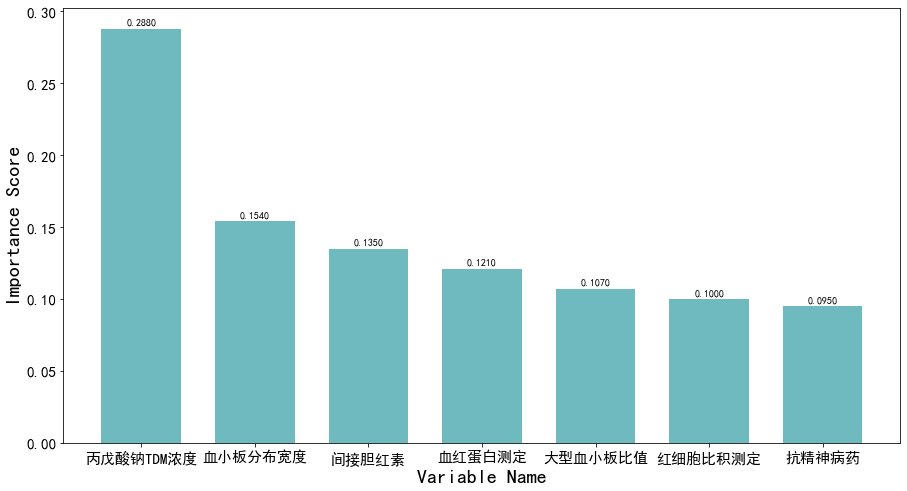

In [388]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc

names = df_importance['特征']
index = np.arange(len(names))
plt.figure(figsize=(15, 8))
plt.bar(df_importance['特征'], df_importance['重要性评分'], width=0.7,
        color=(0.42941176470588235, 0.7294117647058823, 0.7490196078431373), tick_label=names)
# 设置坐标刻度值的大小
plt.tick_params(labelsize=15)
plt.xticks(rotation=0)

plt.ylabel('Importance Score',fontsize=20)
plt.xlabel('Variable Name',fontsize=20)
for a, b in zip(index, df_importance['重要性评分']):
    plt.text(a, b + 0.002, '%.4f' % b, ha='center', va='bottom', fontsize=10)
# plt.title('重要变量得分柱形图')
# plt.show()

### 散点图

In [51]:
# 判断文件路径是否存在，如果不存在则创建该路径
def mkdir(path):
    folder = os.path.exists(path)
    if not folder:  # 判断是否存在文件夹如果不存在则创建为文件夹
        os.makedirs(path)  # makedirs 创建文件时如果路径不存在会创建这个路径

In [ ]:
# 画图
print('-----------------------画图---------------------------')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc
rc('mathtext', default='regular')

# 散点图
# axis设置坐标轴的范围
# plt.axis([-20, 20, 0, 200])
# x为x轴中坐标x的值，y为y轴中坐标y的值，x与y都是长度相同的数组序列，color为点的颜色，marker为散点的形状，
# 折线图刻度调小，要不然点都堆到一块了
ax = plt.gca()
ax.set_xlim(0,10)
ax.set_ylim(0,10)
# plt.scatter(range(len(test_y)),test_y,c='r')
plt.scatter(test_y,predictions,c='b')
# 红色参照线
plt.plot(list(range(test_y.shape[0])), list(range(test_y.shape[0])),color='r')
# plt.plot(list(range(30)), list(range(30)),color='r')
plt.xlabel('Number of Events(unit)')
plt.ylabel('MTX Bone Suppression')

In [52]:
# plt.show()
# 判断图片保存路径是否存在，否则创建
jpg_path = project_path + "/jpg"
mkdir(jpg_path)
plt.savefig(jpg_path + "/他克莫司血药浓度测试集散点图v2.0.jpg", dpi=300)
plt.clf()  # 删除前面所画的图

-----------------------画图---------------------------


<Figure size 432x288 with 0 Axes>

### AUC曲线

In [56]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc

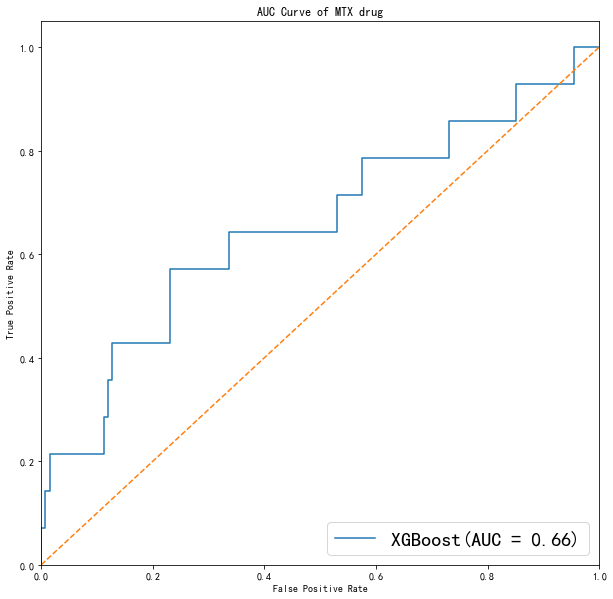

In [87]:
plt.figure(figsize=(10,10))

# plt.plot(logistic_fpr, logistic_tpr,label='LogisticRegression(AUC = %0.2f)' % logistic_auc) 
# plt.plot(rf_fpr, rf_tpr,label='RandomForest(AUC = %0.2f)' % rf_auc) 
plt.plot(xgb_fpr, xgb_tpr,label='XGBoost(AUC = %0.2f)' % xgb_auc) 
# plt.plot(ann_fpr, ann_tpr,label='ANN(AUC = %0.2f)' % ann_auc) 

plt.plot([0, 1], [0, 1],linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve of MTX drug')
plt.legend(loc="lower right", fontsize=20)
plt.show()

### precision曲线

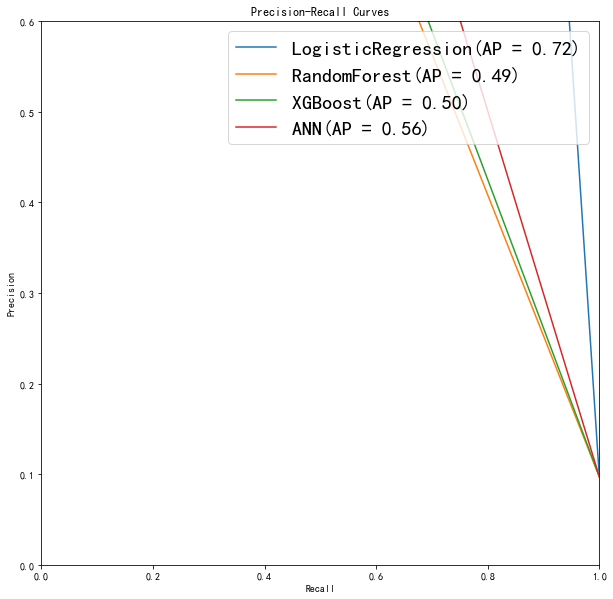

In [57]:
plt.figure(figsize=(10,10))

plt.plot(logistic_recall, logistic_precision, label='LogisticRegression(AP = %0.2f)' % logistic_ap)
plt.plot(rf_recall, rf_precision,label='RandomForest(AP = %0.2f)' % rf_ap) 
plt.plot(xgb_recall, xgb_precision,label='XGBoost(AP = %0.2f)' % xgb_ap) 
plt.plot(ann_recall, ann_precision,label='ANN(AP = %0.2f)' % ann_ap) 
         
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 0.6])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="upper right", fontsize=20)
plt.show()

### SHAP图

In [661]:
pd.value_counts(tran_y_sm)

0.0    108
1.0    108
Name: 日剂量, dtype: int64

In [662]:
# SHAP图
from pylab import mpl
from matplotlib import pyplot as plt
mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False
from matplotlib import rc
rc('mathtext', default='regular')

import catboost,xgboost
import shap
shap.initjs()  # notebook环境下，加载用于可视化的JS代码
# CatBoost模型
cat_model=catboost.CatBoostClassifier(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='CrossEntropy',
                                      random_state=3)
cat_model.fit(tran_x_sm, tran_y_sm)

explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(tran_x_sm)  # 传入特征矩阵X，计算SHAP值
# print(shap_values)

0:	learn: 0.5188538	total: 1.14ms	remaining: 341ms
1:	learn: 0.4002956	total: 2.21ms	remaining: 329ms
2:	learn: 0.3362773	total: 3.19ms	remaining: 316ms
3:	learn: 0.2942481	total: 4.27ms	remaining: 316ms
4:	learn: 0.2661136	total: 5.38ms	remaining: 318ms
5:	learn: 0.2465169	total: 7.4ms	remaining: 362ms
6:	learn: 0.2159878	total: 8.47ms	remaining: 355ms
7:	learn: 0.1935816	total: 9.42ms	remaining: 344ms
8:	learn: 0.1837763	total: 10.4ms	remaining: 337ms
9:	learn: 0.1717913	total: 11.4ms	remaining: 332ms
10:	learn: 0.1657313	total: 12.5ms	remaining: 329ms
11:	learn: 0.1560804	total: 13.5ms	remaining: 325ms
12:	learn: 0.1486010	total: 14.6ms	remaining: 322ms
13:	learn: 0.1413560	total: 15.6ms	remaining: 318ms
14:	learn: 0.1353990	total: 16.5ms	remaining: 314ms
15:	learn: 0.1323064	total: 17.6ms	remaining: 312ms
16:	learn: 0.1285595	total: 18.5ms	remaining: 308ms
17:	learn: 0.1275715	total: 19.1ms	remaining: 299ms
18:	learn: 0.1207465	total: 20.1ms	remaining: 297ms
19:	learn: 0.1161256	to

In [663]:
tran_x_sm=tran_x_sm.rename(columns={'test_result':'VPA_TDM',
                                   '大型血小板比值':'P-LCR',
                                   '血小板分布宽度':'PDW',
                                   '血红蛋白测定':'Hb',
                                   '抗精神病药':'Antipsychotic_drugs',
                                   '红细胞比积测定':'PCV',
                                   '间接胆红素':'Indirect_Bilirubin'})

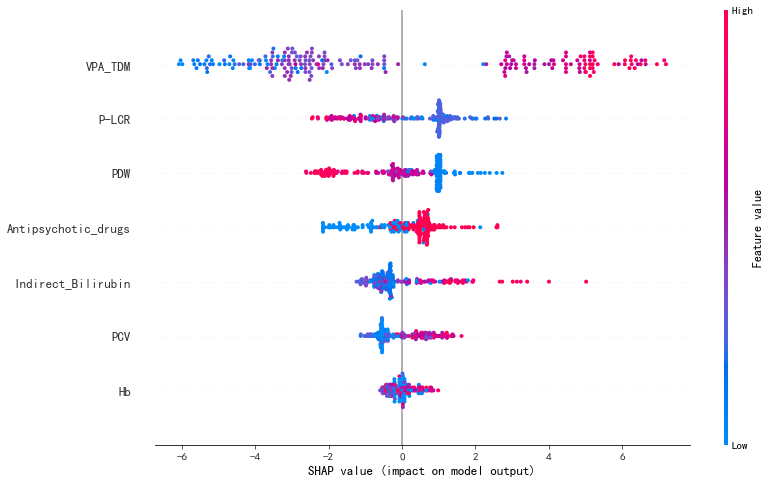

In [664]:
# summarize the effects of all the features
shap.summary_plot(shap_values, tran_x_sm,plot_size=(12,8))

In [669]:
# 保存各个变量的shape值的和
df_shap_values=pd.DataFrame(shap_values)
df_shap_values['label']=tran_y_sm
shap_col=['VPA_TDM','P-LCR','PDW','Antipsychotic_drugs','Indirect_Bilirubin','PCV','Hb']

In [666]:
df_shap_values

,0,1,2,3,4,5,6,label
0,3.333769,1.008152,0.988628,-0.071092,0.513993,-0.571060,-0.345089,1.0
1,-3.036667,0.556787,-0.042782,-0.244547,-1.502985,0.666590,-0.815771,0.0
2,-1.156161,1.305836,1.151194,0.457161,2.602305,-0.233718,-0.399447,1.0
3,-3.468739,-1.346333,-1.789265,-0.236250,-0.121771,-0.457438,-0.256855,0.0
4,6.506644,1.503949,-0.082385,0.171726,0.679662,1.065485,-0.120442,1.0
...,...,...,...,...,...,...,...,...
211,-3.600252,-1.580784,-0.314290,-0.153086,0.170325,0.124037,0.722369,0.0
212,-3.199505,0.303407,0.112323,-0.505899,-2.100364,-0.641356,-0.655191,0.0
213,-2.335317,-1.924601,-0.193261,-0.598222,0.712953,-0.463681,-0.873663,0.0
214,-3.077490,-0.876349,-0.247377,-0.402913,-1.704780,-0.386496,-0.755241,0.0


In [709]:
shap_pos_list=[]
shap_neg_list=[]

for i in range(df_shap_values.shape[1]-1):
    shap_temp=df_shap_values.iloc[:,i]
    shap_pos=shap_temp[shap_temp>0].shape[0]
    shap_neg=shap_temp[shap_temp<0].shape[0]
    shap_pos_list.append(shap_pos)
    shap_neg_list.append(shap_neg)
    print(shap_pos)
#     if i==2:
#         break

82
123
116
98
131
94
65


In [705]:
df_shap = pd.DataFrame(data={'features':shap_col,
                            'shap_pos':shap_pos_list,
                            'shap_neg':shap_neg_list})

In [706]:
df_shap

,features,shap_pos,shap_neg
0,VPA_TDM,82,134
1,P-LCR,123,93
2,PDW,116,100
3,Antipsychotic_drugs,98,118
4,Indirect_Bilirubin,131,85
5,PCV,94,122
6,Hb,65,151


In [708]:
df_shap.to_excel(project_path+'/data/result/df_shap.xlsx')

In [607]:
shap_list=[]
for i in range(df_shap_values.shape[1]-1):
    shap_value=df_shap_values.iloc[:,i].sum()
    shap_list.append(shap_value)
df_shap = pd.DataFrame(data={'features':tran_x_sm.columns,
                            'shap_value':shap_list})

In [609]:
df_shap_values.iloc[:,i]

0     -0.345089
1     -0.815771
2     -0.399447
3     -0.256855
4     -0.120442
         ...   
211    0.722369
212   -0.655191
213   -0.873663
214   -0.755241
215   -0.751668
Name: 6, Length: 216, dtype: float64

In [606]:
shap_list

[5.8572997963870295,
 -4.419375988914488,
 4.727170591923252,
 -7.676649352632006,
 10.724639449482003,
 8.021531210373883,
 8.82472834675256]

In [608]:
df_shap

,features,shap_value
0,test_result,-40.453473
1,大型血小板比值,36.070186
2,血小板分布宽度,-8.814643
3,血红蛋白测定,-0.772038
4,抗精神病药,12.686806
5,红细胞比积测定,1.033044
6,间接胆红素,0.250118


In [527]:
writer = pd.ExcelWriter(project_path + '/data/result/df_shap值排序.xlsx')
df_shap.to_excel(writer)
writer.save()

### 混淆矩阵图

In [632]:
from sklearn.metrics import classification_report,confusion_matrix
import catboost
# CatBoost模型
cat_model=catboost.CatBoostRegressor(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='MAE',
                                      random_state=3)

cat_model.fit(tran_x_sm,tran_y_sm)
cat_predictions=cat_model.predict(test_x)
# 计算混淆矩阵
cat_confusion=confusion_matrix(test_y,cat_predictions)

0:	learn: 0.4324072	total: 947us	remaining: 283ms
1:	learn: 0.3729627	total: 1.92ms	remaining: 287ms
2:	learn: 0.3241478	total: 2.57ms	remaining: 255ms
3:	learn: 0.2875848	total: 3.33ms	remaining: 247ms
4:	learn: 0.2578662	total: 4.09ms	remaining: 242ms
5:	learn: 0.2281196	total: 4.96ms	remaining: 243ms
6:	learn: 0.2063765	total: 5.83ms	remaining: 244ms
7:	learn: 0.1917576	total: 6.64ms	remaining: 242ms
8:	learn: 0.1746001	total: 7.61ms	remaining: 246ms
9:	learn: 0.1642160	total: 8.7ms	remaining: 252ms
10:	learn: 0.1525974	total: 9.57ms	remaining: 252ms
11:	learn: 0.1442084	total: 10.4ms	remaining: 249ms
12:	learn: 0.1347408	total: 11.1ms	remaining: 246ms
13:	learn: 0.1304998	total: 11.9ms	remaining: 243ms
14:	learn: 0.1261742	total: 12.8ms	remaining: 243ms
15:	learn: 0.1212362	total: 13.6ms	remaining: 241ms
16:	learn: 0.1179875	total: 14.4ms	remaining: 240ms
17:	learn: 0.1132778	total: 15.1ms	remaining: 237ms
18:	learn: 0.1110119	total: 16ms	remaining: 237ms
19:	learn: 0.1075292	total

184:	learn: 0.0381600	total: 146ms	remaining: 90.7ms
185:	learn: 0.0381566	total: 147ms	remaining: 89.9ms
186:	learn: 0.0381455	total: 147ms	remaining: 89ms
187:	learn: 0.0380301	total: 148ms	remaining: 88.2ms
188:	learn: 0.0379972	total: 149ms	remaining: 87.4ms
189:	learn: 0.0379745	total: 149ms	remaining: 86.5ms
190:	learn: 0.0378667	total: 150ms	remaining: 85.7ms
191:	learn: 0.0378525	total: 151ms	remaining: 84.8ms
192:	learn: 0.0378274	total: 151ms	remaining: 84ms
193:	learn: 0.0378100	total: 152ms	remaining: 83.1ms
194:	learn: 0.0378001	total: 153ms	remaining: 82.3ms
195:	learn: 0.0377865	total: 154ms	remaining: 81.5ms
196:	learn: 0.0377677	total: 154ms	remaining: 80.6ms
197:	learn: 0.0377510	total: 155ms	remaining: 79.9ms
198:	learn: 0.0377357	total: 156ms	remaining: 79.1ms
199:	learn: 0.0377248	total: 156ms	remaining: 78.2ms
200:	learn: 0.0367848	total: 157ms	remaining: 77.4ms
201:	learn: 0.0367664	total: 158ms	remaining: 76.6ms
202:	learn: 0.0367538	total: 159ms	remaining: 75.8

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [633]:
cat_confusion

array([[27,  0],
       [ 1,  5]], dtype=int64)

0 0
0 1
1 0
1 1


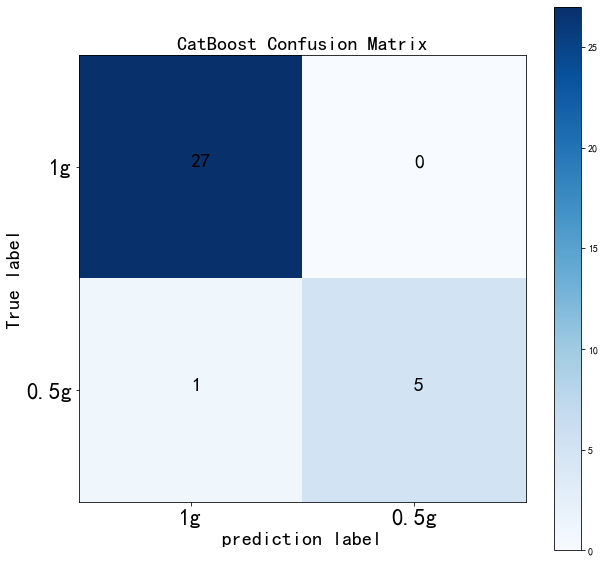

In [636]:
plt.figure(figsize=(10,10))
plt.imshow(cat_confusion, cmap=plt.cm.Blues) # 在特定的窗口上显示图像
# 设置图表标题
plt.title('CatBoost Confusion Matrix',size=20)    # 图像标题
plt.colorbar()
# 设置坐标轴标题
font_x = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 20,}
plt.xlabel('prediction label',size=20)
plt.ylabel('True label',size=20)
# 设置坐标轴刻度
plt.tick_params(labelsize=23)  # 设置刻度值大小
label_names=['1g','0.5g']
plt.xticks(range(len(label_names)),label_names)
plt.yticks(range(len(label_names)),label_names)
# 显示数据
for first_index in range(len(cat_confusion)):    #第几行
    for second_index in range(len(cat_confusion[first_index])):    #第几列
        print(first_index, second_index)
        plt.text(second_index,first_index, cat_confusion[first_index][second_index],size=20)
plt.show()

In [471]:
cat_confusion

array([[27,  0],
       [ 1,  5]], dtype=int64)

In [475]:
for first_index in range(len(cat_confusion)):    #第几行
    print(cat_confusion[first_index])
    break

[27  0]


In [476]:
for second_index in range(len(cat_confusion[first_index])):    #第几列
    print(cat_confusion[first_index][second_index])

27
0


0 0
27
0 1
0
1 0
1
1 1
5


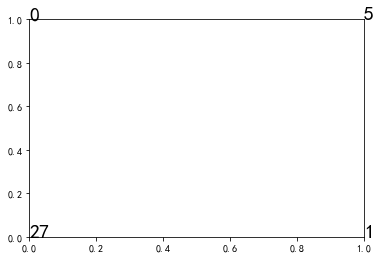

In [480]:
# 显示数据
for first_index in range(len(cat_confusion)):    #第几行
    for second_index in range(len(cat_confusion[first_index])):    #第几列
        print(first_index, second_index)
        print(cat_confusion[first_index][second_index])
        plt.text(first_index, second_index, cat_confusion[first_index][second_index],size=20)
plt.show()

### tabnet mask graph

In [299]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
TabNet_model = TabNetClassifier()  #TabNetRegressor()
tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x_sm, tran_y_sm, test_size=0.1, random_state=3)

TabNet_model.fit(X_train=tran_x_x.to_numpy(),  
        y_train=tran_y_y.to_numpy(), 
        eval_set=[(tran_x_valid.to_numpy(), tran_y_valid.to_numpy())], 
        eval_name=['train'], 
        eval_metric=['auc'],
        max_epochs=100,
        patience=15,
        batch_size=128,
        virtual_batch_size=15,
        num_workers=0,
        drop_last=False)

Device used : cpu
epoch 0  | loss: 0.75528 | train_auc: 0.63881 |  0:00:00s
epoch 1  | loss: 0.59836 | train_auc: 0.92063 |  0:00:00s
epoch 2  | loss: 0.56821 | train_auc: 0.91119 |  0:00:00s
epoch 3  | loss: 0.50365 | train_auc: 0.96853 |  0:00:01s
epoch 4  | loss: 0.45512 | train_auc: 0.94126 |  0:00:01s
epoch 5  | loss: 0.41852 | train_auc: 0.92727 |  0:00:01s
epoch 6  | loss: 0.43255 | train_auc: 0.94441 |  0:00:01s
epoch 7  | loss: 0.40222 | train_auc: 0.94545 |  0:00:02s
epoch 8  | loss: 0.36702 | train_auc: 0.91993 |  0:00:02s
epoch 9  | loss: 0.35444 | train_auc: 0.96294 |  0:00:02s
epoch 10 | loss: 0.36125 | train_auc: 0.97343 |  0:00:02s
epoch 11 | loss: 0.3187  | train_auc: 0.97203 |  0:00:02s
epoch 12 | loss: 0.28125 | train_auc: 0.97098 |  0:00:03s
epoch 13 | loss: 0.2984  | train_auc: 0.98427 |  0:00:03s
epoch 14 | loss: 0.27376 | train_auc: 0.98147 |  0:00:03s
epoch 15 | loss: 0.23633 | train_auc: 0.97028 |  0:00:03s
epoch 16 | loss: 0.24844 | train_auc: 0.97063 |  0:00:

In [211]:
explain_matrix,masks=TabNet_model.explain(tran_x_sm.to_numpy())

AttributeError: 'CatBoostClassifier' object has no attribute 'explain'

NameError: name 'explain_matrix' is not defined

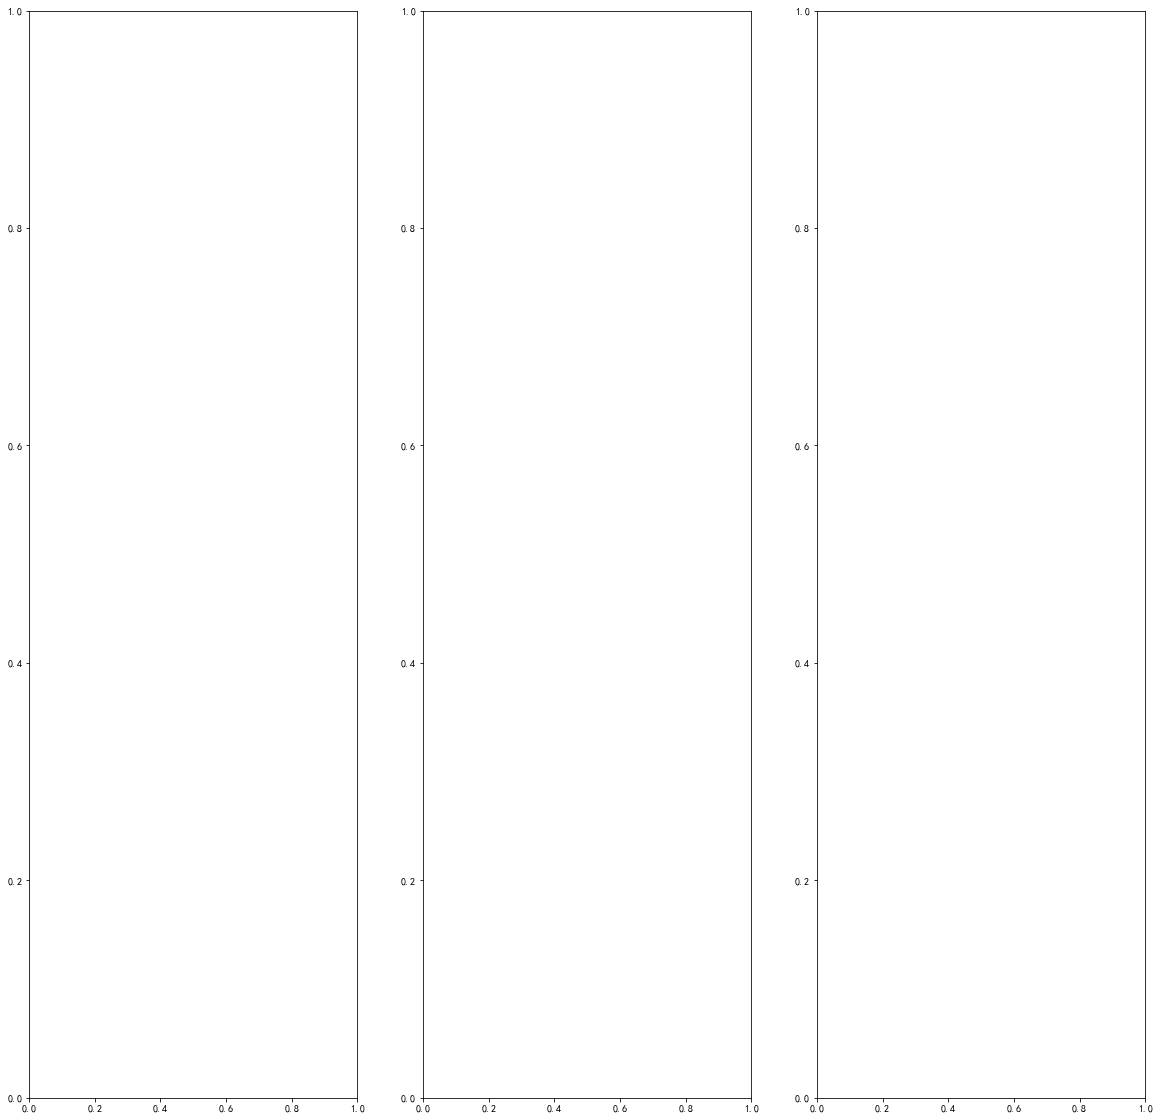

In [212]:
from matplotlib import pyplot as plt
# fig = plt.figure(figsize=(40,40))
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plt.yticks(np.arange(0, len(explain_matrix), 1.0))
# plt.xticks(np.arange(0, len(explain_matrix[0]), 1.0))
# ax.set_xticklabels(tran_x_sm.columns, rotation=75)
# plt.ylabel('Sample Number')
# plt.xlabel('Variable')
# # plt.imshow(explain_matrix[:30])  # 显示30个

fig, axs = plt.subplots(1, 3, figsize=(20,20))
for i in range(3):
    axs[i].set_yticks(np.arange(0, len(explain_matrix), 1.0))  # 设置左边间距
    axs[i].set_xticks(np.arange(0, len(explain_matrix[0]), 2.0))
    axs[i].set_ylabel('Sample Number',size=20)
    axs[i].set_xlabel('Variable',size=20)
    # 设置坐标刻度值的大小
    axs[i].tick_params(labelsize=15)
    axs[i].imshow(masks[i][:30])
    axs[i].set_title(f"mask {i}")
    axs[i].set_xticklabels(tran_x_sm.columns[::2], rotation=90)

In [351]:
tran_x_sm.columns

Index(['单核细胞绝对值', '异甘草酸镁', '谷草转氨酶(干式)', '甘草酸苷', '单核细胞百分比', '淋巴细胞百分比',
       '乳酸脱氢酶(干式)', '托烷司琼', '中性细胞绝对值', '嗜酸性细胞绝对值', '谷胱甘肽', '红细胞', '嗜酸性细胞百分比',
       '多烯磷脂酰', '嗜碱性细胞百分比', 'age', 'gender', 'RBC平均容量', 'MTX_tdm_72h',
       '白蛋白(干式)', '中性细胞百分比', 'MTX_tdm_48h', '总蛋白(干式)', '淋巴细胞绝对值', '吸烟史',
       '肌酐(干式)', 'MTX_tdm_24h', '日剂量', '长春新碱', 'RBC血红浓度'],
      dtype='object')